# Report: Physical Activity Monitoring

In this report, I will present in detail how I deduce and analyze the problem based on the data provided. I will apply mathematical models to make convincing hypotheses. In addition, I will apply knowledge of economic and market policies so that my report can become realistic and highly positive when evaluated.

I will try to compare the new Colibri Wireless, an inertial measurement unit (IMU) with its competitors Wireless InertiaCube3 from InterSense, MTw Awinda from Xsens, T40s from Vicon and OptoTrak 3020 from Optotrak Certus through my report.

# Cleaning and Wrangling the data

The first step I will check for command updates before doing my assignment is to make sure that the versions I am using are the latest versions.

In [1]:
import pandas as pd 
import numpy as np
import scipy 
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns 
import statsmodels
import sklearn

print(f"pandas version = {pd.__version__}")
print(f"numpy version = {np.__version__}")
print(f"scipy version = {scipy.__version__}")
print(f"matplotlib version = {matplotlib.__version__}")
print(f"seaborn version = {sns.__version__}")
print(f"statsmodels version = {statsmodels.__version__}")
print(f"sklearn version = {sklearn.__version__}")
print("\n")

alpha = 0.01
print(f"My significance level for all my hypothesis tests is {100.0*alpha}%")

pandas version = 2.0.3
numpy version = 1.24.3
scipy version = 1.11.1
matplotlib version = 3.7.2
seaborn version = 0.12.2
statsmodels version = 0.14.0
sklearn version = 1.3.0


My significance level for all my hypothesis tests is 1.0%


I started by exporting the summary statistics dataset however the columns were stuck together so I used the delim_whitespace function to separate the columns.

In [2]:
import pandas as pd

protocol_file_paths = [
    '../Protocol/subject101.dat','../Protocol/subject103.dat','../Protocol/subject104.dat','../Protocol/subject105.dat','../Protocol/subject106.dat','../Protocol/subject107.dat', '../Protocol/subject102.dat', '../Protocol/subject108.dat','../Protocol/subject109.dat'
]

data_frames = [pd.read_csv(file, delim_whitespace=True, header=None) for file in protocol_file_paths]
combined_data = pd.concat(data_frames, ignore_index=True)
pd.set_option("display.max_columns", None)

combined_data

0   1      2        3        4         5        6        7   \
0          8.38   0  104.0  30.0000  2.37223   8.60074  3.51048  2.43954   
1          8.39   0    NaN  30.0000  2.18837   8.56560  3.66179  2.39494   
2          8.40   0    NaN  30.0000  2.37357   8.60107  3.54898  2.30514   
3          8.41   0    NaN  30.0000  2.07473   8.52853  3.66021  2.33528   
4          8.42   0    NaN  30.0000  2.22936   8.83122  3.70000  2.23055   
...         ...  ..    ...      ...      ...       ...      ...      ...   
2872528  100.19   0    NaN  25.1875 -4.71493  10.22250  4.66893 -5.04654   
2872529  100.20   0    NaN  25.1875 -4.95932  10.37130  4.12594 -4.96890   
2872530  100.21   0    NaN  25.1875 -4.93997   9.83615  3.70468 -5.04613   
2872531  100.22   0    NaN  25.1875 -4.64941   9.11129  3.51904 -5.06854   
2872532  100.23   0  161.0  25.1875 -4.09726   8.15642  3.29961 -4.73244   

               8        9         10        11        12       13       14  \
0         8.76165  3.35465 -0.092217  0.056812 -0.015845  14.6806 -69.2128   
1         8.55081  3.64207 -0.024413  0.047759  0.006474  14.8991 -69.2224   
2         8.53644  3.73280 -0.057976  0.032574 -0.006988  14.2420 -69.5197   
3         8.53622  3.73277 -0.002352  0.032810 -0.003747  14.8908 -69.5439   
4         8.59741  3.76295  0.012269  0.018305 -0.053325  15.5612 -68.8196   
...           ...      ...       ...       ...       ...      ...      ...   
2872528   9.94944  4.50736  1.784060  0.087985  0.934673  21.1701 -35.3878   
2872529  10.29620  4.43102  1.475210 -0.028917  0.806540  20.7931 -34.9954   
2872530  10.35690  4.14405  1.290990 -0.155493  0.762446  20.6763 -36.6013   
2872531   9.75268  3.87359  1.207940 -0.311214  0.748814  20.5408 -35.8494   
2872532   8.82870  3.54305  1.404170 -0.396125  0.728581  20.3057 -37.3255   

               15        16        17        18        19       20        21  \
0        -5.58905  1.000000  0.000000  0.000000  0.000000  31.8125  0.238080   
1        -5.82311  1.000000  0.000000  0.000000  0.000000  31.8125  0.319530   
2        -5.12442  1.000000  0.000000  0.000000  0.000000  31.8125  0.235593   
3        -6.17367  1.000000  0.000000  0.000000  0.000000  31.8125  0.388697   
4        -6.28927  1.000000  0.000000  0.000000  0.000000  31.8125  0.315800   
...           ...       ...       ...       ...       ...      ...       ...   
2872528 -34.04430  0.558630 -0.593878  0.292228  0.499844  32.3750  2.926640   
2872529 -34.17720  0.555545 -0.596490  0.299264  0.495995  32.3750  2.722810   
2872530 -32.46120  0.553254 -0.598417  0.305463  0.492442  32.3750  2.657220   
2872531 -32.33420  0.551068 -0.599876  0.311399  0.489390  32.3750  2.612890   
2872532 -31.53740  0.548065 -0.601715  0.317869  0.486336  32.3750  2.771960   

               22        23        24        25        26        27        28  \
0         9.80003 -1.688960  0.265304   9.81549 -1.413440 -0.005065 -0.006781   
1         9.61282 -1.493280  0.234939   9.78539 -1.428460  0.013685  0.001486   
2         9.72421 -1.766210  0.173850   9.72528 -1.518940 -0.039923  0.034056   
3         9.53572 -1.724100  0.157969   9.64994 -1.579520  0.007513 -0.010498   
4         9.49908 -1.609140  0.233506   9.57411 -1.444180 -0.003822 -0.011217   
...           ...       ...       ...       ...       ...       ...       ...   
2872528  10.21030 -0.983335  3.125630  10.62120  0.642058 -0.034671 -0.222172   
2872529   9.37125 -2.649300  2.839650   9.86963 -1.111460 -0.068016 -0.217669   
2872530   9.07285 -2.262310  2.648130   9.29824 -2.351200 -0.077873 -0.152311   
2872531   8.88341 -2.456100  2.557410   9.02648 -2.139860  0.138759  0.027529   
2872532   9.22311 -2.260720  2.526470   8.90583 -2.155140  0.250226  0.035799   

               29         30       31       32        33        34        35  \
0       -0.005663   0.471960 -51.0499  43.2903  1.000000  0.000000  0.000000   
1       -0.041522   1.016900 -50.3966  43.1768  1.000000  0.000000  0

In [3]:
combined_data = combined_data.dropna()
combined_data.reset_index(drop=True, inplace=True)
combined_data

0   1      2        3        4         5        6        7   \
0         8.38   0  104.0  30.0000  2.37223   8.60074  3.51048  2.43954   
1         8.48   0  104.0  30.0000  2.29745   8.90450  3.46984  2.39736   
2         8.59   0  104.0  30.0000  2.40867   9.16819  3.35516  2.48704   
3         8.70   0  104.0  30.0000  2.18114   8.86676  3.39125  2.34987   
4         8.81   0  104.0  30.0000  2.40681   8.71326  3.39515  2.39710   
...        ...  ..    ...      ...      ...       ...      ...      ...   
259798   99.80   0  161.0  25.1875 -2.36226  10.75660  7.05010 -2.42638   
259799   99.91   0  161.0  25.1875 -5.04845  11.03180  5.77734 -4.97782   
259800  100.02   0  161.0  25.1875 -6.37083  11.64810  5.63999 -6.56804   
259801  100.13   0  161.0  25.1875 -4.98611   8.70795  4.78544 -5.18338   
259802  100.23   0  161.0  25.1875 -4.09726   8.15642  3.29961 -4.73244   

              8        9         10        11        12        13       14  \
0        8.76165  3.35465 -0.092217  0.056812 -0.015845  14.68060 -69.2128   
1        8.94335  3.53551 -0.015370 -0.065894 -0.026322  15.13100 -68.8051   
2        9.03315  3.35401  0.032015  0.017456 -0.006301  15.68850 -68.4006   
3        8.74730  3.46048  0.073080  0.038494  0.002435  14.45490 -68.7615   
4        8.86788  3.58097 -0.080054  0.025991 -0.019187  14.68560 -69.1072   
...          ...      ...       ...       ...       ...       ...      ...   
259798  11.11050  6.67665  0.771096  2.821600 -0.500235   6.41472 -18.8506   
259799  11.36990  5.89345  0.455965  2.275130  0.045379  16.88010 -23.2536   
259800  12.48360  5.65103  0.387395  1.711320  0.952960  24.08880 -26.2412   
259801   9.13554  5.18882  0.901751  0.545959  1.242090  22.75650 -31.6272   
259802   8.82870  3.54305  1.404170 -0.396125  0.728581  20.30570 -37.3255   

              15        16        17        18        19       20        21  \
0       -5.58905  1.000000  0.000000  0.000000  0.000000  31.8125  0.238080   
1       -5.47408  1.000000  0.000000  0.000000  0.000000  31.8125  0.237283   
2       -5.59184  1.000000  0.000000  0.000000  0.000000  31.8125  0.204242   
3       -5.81306  1.000000  0.000000  0.000000  0.000000  31.8125  0.278383   
4       -5.35651  1.000000  0.000000  0.000000  0.000000  31.8125  0.239870   
...          ...       ...       ...       ...       ...      ...       ...   
259798 -49.99380  0.540073 -0.337648  0.232294  0.735088  32.3750  1.450120   
259799 -46.05130  0.538367 -0.460817  0.202964  0.675732  32.3750  3.270390   
259800 -41.32350  0.547718 -0.543507  0.202147  0.603111  32.3750  2.411800   
259801 -36.69500  0.569560 -0.573996  0.246493  0.534202  32.3750  3.370840   
259802 -31.53740  0.548065 -0.601715  0.317869  0.486336  32.3750  2.771960   

             22        23        24        25       26        27        28  \
0       9.80003 -1.688960  0.265304   9.81549 -1.41344 -0.005065 -0.006781   
1       9.49881 -1.688000  0.218302   9.61953 -1.51952 -0.004998  0.010533   
2       9.68823 -1.534330  0.174474   9.71002 -1.39809  0.020125 -0.009126   
3       9.76278 -1.610670  0.219400   9.66462 -1.38338  0.012105  0.020507   
4       9.61228 -1.610880  0.174372   9.67981 -1.38306 -0.012182 -0.021782   
...         ...       ...       ...       ...      ...       ...       ...   
259798  9.65272 -0.621063  0.991588   9.04547 -2.40238  0.320980  0.032811   
259799  9.89958 -2.215170  3.060840  10.05150 -2.04925  0.282894  0.141435   
259800  9.37958 -1.570780  2.249260   9.41838 -1.26033  0.067829  0.075997   
259801  9.11458 -1.320210  3.103850   9.00899 -1.29690 -0.165396 -0.371275   
259802  9.22311 -2.260720  2.526470   8.90583 -2.15514  0.250226  0.035799   

              29         30       31       32        33        34        35  \
0      -0.005663   0.471960 -51.0499  43.2903  1.000000  0.000000  0.000000   
1      -0.009726   0.216756 -50.1418  42.6747  1.000000  0.000000  0.000000   
2      -0.008258   0.280342 -51.9318  42.6733  1.00

After removing NANs, the number of rows decreased from 2,872,533 rows to 259,803 rows.

In [5]:
Exchange_rate = pd.read_csv('Exchange rate - FAOSTAT_data_en_2-22-2024.csv')
Exchange_rate = Exchange_rate.dropna()
Exchange_rate = Exchange_rate.drop_duplicates()
Exchange_rate.reset_index(drop=True, inplace=True)
Exchange_rate

FileNotFoundError: [Errno 2] No such file or directory: 'Exchange rate - FAOSTAT_data_en_2-22-2024.csv'

After removing duplicates, I can see that nothing has changed in the data, proving that there are no duplicate columns.

In [5]:
print("Original data shape:", combined_data.shape)
combined_data = combined_data.dropna()
print("Data shape after dropping missing values:", combined_data.shape)
combined_data = combined_data.drop_duplicates()
print("Final data shape after dropping duplicates:", combined_data.shape)

Original data shape: (259803, 54)
Data shape after dropping missing values: (259803, 54)
Final data shape after dropping duplicates: (259803, 54)


- "Original data shape" is the original size of the data before processing.
- "Data shape after dropping missing values" is the size of the data after removing rows containing missing values.
- "Final data shape after dropping duplicates" is the final size of the data after removing duplicate lines.

In [6]:
print("\nData Types After Processing:")
print(combined_data.dtypes)


Data Types After Processing:
0     float64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
dtype: object


In this line of code I checked to see if the data was converted and processed properly and I realized that the activityID column is currently in a different format than the other columns so I will use the combined_data.astype(float) function to convert the columns in the data file to the same float format.

In [7]:
combined_data = combined_data.astype(float)

I continued to name the column titles based on the information the teacher provided

In [8]:
combined_data = combined_data.rename(columns={
    0: 'timestamp (s)',
    1: 'activityID',
    2: 'heart rate (bpm)',
    3: 'temperature_hand (°C)',
    4: 'IMU hand_3D_acceleration data (x) (scale: ±16g)',
    5: 'IMU hand_3D_acceleration data (y) (scale: ±16g)',
    6: 'IMU hand_3D_acceleration data (z) (scale: ±16g)',
    7: 'IMU hand_3D_acceleration data (x) (scale: ±6g)',
    8: 'IMU hand_3D_acceleration data (y) (scale: ±6g)',
    9: 'IMU hand_3D_acceleration data (z) (scale: ±6g)',
    10: 'IMU hand_3D_gyroscope data (x)',
    11: 'IMU hand_3D_gyroscope data (y)',
    12: 'IMU hand_3D_gyroscope data (z)',
    13: 'IMU hand_3D_magnetometer data (x)',
    14: 'IMU hand_3D_magnetometer data (y)',
    15: 'IMU hand_3D_magnetometer data (z)',
    16: 'orientation',
    17: 'orientation',
    18: 'orientation',
    19: 'orientation',
    20: 'temperature_chest (°C)',
    21: 'IMU chest_3D_acceleration data (x) (scale: ±16g)',
    22: 'IMU chest_3D_acceleration data (y) (scale: ±16g)',
    23: 'IMU chest_3D_acceleration data (z) (scale: ±16g)',
    24: 'IMU chest_3D_acceleration data (x) (scale: ±6g)',
    25: 'IMU chest_3D_acceleration data (y) (scale: ±6g)',
    26: 'IMU chest_3D_acceleration data (z) (scale: ±6g)',
    27: 'IMU chest_3D_gyroscope data (x)',
    28: 'IMU chest_3D_gyroscope data (y)',
    29: 'IMU chest_3D_gyroscope data (z)',
    30: 'IMU chest_3D_magnetometer data (x)',
    31: 'IMU chest_3D_magnetometer data (y)',
    32: 'IMU chest_3D_magnetometer data (z)',
    33: 'orientation',
    34: 'orientation',
    35: 'orientation',
    36: 'orientation',
    37: 'temperature_ankle (°C)',
    38: 'IMU ankle_3D_acceleration data (x) (scale: ±16g)',
    39: 'IMU ankle_3D_acceleration data (y) (scale: ±16g)',
    40: 'IMU ankle_3D_acceleration data (z) (scale: ±16g)',
    41: 'IMU ankle_3D_acceleration data (x) (scale: ±6g)',
    42: 'IMU ankle_3D_acceleration data (y) (scale: ±6g)',
    43: 'IMU ankle_3D_acceleration data (z) (scale: ±6g)',
    44: 'IMU ankle_3D_gyroscope data (x)',
    45: 'IMU ankle_3D_gyroscope data (y)',
    46: 'IMU ankle_3D_gyroscope data (z)',
    47: 'IMU ankle_3D_magnetometer data (x)',
    48: 'IMU ankle_3D_magnetometer data (y)',
    49: 'IMU ankle_3D_magnetometer data (z)',
    50: 'orientation',
    51: 'orientation',
    52: 'orientation',
    53: 'orientation',
})
combined_data

timestamp (s)  activityID  heart rate (bpm)  temperature_hand (°C)  \
0                8.38         0.0             104.0                30.0000   
1                8.48         0.0             104.0                30.0000   
2                8.59         0.0             104.0                30.0000   
3                8.70         0.0             104.0                30.0000   
4                8.81         0.0             104.0                30.0000   
...               ...         ...               ...                    ...   
259798          99.80         0.0             161.0                25.1875   
259799          99.91         0.0             161.0                25.1875   
259800         100.02         0.0             161.0                25.1875   
259801         100.13         0.0             161.0                25.1875   
259802         100.23         0.0             161.0                25.1875   

        IMU hand_3D_acceleration data (x) (scale: ±16g)  \
0                                               2.37223   
1                                               2.29745   
2                                               2.40867   
3                                               2.18114   
4                                               2.40681   
...                                                 ...   
259798                                         -2.36226   
259799                                         -5.04845   
259800                                         -6.37083   
259801                                         -4.98611   
259802                                         -4.09726   

        IMU hand_3D_acceleration data (y) (scale: ±16g)  \
0                                               8.60074   
1                                               8.90450   
2                                               9.16819   
3                                               8.86676   
4                                               8.71326   
...                                                 ...   
259798                                         10.75660   
259799                                         11.03180   
259800                                         11.64810   
259801                                          8.70795   
259802                                          8.15642   

        IMU hand_3D_acceleration data (z) (scale: ±16g)  \
0                                               3.51048   
1                                               3.46984   
2                                               3.35516   
3                                               3.39125   
4                                               3.39515   
...                                                 ...   
259798                                          7.05010   
259799                                          5.77734   
259800                                          5.63999   
259801                                          4.78544   
259802                                          3.29961   

        IMU hand_3D_acceleration data (x) (scale: ±6g)  \
0                                              2.43954   
1                                              2.39736   
2                                              2.48704   
3                                              2.34987   
4                                              2.39710   
...                                                ...   
259798                                        -2.42638   
259799                                        -4.97782   
259800                                        -6.56804   
259801                                        -5.18338   
259802                                        -4.73244   

        IMU hand_3D_acceleration data (y) (scale: ±6g)  \
0                                              8.76165   
1                                              8.94335   
2                                              9.03315   
3              

Then I started going through the steps of renaming and removing unnecessary columns because this accelerometer is not precisely calibrated with the first one. Moreover, due to high impacts caused by certain movements (e.g. during running) with acceleration over 6g, it gets saturated sometimes. Therefore, the use of the data from the first accelerometer (with the scale of ±16g) is recommended.

In [9]:
columns_to_remove = [
    'orientation',
    'IMU hand_3D_acceleration data (x) (scale: ±6g)',
    'IMU hand_3D_acceleration data (y) (scale: ±6g)',
    'IMU hand_3D_acceleration data (z) (scale: ±6g)',
    'IMU chest_3D_acceleration data (x) (scale: ±6g)',
    'IMU chest_3D_acceleration data (y) (scale: ±6g)',
    'IMU chest_3D_acceleration data (z) (scale: ±6g)',
    'IMU ankle_3D_acceleration data (x) (scale: ±6g)',
    'IMU ankle_3D_acceleration data (y) (scale: ±6g)',
    'IMU ankle_3D_acceleration data (z) (scale: ±6g)',
]

combined_data = combined_data.drop(columns=columns_to_remove)
combined_data = combined_data[combined_data['activityID'] != 0]

In [10]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175498 entries, 267 to 259755
Data columns (total 33 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   timestamp (s)                                     175498 non-null  float64
 1   activityID                                        175498 non-null  float64
 2   heart rate (bpm)                                  175498 non-null  float64
 3   temperature_hand (°C)                             175498 non-null  float64
 4   IMU hand_3D_acceleration data (x) (scale: ±16g)   175498 non-null  float64
 5   IMU hand_3D_acceleration data (y) (scale: ±16g)   175498 non-null  float64
 6   IMU hand_3D_acceleration data (z) (scale: ±16g)   175498 non-null  float64
 7   IMU hand_3D_gyroscope data (x)                    175498 non-null  float64
 8   IMU hand_3D_gyroscope data (y)                    175498 non-null  float64
 9   IMU han

The Pandas info() method is then used to print a brief summary of the DataFrame, including information about data types, non-null values, and memory usage. Chart showing Number of non-null values: Each column displays the number of non-null (non-missing) values. This indicates the number of observations that have actual data.

# Exploratory Data Analysis

In [11]:
combined_data.describe()

timestamp (s)     activityID  heart rate (bpm)  temperature_hand (°C)  \
count  175498.000000  175498.000000     175498.000000          175498.000000   
mean     1694.983481       8.093198        107.314043              32.761121   
std      1091.288920       6.177135         26.952555               1.790775   
min        31.220000       1.000000         57.000000              24.875000   
25%       739.225000       3.000000         86.000000              31.687500   
50%      1467.170000       6.000000        104.000000              33.187500   
75%      2654.185000      13.000000        124.000000              34.062500   
max      4245.650000      24.000000        202.000000              35.500000   

       IMU hand_3D_acceleration data (x) (scale: ±16g)  \
count                                    175498.000000   
mean                                         -4.944893   
std                                           6.253443   
min                                         -94.135900   
25%                                          -8.952885   
50%                                          -5.421325   
75%                                          -0.938708   
max                                          60.912600   

       IMU hand_3D_acceleration data (y) (scale: ±16g)  \
count                                    175498.000000   
mean                                          3.567724   
std                                           6.944834   
min                                         -82.550900   
25%                                           1.044670   
50%                                           3.521345   
75%                                           6.463538   
max                                         155.354000   

       IMU hand_3D_acceleration data (z) (scale: ±16g)  \
count                                    175498.000000   
mean                                          3.611669   
std                                           3.953579   
min                                         -69.093500   
25%                                           1.165758   
50%                                           3.435940   
75%                                           6.550817   
max                                          65.302700   

       IMU hand_3D_gyroscope data (x)  IMU hand_3D_gyroscope data (y)  \
count                   175498.000000                   175498.000000   
mean                         0.002260                        0.041288   
std                          1.326568                        0.950139   
min                        -28.135400                       -9.354930   
25%                         -0.376981                       -0.219975   
50%                         -0.006174                        0.006064   
75%                          0.334159                        0.266312   
max                         17.994100                       23.077900   

       IMU hand_3D_gyroscope data (z)  IMU hand_3D_magnetometer data (x)  \
count                   175498.000000                      175498.000000   
mean                        -0.003601                          21.026355   
std                          1.597604                          23.814774   
min                        -13.121500                        -102.914000   
25%                         -0.376287                           4.746878   
50%                         -0.005747                          22.827900   
75%                          0.364776                          39.235275   
max                         13.672200                         137.537000   

       IMU hand_3D_magnetometer data (y)  IMU hand_3D_magnetometer data (z)  \
count                      175498.000000                      175498.000000   
mean                          -13.981177                         -24.443168   
std                            24.214329                          20.113246   
min                          -197.803000                  

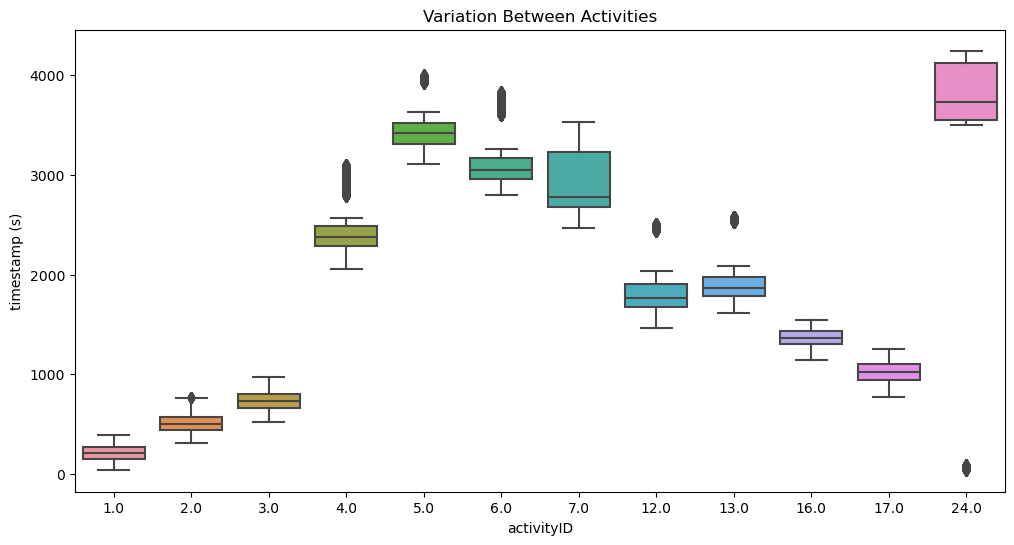

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='activityID', y='timestamp (s)', data=combined_data)
plt.title('Variation Between Activities')
plt.show()

The chart shows us the timestamp fluctuations with different activities

In [13]:
activity_std_dev_all_columns = combined_data.groupby('activityID').std()
activity_std_dev_all_columns

timestamp (s)  heart rate (bpm)  temperature_hand (°C)  \
activityID                                                           
1.0             76.591632         10.539080               1.405641   
2.0             93.077219          8.012904               1.103310   
3.0             94.989379         10.012539               0.857203   
4.0            232.526042          9.586708               1.381880   
5.0            207.861134         22.802862               2.100348   
6.0            269.372661          8.613155               1.997825   
7.0            299.444346         11.032553               1.756729   
12.0           237.391446         20.884935               0.876158   
13.0           211.810569         22.954539               0.885715   
16.0            90.669619         13.501892               0.652197   
17.0           104.532646          8.934318               0.773600   
24.0          1307.333295         21.720282               2.508534   

            IMU hand_3D_acceleration data (x) (scale: ±16g)  \
activityID                                                    
1.0                                                4.063472   
2.0                                                2.884227   
3.0                                                3.873104   
4.0                                                3.376594   
5.0                                               13.077820   
6.0                                                4.307872   
7.0                                                4.887586   
12.0                                               4.453900   
13.0                                               5.562820   
16.0                                               4.199008   
17.0                                               3.259784   
24.0                                               7.701460   

            IMU hand_3D_acceleration data (y) (scale: ±16g)  \
activityID                                                    
1.0                                                3.342719   
2.0                                                5.594345   
3.0                                                3.000306   
4.0                                                2.851958   
5.0                                               20.754347   
6.0                                                3.865225   
7.0                                                9.799350   
12.0                                               3.122691   
13.0                                               3.720409   
16.0                                               4.969621   
17.0                                               5.019315   
24.0                                               9.968747   

            IMU hand_3D_acceleration data (z) (scale: ±16g)  \
activityID                                                    
1.0                                                2.994618   
2.0                                                2.991927   
3.0                                                2.133905   
4.0                                                2.215597   
5.0                                                5.802361   
6.0                                                2.781850   
7.0                                                2.969403   
12.0                                               2.475675   
13.0                                               3.983041   
16.0                                               3.771138   
17.0                                               3.395448   
24.0                                               6.983829   

            IMU hand_3D_gyroscope data (x)  IMU hand_3D_gyroscope data (y)  \
activityID                                                                   
1.0                               0.360715                        0.243940   
2.0                               0.455909                        0.275932   
3.0                               0.591227                        0.33

Based on the standard deviation of the values in the data set around the mean. The larger the standard deviation, the more scattered the data and vice versa.

In [14]:
mean_values = combined_data.mean()
std_dev_values = combined_data.std()

print("Mean value:")
mean_values
print("\nStandard deviation:")
std_dev_values

Mean value:

Standard deviation:


timestamp (s)                                       1091.288920
activityID                                             6.177135
heart rate (bpm)                                      26.952555
temperature_hand (°C)                                  1.790775
IMU hand_3D_acceleration data (x) (scale: ±16g)        6.253443
IMU hand_3D_acceleration data (y) (scale: ±16g)        6.944834
IMU hand_3D_acceleration data (z) (scale: ±16g)        3.953579
IMU hand_3D_gyroscope data (x)                         1.326568
IMU hand_3D_gyroscope data (y)                         0.950139
IMU hand_3D_gyroscope data (z)                         1.597604
IMU hand_3D_magnetometer data (x)                     23.814774
IMU hand_3D_magnetometer data (y)                     24.214329
IMU hand_3D_magnetometer data (z)                     20.113246
temperature_chest (°C)                                 1.492995
IMU chest_3D_acceleration data (x) (scale: ±16g)       1.753649
IMU chest_3D_acceleration data (y) (scal

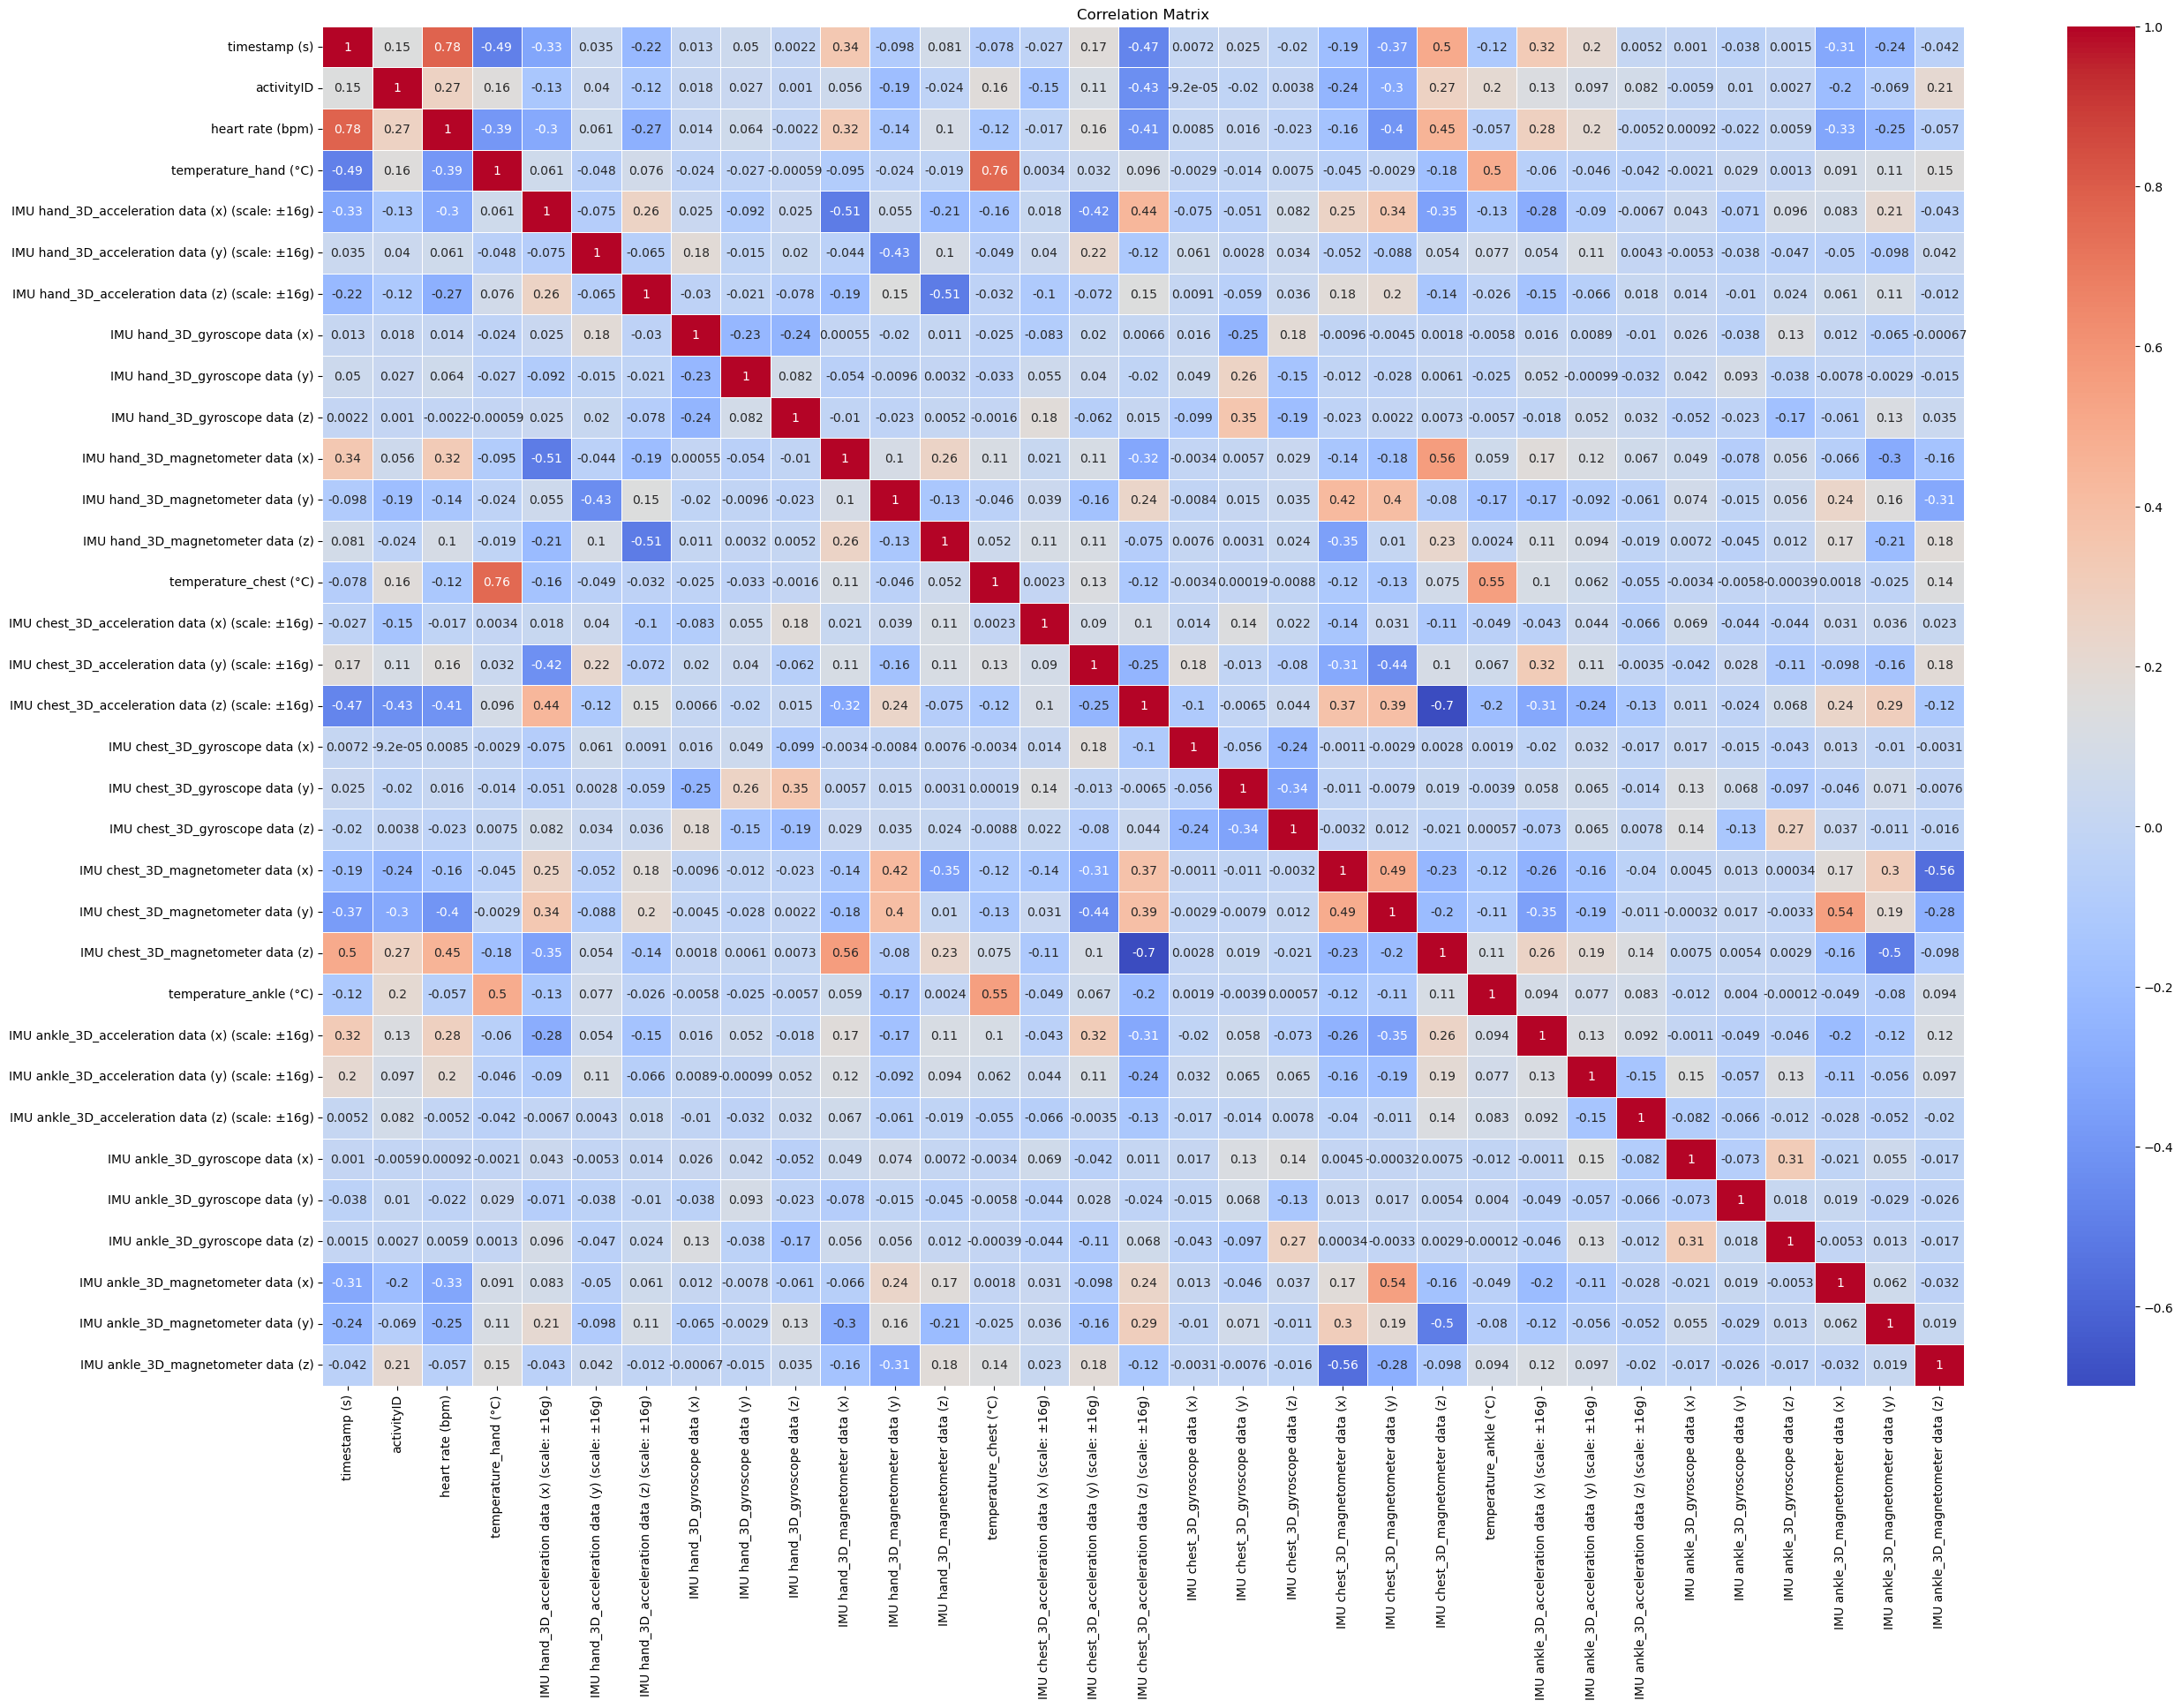

In [15]:
correlation_matrix = combined_data.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Based on the graph we can see that a significant increase or decrease in "activityID" is often accompanied by a relative increase or decrease in "heart rate (bpm)", and vice versa. However, this value is not robust and there can be large fluctuations between data points.

/var/folders/rj/dprgg6_x05x0kq9l1dh23lw80000gn/T/ipykernel_83462/709185645.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='timestamp (s)', y='activityID', data=combined_data, ci=None, markers='o', hue='activityID', palette='viridis')


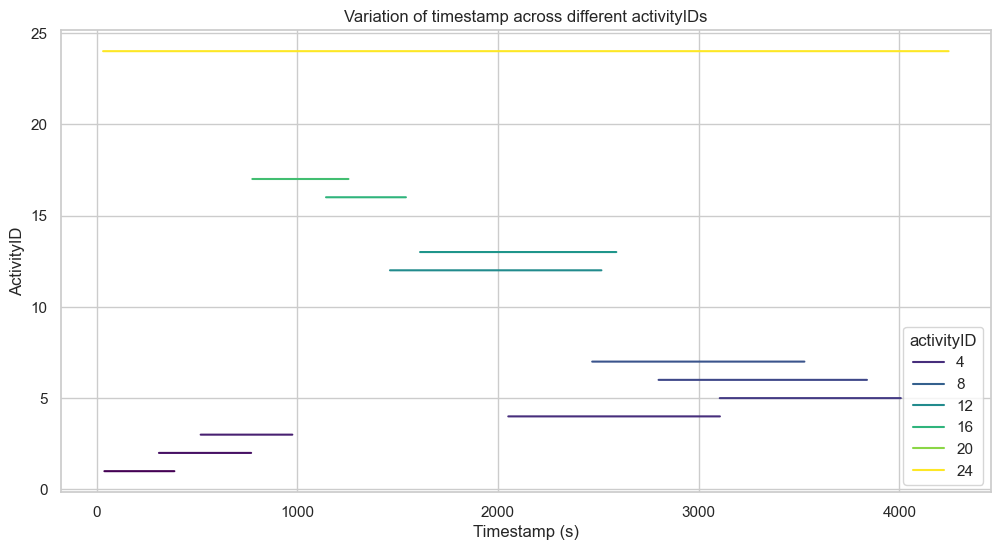

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp (s)', y='activityID', data=combined_data, ci=None, markers='o', hue='activityID', palette='viridis')
plt.title('Variation of timestamp across different activityIDs')
plt.xlabel('Timestamp (s)')
plt.ylabel('ActivityID')
plt.show()

This graph can help us observe the fluctuation of 'timestamp(s)' column according to 'activityID', and the difference between different activities is represented by the color of the line.

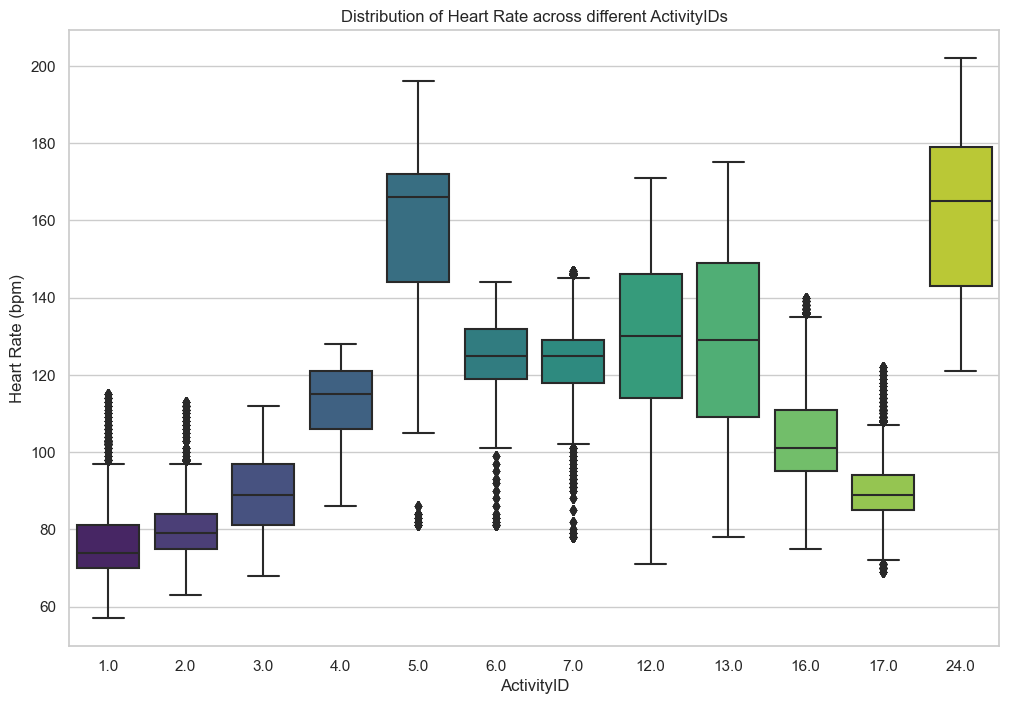

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='activityID', y='heart rate (bpm)', data=combined_data, palette='viridis')
plt.title('Distribution of Heart Rate across different ActivityIDs')
plt.xlabel('ActivityID')
plt.ylabel('Heart Rate (bpm)')
plt.show()

- The graph shows the difference in heart rate distribution between different activities.

- Some activities typically have higher heart rates (e.g. activityID 17.0) while others have lower heart rates (e.g. activityID 1.0).

- Heart rate variability also varied between activities, as indicated by different box sizes and whisker lengths.

- Outliers can highlight potentially interesting cases for further exploration.

In [18]:
conditions = [
    (combined_data['activityID'].isin([1, 2, 3, 4, 6])),
    (combined_data['activityID'].isin([8, 10, 12, 13, 15, 17, 19, 21, 23,24])),
    (combined_data['activityID'].isin([5, 7, 9, 11, 14, 16, 18, 20, 22]))
]

choices = ['Sedentary Activities', 'Physical Activities', 'Break Activities']

combined_data['ActivityGroup'] = np.select(conditions, choices, default='Other')

This code creates a new column in the DataFrame combine data called 'ActivityGroup' based on the value of the 'activityID' column with the condition:

- If 'activityID' is in the list [1, 2, 3, 4, 6], it belongs to the group 'Sedentary Activities'.
- If 'activityID' is in the list [8, 10, 12, 13, 15, 17, 19, 21, 23, 24], it belongs to the 'Physical Activities' group.
- If 'activityID' is in the list [5, 7, 9, 11, 14, 16, 18, 20, 22], it belongs to the group 'Break Activities'.

I create an Activity Group column based on the METs of each activity

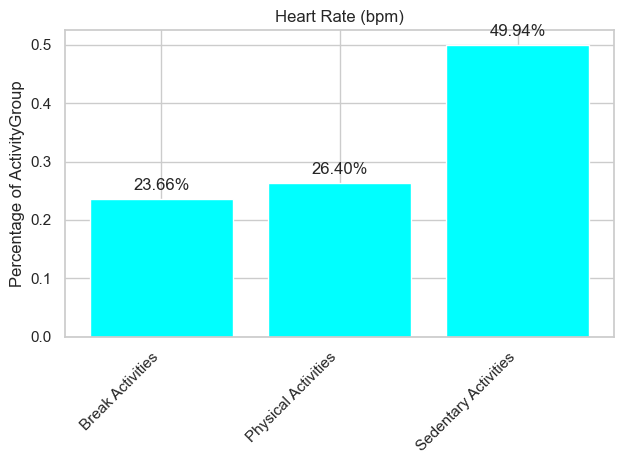

In [19]:
combined_data['ActivityGroup'] = combined_data['ActivityGroup'].astype(str)

fig, ax = plt.subplots(nrows=1, ncols=1)

bar_width = 0.8 

activity_groups, counts = np.unique(combined_data['ActivityGroup'], return_counts=True)
bar_positions = np.arange(len(activity_groups))
bars = ax.bar(bar_positions, counts / sum(counts), width=bar_width, color="cyan")

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom')

ax.set_xticks(bar_positions)
ax.set_xticklabels(activity_groups, rotation=45, ha='right')

ax.set_title('Heart Rate (bpm)')
ax.set_ylabel('Percentage of ActivityGroup')

plt.tight_layout()
plt.show()

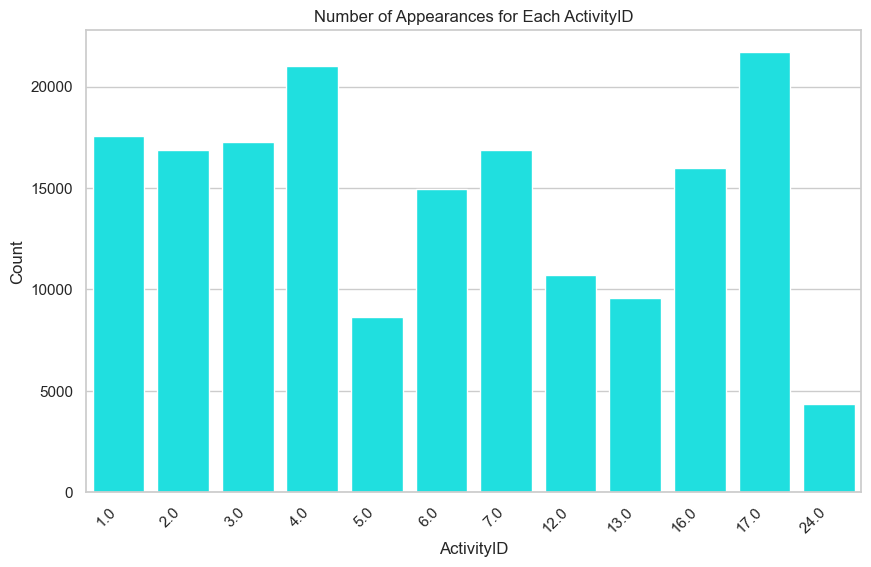

In [20]:
activity_counts = combined_data['activityID'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values,color="cyan")
plt.title('Number of Appearances for Each ActivityID')
plt.xlabel('ActivityID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Next step, I use matplotlib and seaborn functions to create a column chart, showing the number of occurrences of each value in the 'activityID' column of the DataFrame, so when we print the results to the screen we can see that the activities Other activities occupy mainly the data file. If we do not take into account other activities, we can see that activity number 17 and activity number 4 account for a larger proportion than the remaining activities.

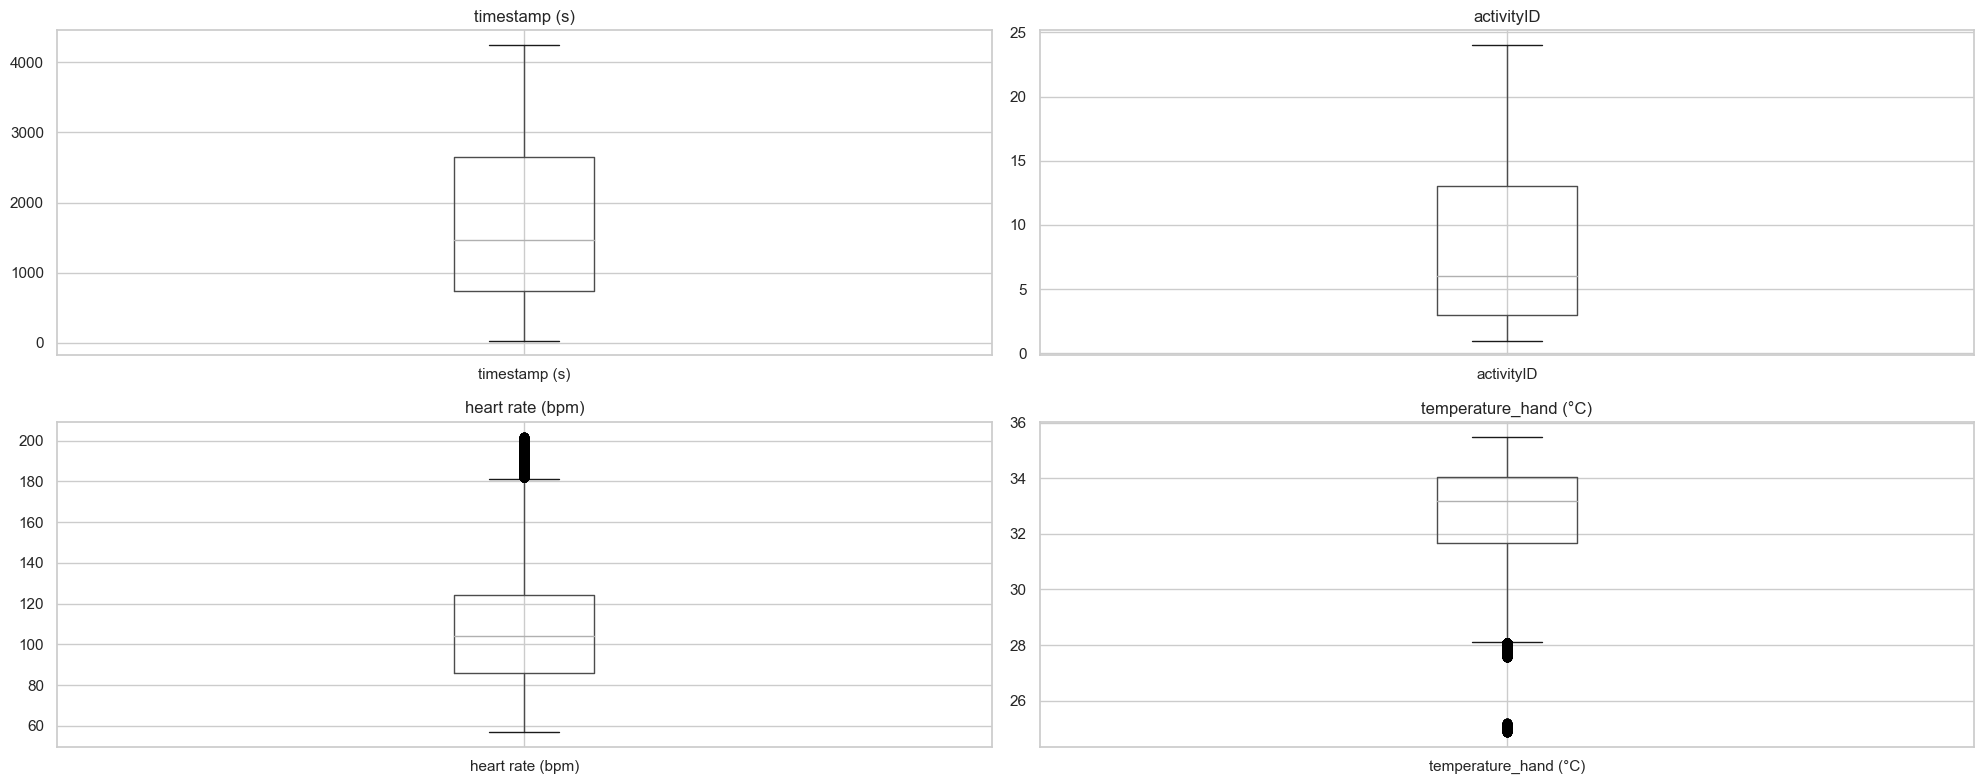

In [21]:
numeric_columns = combined_data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
for col, ax in zip(numeric_columns, axes.flat):
    combined_data.boxplot(column=col, ax=ax)
    ax.set_title(col)

fig.tight_layout()
plt.show()

Boxplots are used to show the distribution of variables based on five key statistics, including the mean, percentiles, and outliers.

- We can see that the average heart rate is around 108 bpm.
- We can see that the timestamp is around 1900 bpm.
- We can see that the temperature is around 33*C.

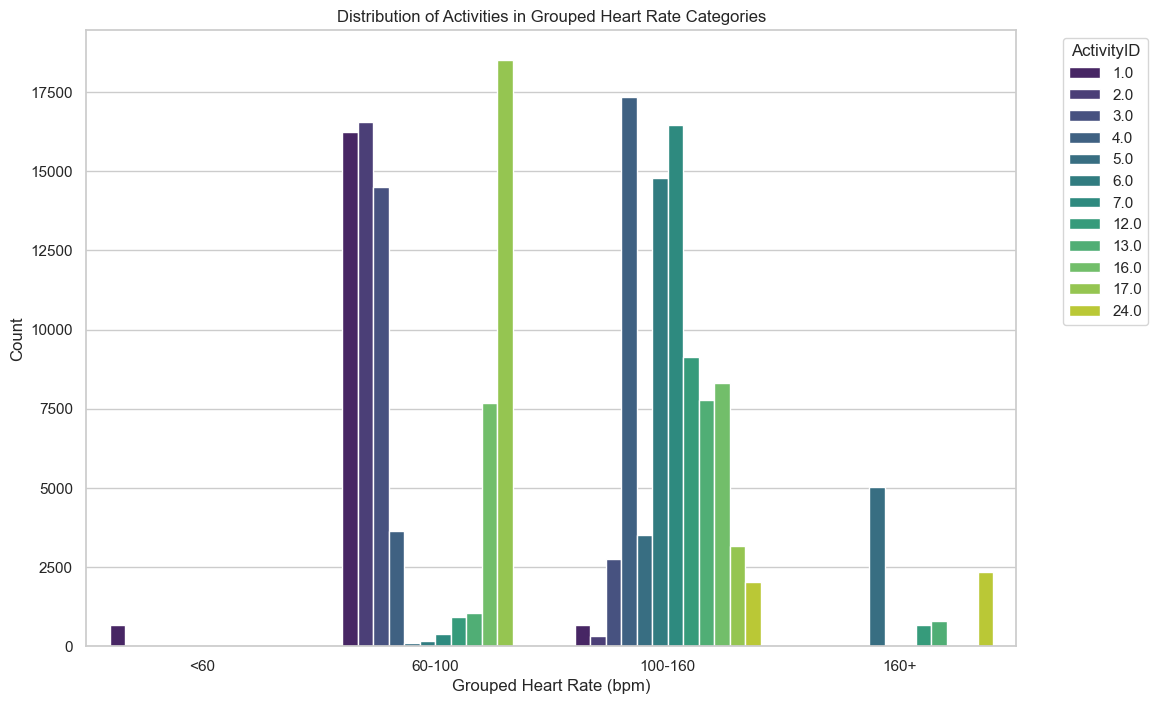

In [22]:
combined_data['grouped_heart rate (bpm)'] = pd.cut(combined_data['heart rate (bpm)'], bins=[0, 60, 100, 160, float('inf')], labels=['<60', '60-100', '100-160', '160+'])
plt.figure(figsize=(12, 8))
sns.countplot(x='grouped_heart rate (bpm)', hue='activityID', data=combined_data, palette='viridis')
plt.title('Distribution of Activities in Grouped Heart Rate Categories')
plt.xlabel('Grouped Heart Rate (bpm)')
plt.ylabel('Count')
plt.legend(title='ActivityID', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

The chart shows the differentiation of activities according to groups of heart rates. The chart shows the differentiation of activities according to groups of heart rates. From there we can see the differentiation of each activity for comparison

In [23]:
from scipy.stats import pearsonr, spearmanr

combined_data['activityID'] = pd.to_numeric(combined_data['activityID'], errors='coerce')
combined_data = combined_data.dropna(subset=['activityID', 'heart rate (bpm)'])

pearson_corr = pearsonr(combined_data['activityID'], combined_data['heart rate (bpm)'])[0]
spearman_corr = spearmanr(combined_data['activityID'], combined_data['heart rate (bpm)'])[0]

print(f"Pearson's correlation coefficient = {pearson_corr}")
print(f"Spearman's correlation coefficient = {spearman_corr}")

Pearson's correlation coefficient = 0.2661675698894854
Spearman's correlation coefficient = 0.40744320702838865


Pearson's correlation measures the linearity of the relationship between two variables. It describes the degree of fluctuation in the same or opposite direction of two variables. The value is in the range [-1, 1].

- Pearson's correlation coefficient is about 0.26, indicating that there is a weak and positive relationship between 'activity' and 'heart rate (bpm)'.

Spearman's coefficient correlation measures the degree of correlation (not necessarily linear) between two variables. It is insensitive to non-linear variations. The value is in the range [-1, 1].

- Spearman's correlation coefficient is about 0.4, indicating that there is a weak and positive relationship between 'activity' and 'heart rate (bpm)'.

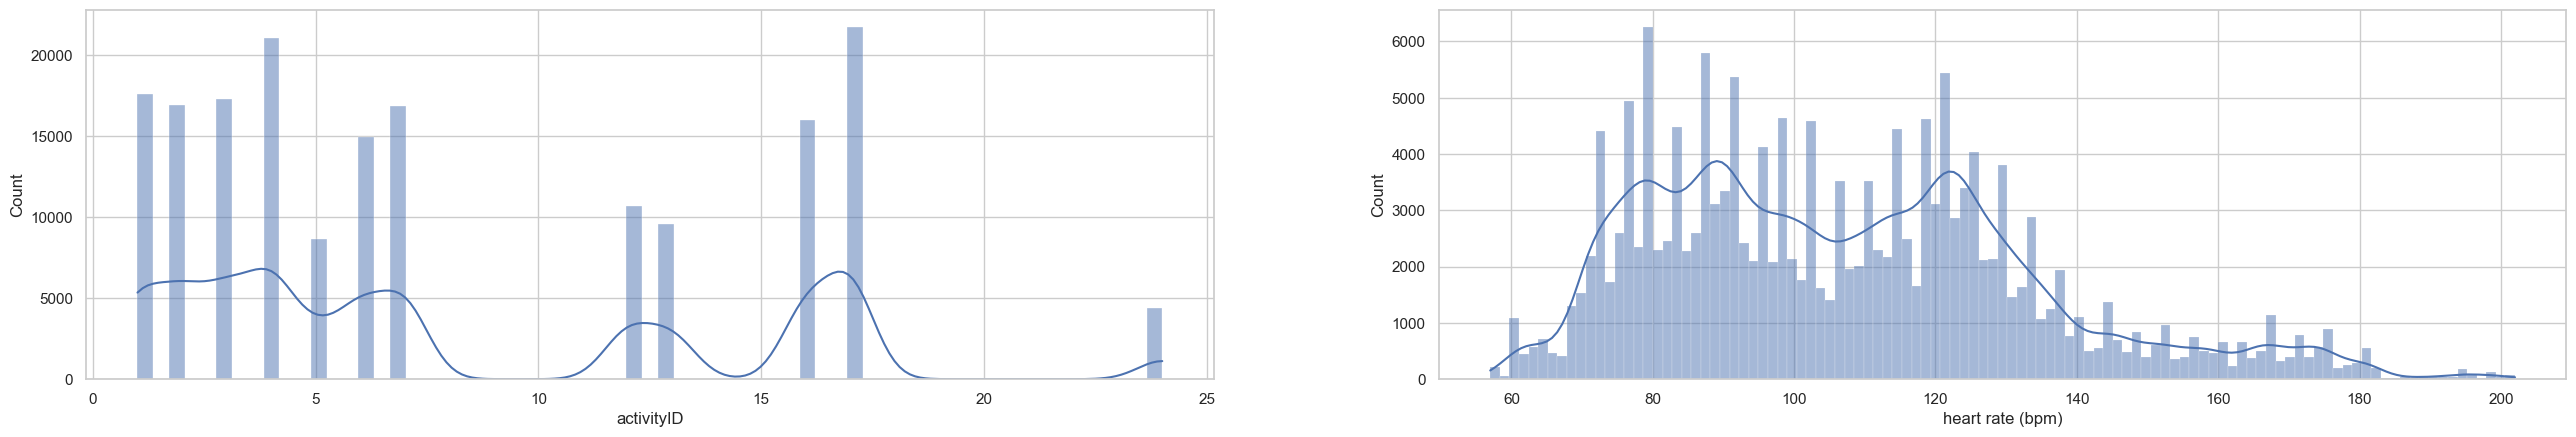

In [24]:
fig, axes = plt.subplots(nrows = 1,ncols = 2)

sns.histplot(data=combined_data,ax=axes[0],x="activityID",kde=True)
sns.histplot(data=combined_data,ax=axes[1],x="heart rate (bpm)",kde=True)

fig.set_figwidth(fig.get_figwidth() *5)

The heart rate box plot shows that average heart rate is higher at higher activity. This is because when the body is active, it needs to pump more blood to provide oxygen and nutrients to the muscles.

The hand temperature box plot shows that average hand temperatures are higher at higher activity. This is because when the body is activated, it produces more heat.

Both graphs show a positive relationship between heart rate, hand temperature, and activity. This means that when one variable increases, the remaining variables also tend to increase.

In [25]:
columns_to_remove = [
    'grouped_heart rate (bpm)',
    'ActivityGroup',
]

combined_data = combined_data.drop(columns=columns_to_remove)

I remove redundant columns

### ECDFs

In [26]:
def box_hist_plot(combined_data,col,axes=None,title=None,hist=True):
    values = combined_data[combined_data[col].notna()][col].values
    
    if axes is None:
        fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True)
        fig.set_figwidth(fig.get_figwidth() * 2.0)
        
    if title is None:
        title = col

    if hist:
        sns.histplot(data=combined_data,ax=axes[0],y=col,stat="density")
        sns.kdeplot(data=combined_data,y=col,ax=axes[0],color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))
    else:
        vals, counts = np.unique(values,return_counts=True)

        axes[0].barh(vals,counts/sum(counts))
        axes[0].set_xlabel("Density")
        
    mean = np.mean(values)
    median = np.median(values)
    axes[0].axhline(mean,ls="dashed",color="r")
    axes[0].axhline(median,ls="dashed",color="g")

    if hist or (len(vals) > 2):
        combined_data.plot(kind="box",y=col,ax=axes[1],meanline=True,showmeans=True,meanprops={"color":"r"})
    else:
        axes[1].set_xlim([0.5,1.5])
    x = np.random.normal(1, 0.02, size=len(values))
    axes[1].plot(x, values, c="lightgray", marker="x", ls="None")

    axes[0].set_ylabel(col)
    axes[1].set_xticklabels([""])
    axes[0].set_title(f"{title}: n = {len(values)}")
    axes[1].set_title(f"{title}: mean = {mean:.4f}, median = {median:.4f}")

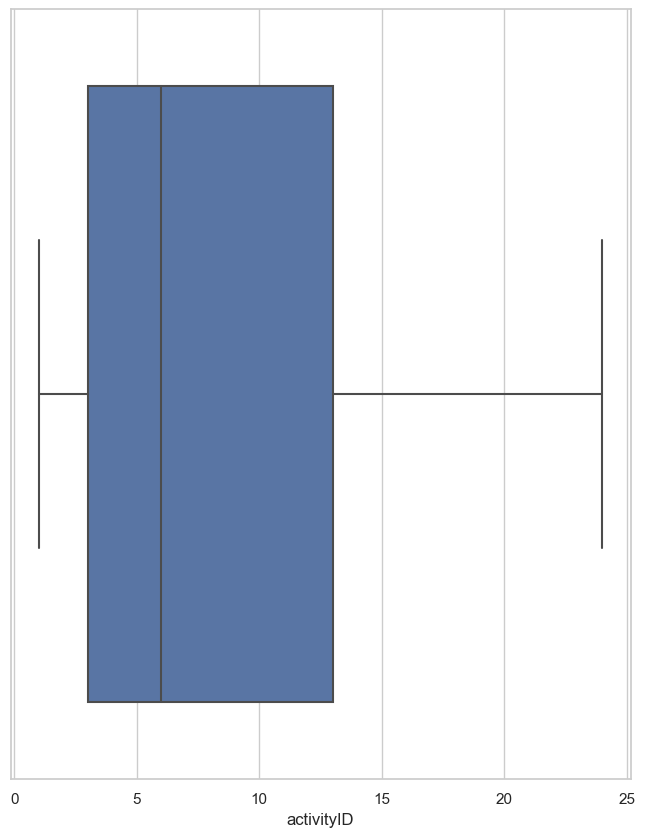

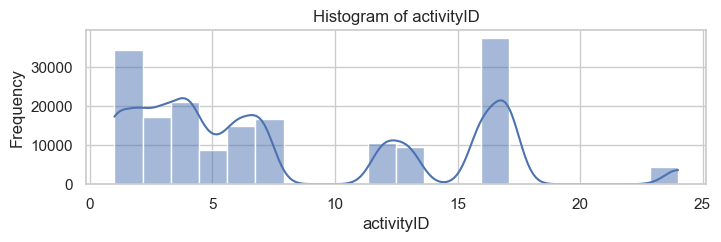

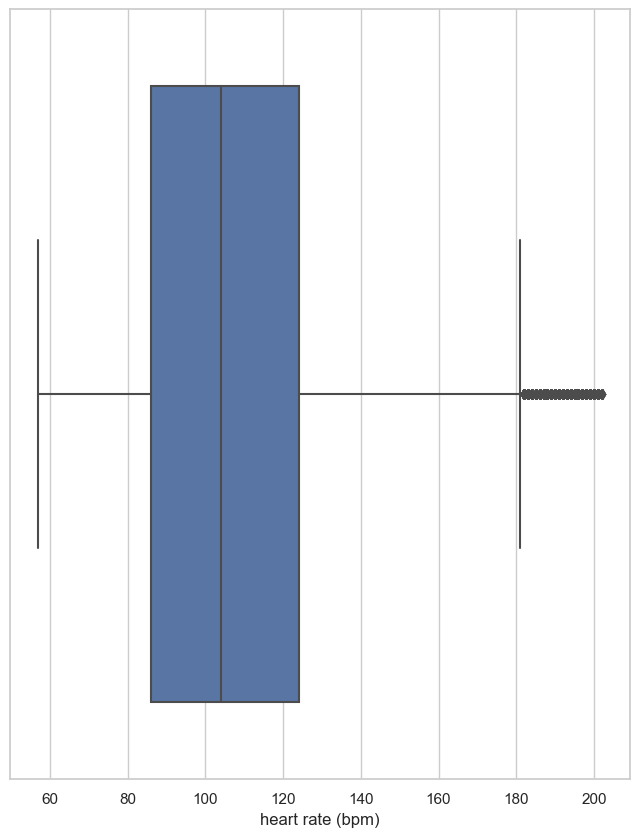

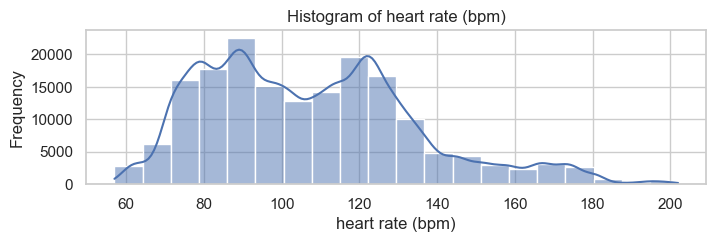

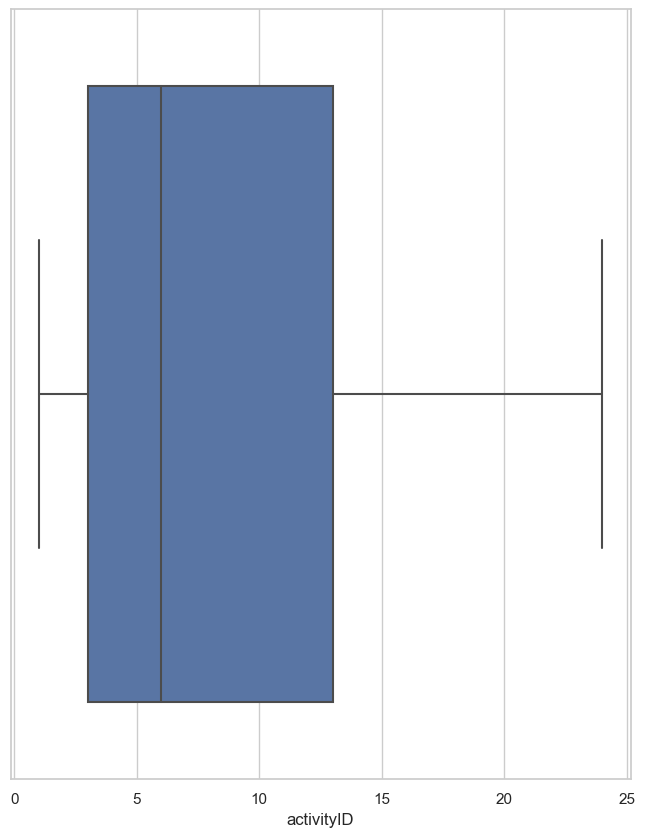

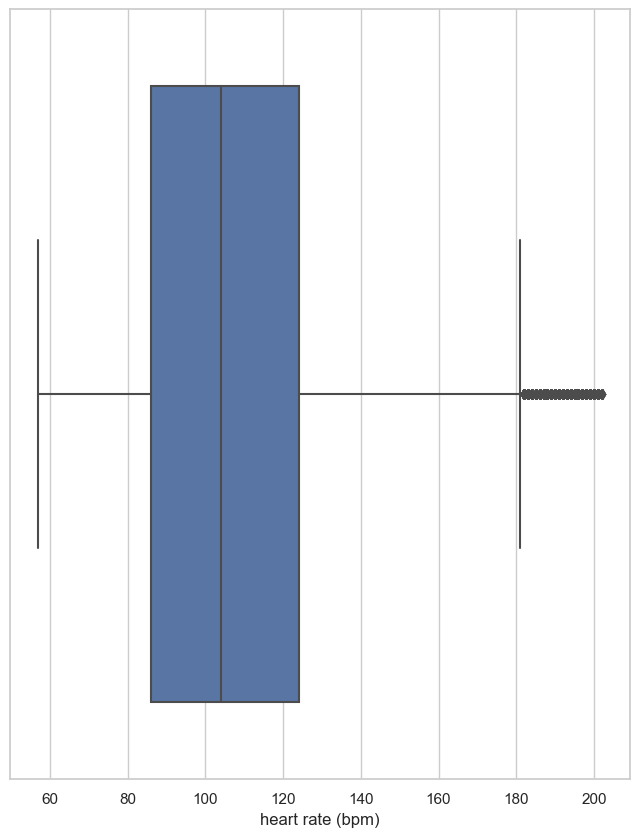

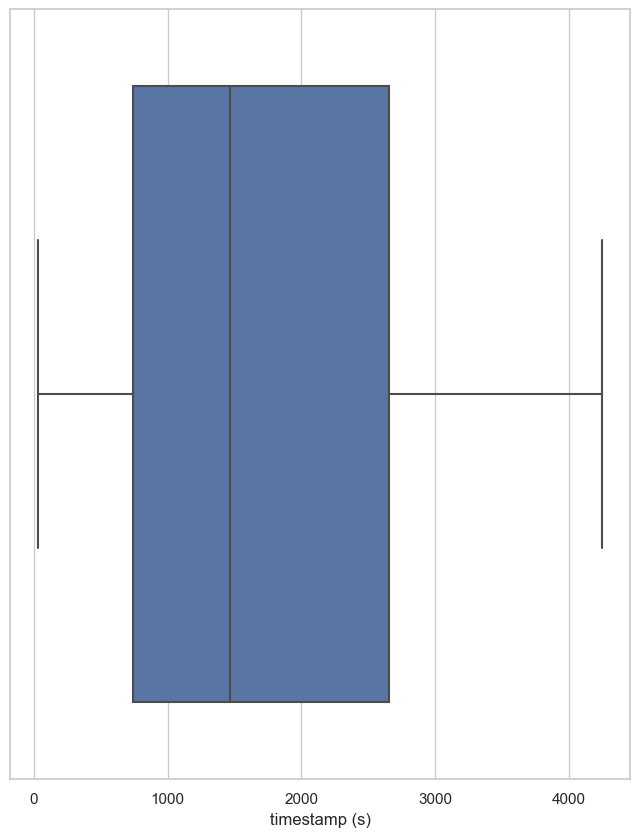

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_hist_plot(data, column, hist=True):
    plt.figure(figsize=(8, 10))
    
    if data[column].dtype.kind == 'f':
        sns.boxplot(x=column, data=data)
    elif data[column].dtype.kind in ['i', 'u']:
        sns.boxplot(y=column, data=data)
    else:
        print(f"Skipping boxplot for {column} as it is not a numeric column.")
    
    if hist:
        plt.figure(figsize=(8,2))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

cols = combined_data.columns

hist_plots = ["activityID", "heart rate (bpm)"]
for col in hist_plots:
    box_hist_plot(combined_data, col)

selected_columns = ["activityID", "heart rate (bpm)", "timestamp (s)"]
for col in selected_columns:
    box_hist_plot(combined_data, col, hist=False)

plt.show()

The code defines a function box_hist_plot to plot a box plot and histogram (if selected) for specified columns in a dataset using Matplotlib and Seaborn. The function checks whether a column is numeric and chooses between a box plot and histogram accordingly. The code then uses this function for specific columns in a data set (combined_data), both with and without histograms. Finally, it creates graphs for "activityID," "heart rate (bpm)," and "timestamp(s)." The code is intended to visualize the distribution and characteristics of these columns

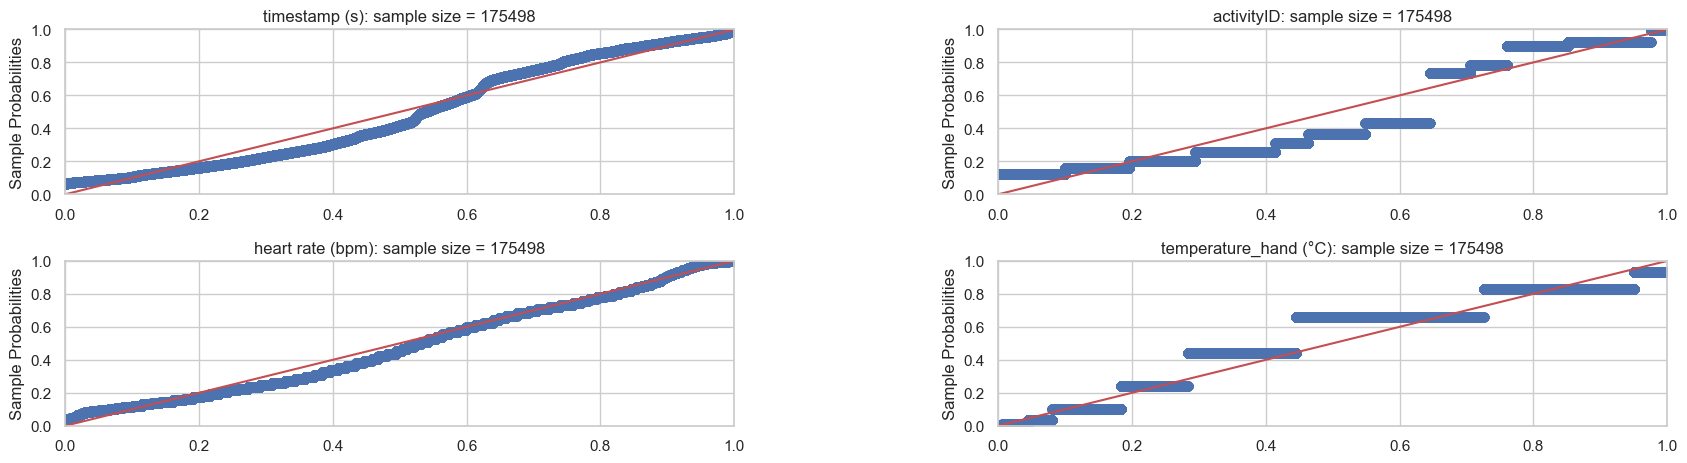

In [28]:
import statsmodels.api as sm 
from scipy.stats import norm

fig, axes = plt.subplots(nrows=2, ncols=2)

for col, ax in zip(combined_data.columns, axes.flat):
    clean_series = combined_data[~combined_data[col].isna()][col]
    
    clean_series_numeric = clean_series.astype(int)

    pp_x = sm.ProbPlot(clean_series_numeric, dist=norm, fit=True)
    pp_x.ppplot(line="45", ax=ax)

    ax.set_title(f"{col}: sample size = {combined_data[col].count()}")
    ax.set_xlabel("")

fig.tight_layout()
fig.set_figwidth(fig.get_figwidth() * 3)
plt.show()

Based on the figure, we can see that the evil function is not following the normal probability distribution

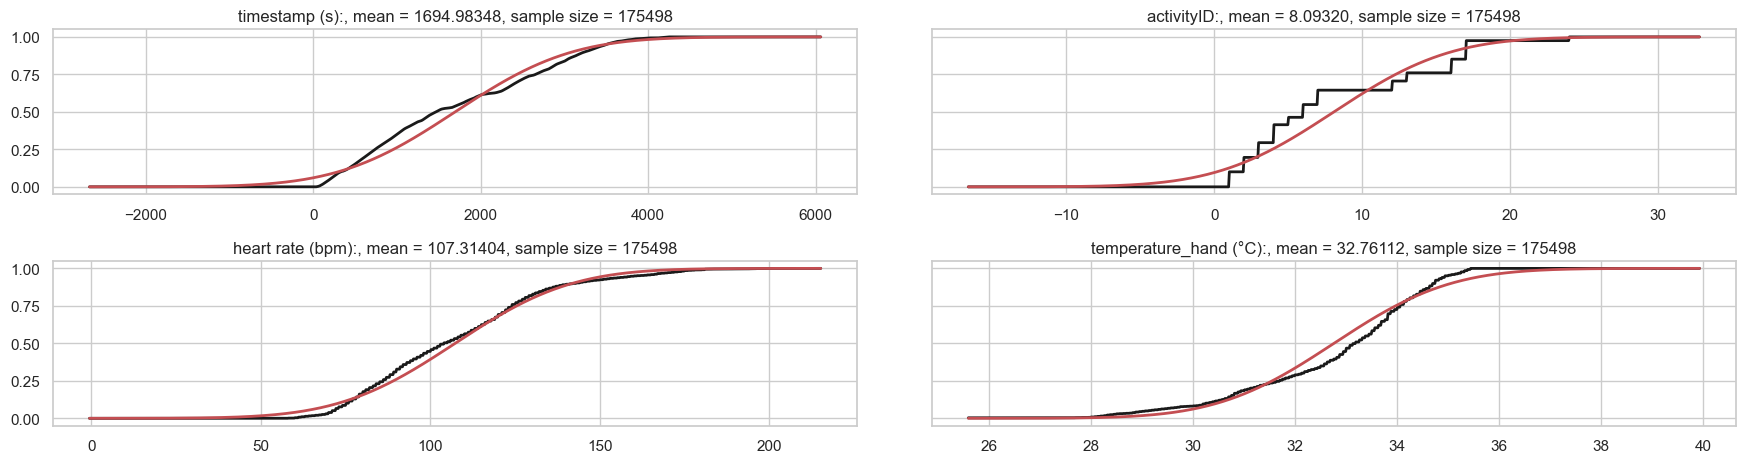

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np 

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)
for col, ax in zip(combined_data.columns, axes.flatten()):
    clean_series = combined_data[~combined_data[col].isna()][col]

    clean_series = clean_series.dropna()

    clean_series = pd.to_numeric(clean_series, errors='coerce')
    
    ecdf = ECDF(clean_series)
    
    mean = clean_series.mean()
    std = clean_series.std(ddof=1)
    
    start_value = (mean - 4 * std)
    stop_value = (mean + 4 * std)
    
    xax = np.linspace(start_value, stop_value, 1001)
    
    ax.plot(xax, ecdf(xax), c="k", lw=2)
    ax.plot(xax, norm(loc=mean, scale=std).cdf(xax), c="r", lw=2)
    
    ax.set_title(f"{col}:, mean = {mean:.5f}, sample size = {clean_series.count()}")
fig.tight_layout()
fig.set_figwidth(fig.get_figwidth() * 3)
plt.show()

Analyze timestamp charts

- A timestamp chart displays the distribution of time values in data. Time values are measured in seconds.

The graph shows that the time values in the data tend to cluster around a mean value of 1694.98 seconds. However, there are some data points that fall outside the range of four standard deviations of the mean. This shows that the data is significantly more dispersed than a normal distribution.

Analyze the activityID graph

- The activityID chart shows the distribution of activity ID values in the data. The activity ID is an integer that represents the type of activity the user is performing.

The chart shows that the activity ID values in the data tend to cluster around a mean of 8.09. However, there are some data points that fall outside the range of four standard deviations of the mean. This shows that the data is significantly more dispersed than a normal distribution.

- Analyze heart rate bpm chart

The heart rate bpm chart displays the distribution of heart rate values in the data. Heart rate is measured in beats per minute (bpm).

The graph shows that the heart rate values in the data tend to cluster around a mean value of 107.31 bpm. However, there are some data points that fall outside the range of four standard deviations of the mean. This shows that the data is significantly more dispersed than a normal distribution.

- Analyze temperature chart

The temperature chart displays the distribution of temperature values in the data. Temperature is measured in degrees Celsius.

The chart shows that the temperature values in the data tend to cluster around a mean value of 32.76 degrees Celsius. However, there are some data points that fall outside the four standard deviation range of the values. average value. This shows that the data is significantly more dispersed than a normal distribution.


Conclude

- All four data variables, timestamp, activityID, heart rate bpm and temperature, do not follow a normal distribution. The data has a dispersion that is significantly higher than a normal distribution.

- This could be because the data are influenced by extraneous factors, such as measurement error or uncontrolled variables. Additionally, the data may come from a population that does not follow a normal distribution.

- If the data do not follow a normal distribution, then statistical methods based on normal distribution may not be accurate. In this case, it is necessary to use other statistical methods, more suitable for data that do not follow a normal distribution.

In [30]:
heart_rate_mean = combined_data['heart rate (bpm)'].mean()
print(f"Mean of 'heart rate (bpm)' column: {heart_rate_mean}")

Mean of 'heart rate (bpm)' column: 107.31404346488279


In [31]:
heart_rate_thresh = 108
combined_data["heart rate (bpm)"] = pd.to_numeric(combined_data["heart rate (bpm)"], errors="coerce")
heart_rate_combined_data = combined_data[combined_data["heart rate (bpm)"] > heart_rate_thresh]
low_heart_rate = combined_data[combined_data["heart rate (bpm)"] <= heart_rate_thresh]

Based on the interval we just calculated for the bpm heart rate column, I will divide the bpm heart rate column into 2 data, 1 heart rate data below 116 and 2 heart rate data above 108.

In [32]:
correlation = heart_rate_combined_data['heart rate (bpm)'].corr(heart_rate_combined_data['activityID'])
print(f"Correlation between activityID and heart rate (bpm): {correlation}")

Correlation between activityID and heart rate (bpm): 0.31548441572581293


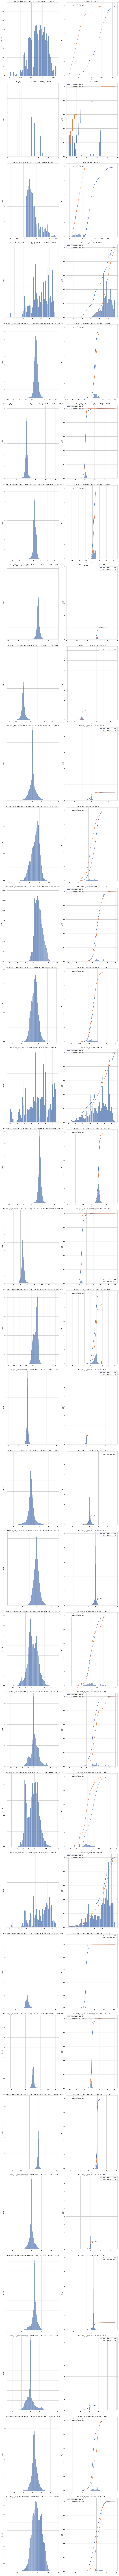

In [33]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, axes = plt.subplots(nrows=len(heart_rate_combined_data.columns[:-1]), ncols=2, sharex="row", figsize=(15, 5 * len(heart_rate_combined_data.columns[:-1])))

for idx, col in enumerate(heart_rate_combined_data.columns[:-1]):
    qual_str = [f"Heart rate (bpm) > {heart_rate_thresh}", f"Heart rate (bpm) <= {heart_rate_thresh}"]

    for idx2, df in enumerate([heart_rate_combined_data, low_heart_rate]):
        sns.histplot(data=df, ax=axes[idx, idx2], x=col, line_kws={"lw": 2}, stat="density")
        mean = df[col].mean()
        axes[idx, idx2].set_title(f"{col}, {qual_str[idx2]}: Mean = {mean:.4f}, n = {len(df)}")
        axes[idx, idx2].set_xlabel("x")

    if len(heart_rate_combined_data[col]) == 0 or len(low_heart_rate[col]) == 0:
        continue

    heart_rate_combined_data_col = heart_rate_combined_data[col].dropna()
    low_heart_rate_col = low_heart_rate[col].dropna()

    quality_ECDF = ECDF(heart_rate_combined_data_col)
    low_heart_rate_ECDF = ECDF(low_heart_rate_col)

    xax = np.linspace(
        min(heart_rate_combined_data_col.min(), low_heart_rate_col.min()),
        max(heart_rate_combined_data_col.max(), low_heart_rate_col.max()),
        1001
    )

    axes[idx, 1].plot(xax, quality_ECDF(xax), label=qual_str[0])
    axes[idx, 1].plot(xax, low_heart_rate_ECDF(xax), label=qual_str[1])
    axes[idx, 1].legend(loc="best")

    D = np.max(np.abs(quality_ECDF(xax) - low_heart_rate_ECDF(xax)))
    axes[idx, 1].set_title(f"{col}: D = {D:.4f}")
    axes[idx, 1].set_xlabel("x")
    axes[idx, 1].set_ylabel(r"$\hat{F}_{X}(x)$")

fig.set_figheight(fig.get_figheight() * 2)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig.tight_layout()
plt.show()

This chart helps evaluate the similarities or differences between two groups (high heart rate group and low heart rate group) for each specific independent variable.

The Kolmogorov-Smirnov distance is a measurement that helps determine the degree of difference between two groups. If the Kolmogorov-Smirnov distance is large, there may be a significant difference between the two groups' distributions for that independent variable.

In [34]:
def box_hist_plot(combined_data,col,axes=None,title=None,hist=True):
    values = combined_data[combined_data[col].notna()][col].values
    
    if axes is None:
        fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True)
        fig.set_figwidth(fig.get_figwidth() * 2.0)
        
    if title is None:
        title = col

    if hist:
        sns.histplot(data=combined_data,ax=axes[0],y=col,stat="density")
        sns.kdeplot(data=combined_data,y=col,ax=axes[0],color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))
    else:
        vals, counts = np.unique(values,return_counts=True)

        axes[0].barh(vals,counts/sum(counts))
        axes[0].set_xlabel("Density")
        
    mean = np.mean(values)
    median = np.median(values)
    axes[0].axhline(mean,ls="dashed",color="r")
    axes[0].axhline(median,ls="dashed",color="g")

    if hist or (len(vals) > 2):
        combined_data.plot(kind="box",y=col,ax=axes[1],meanline=True,showmeans=True,meanprops={"color":"r"})
    else:
        axes[1].set_xlim([0.5,1.5])
    x = np.random.normal(1, 0.02, size=len(values))
    axes[1].plot(x, values, c="lightgray", marker="x", ls="None")

    axes[0].set_ylabel(col)
    axes[1].set_xticklabels([""])
    axes[0].set_title(f"{title}: n = {len(values)}")
    axes[1].set_title(f"{title}: mean = {mean:.4f}, median = {median:.4f}")

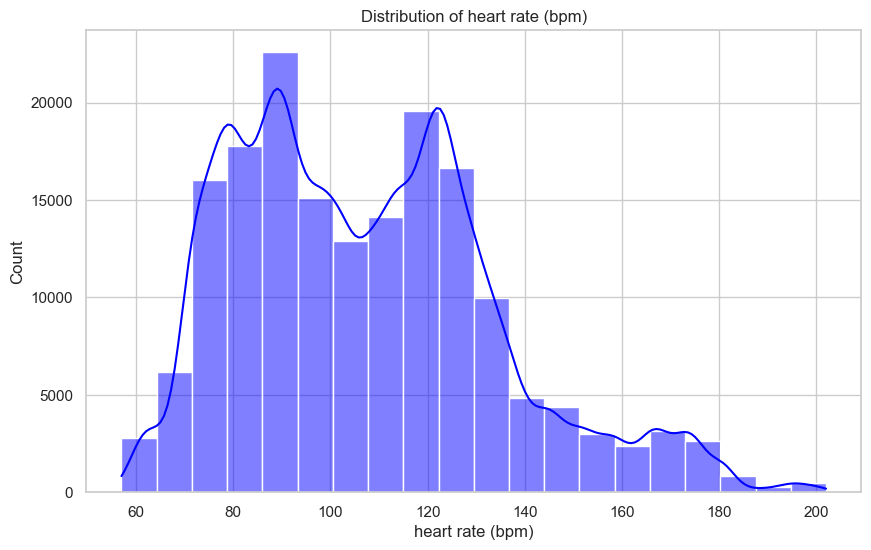

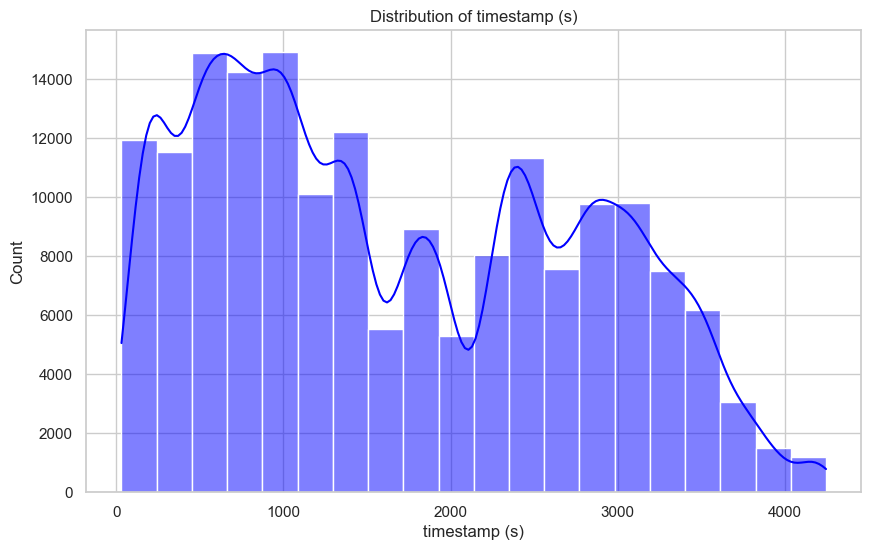

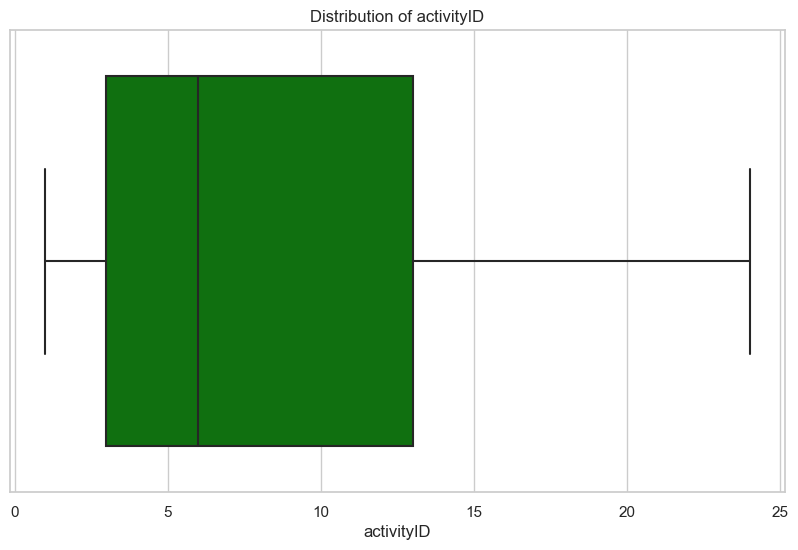

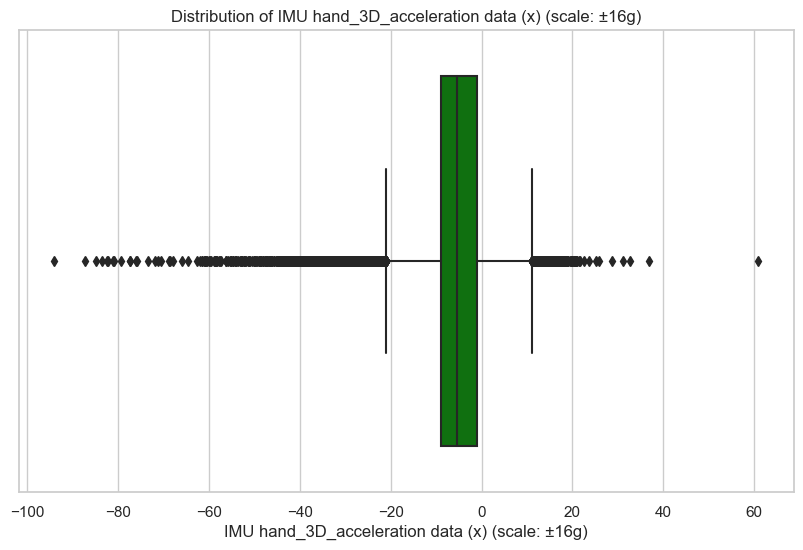

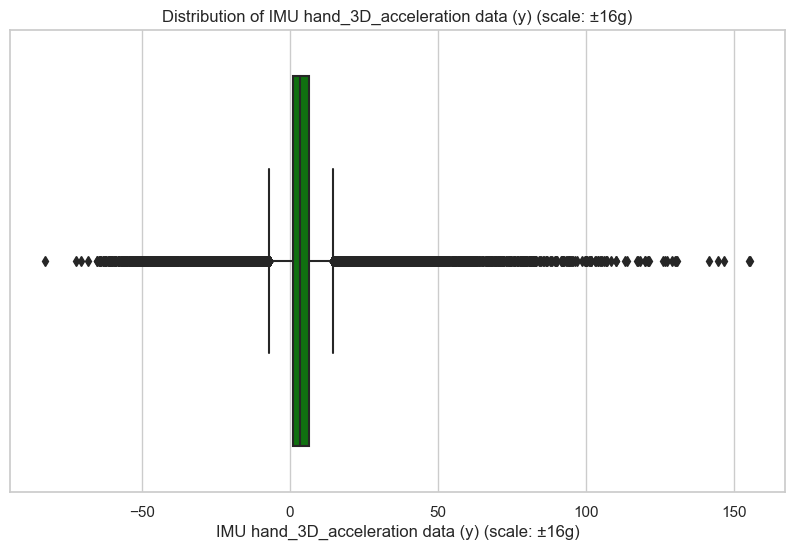

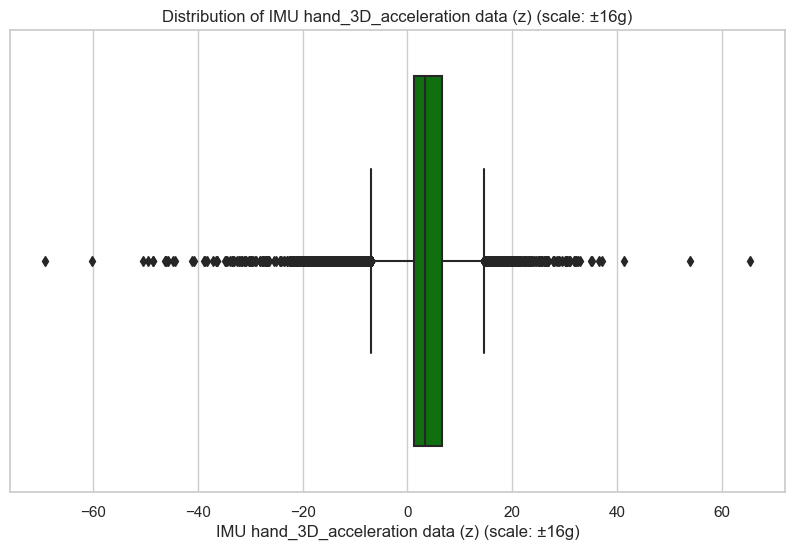

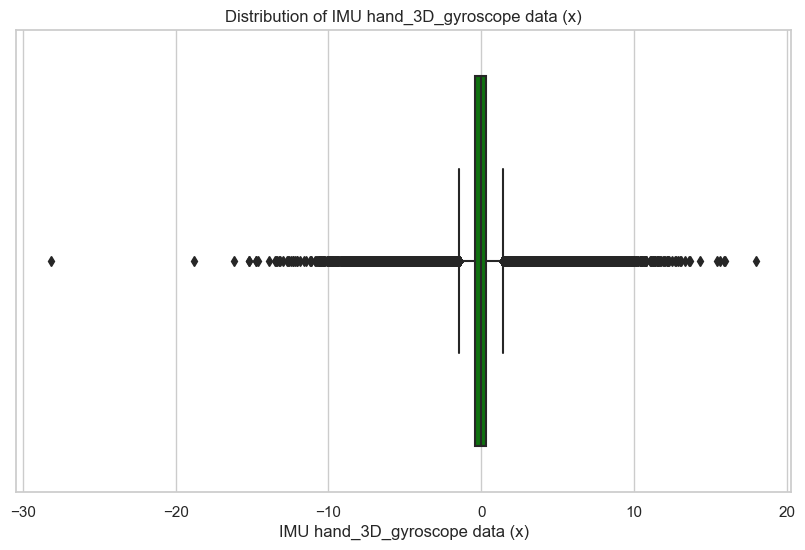

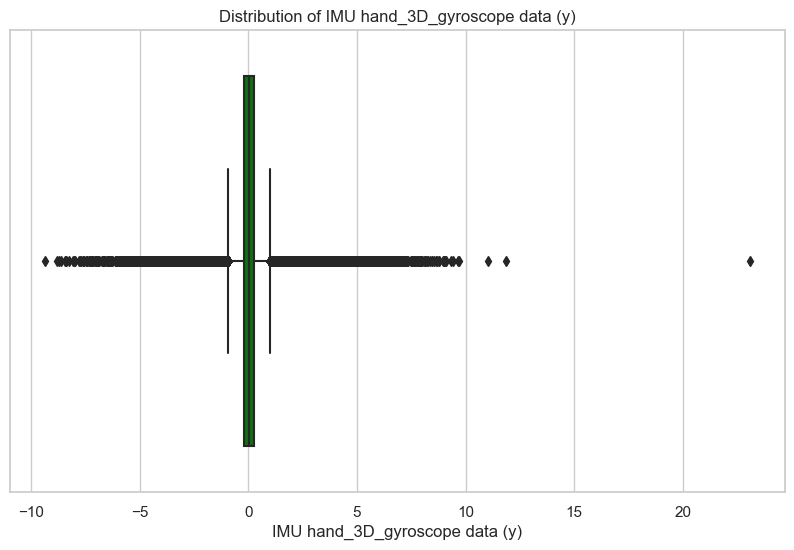

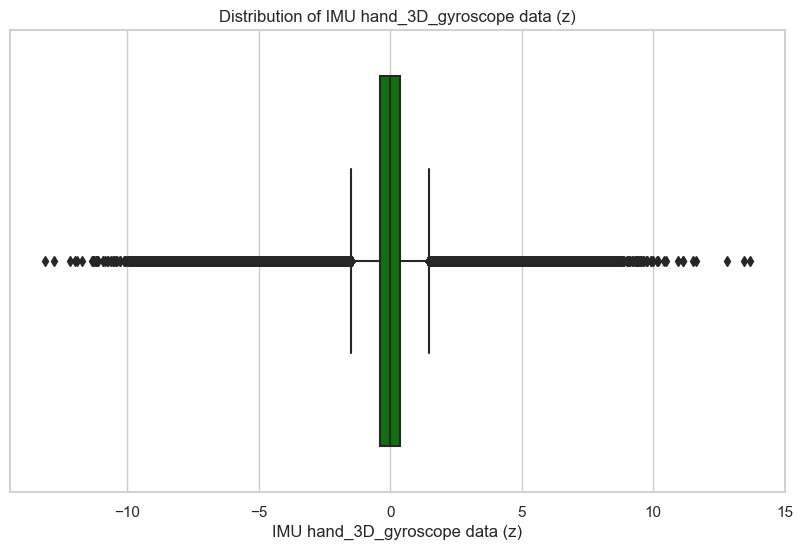

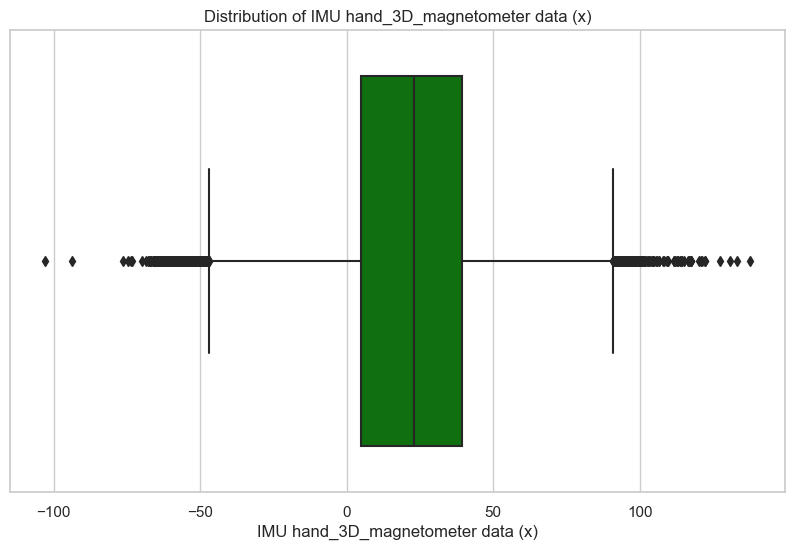

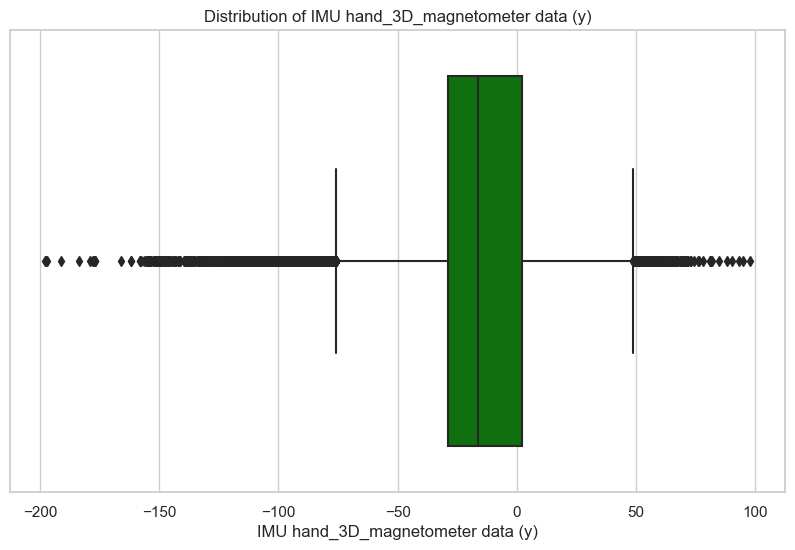

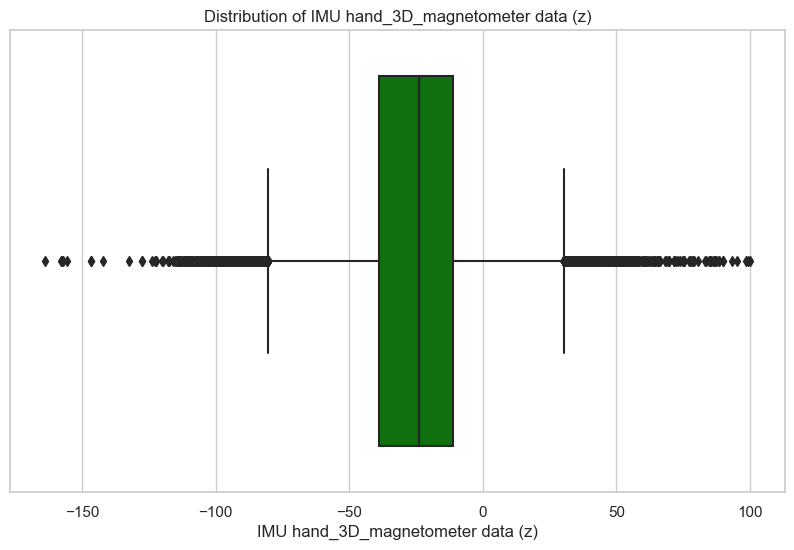

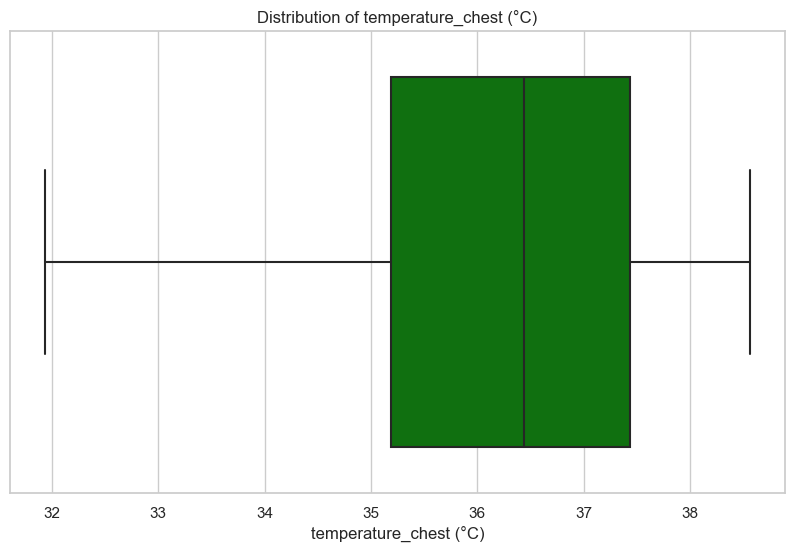

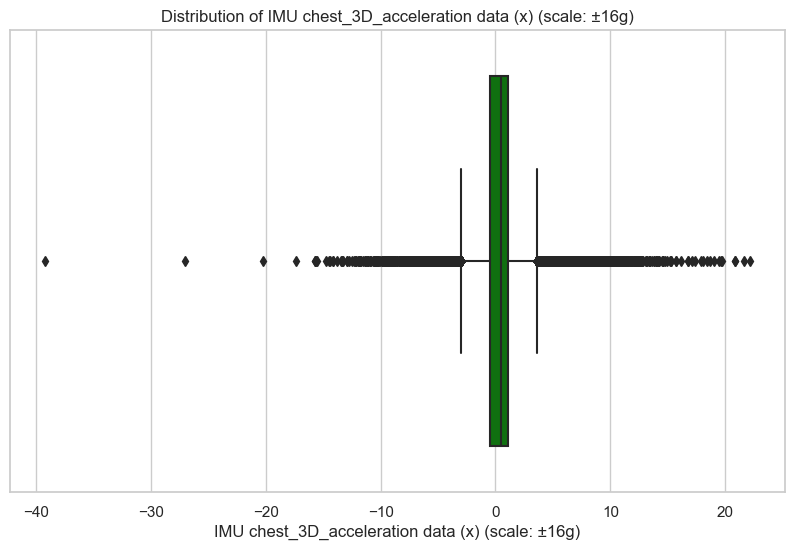

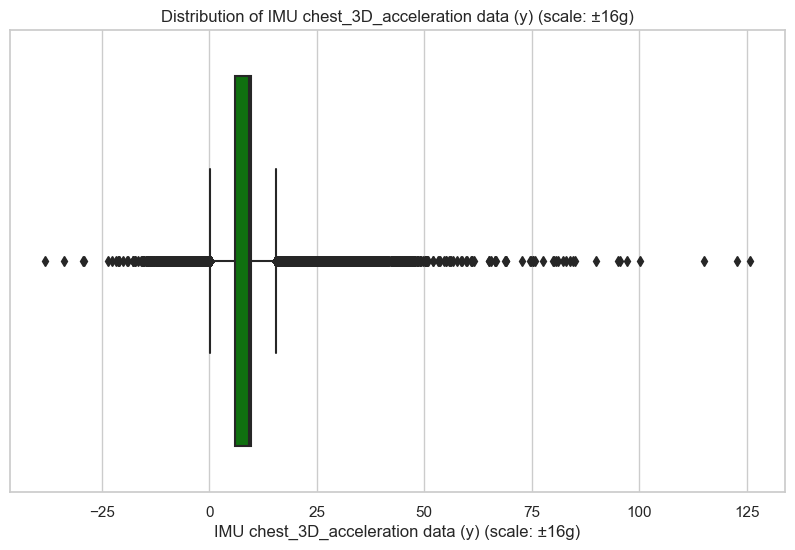

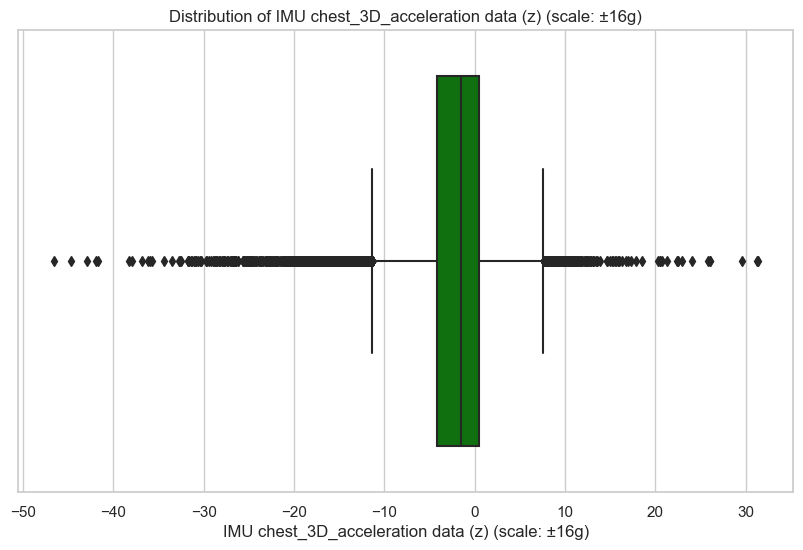

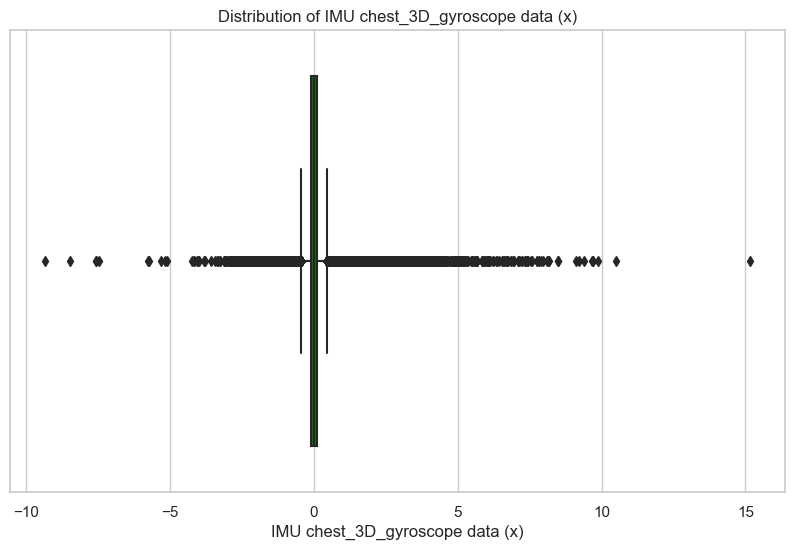

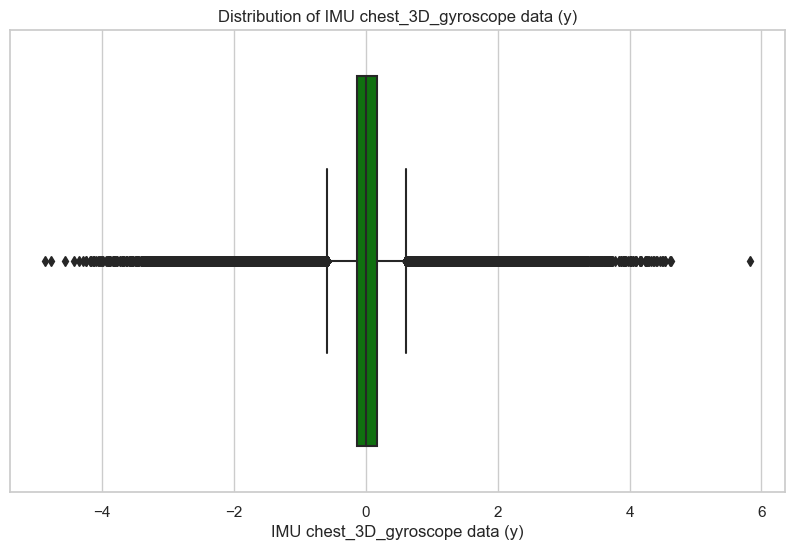

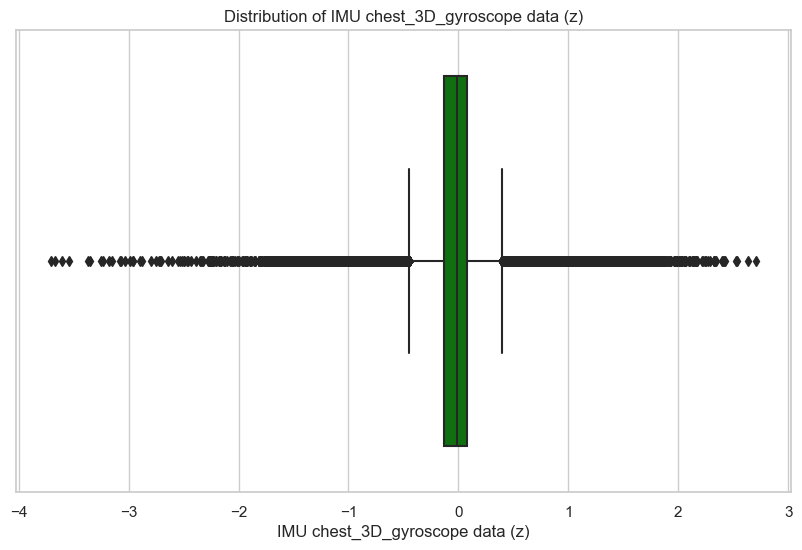

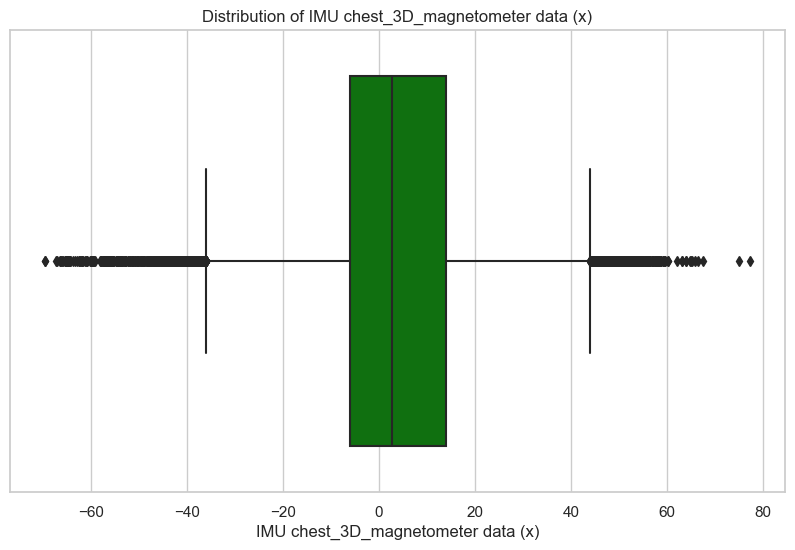

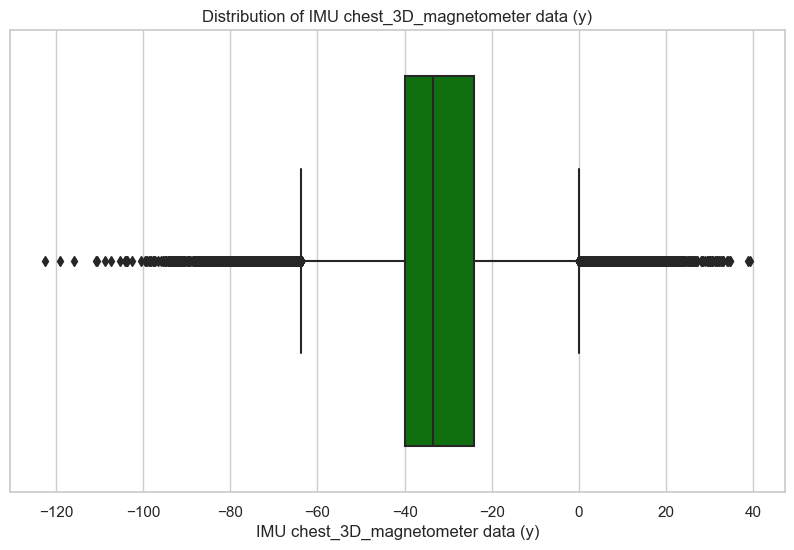

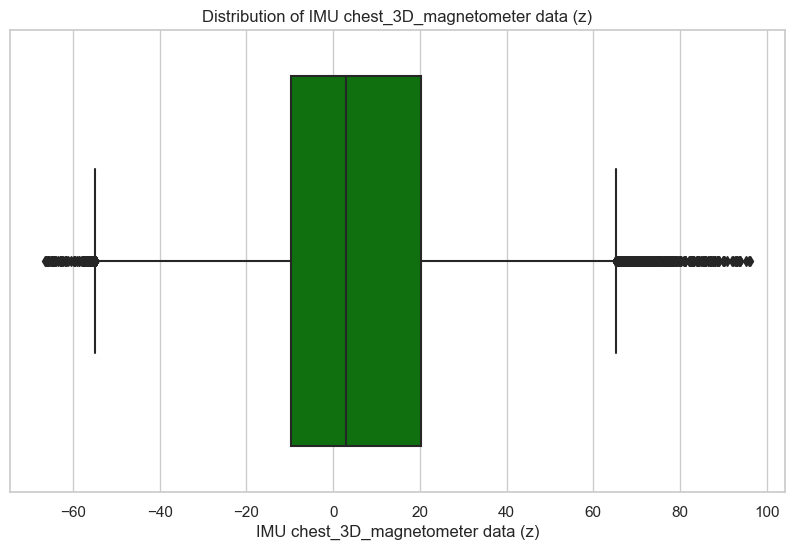

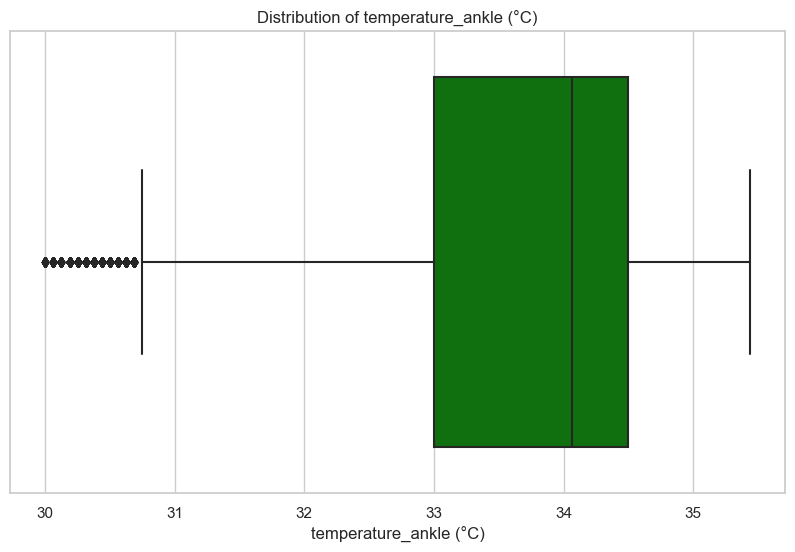

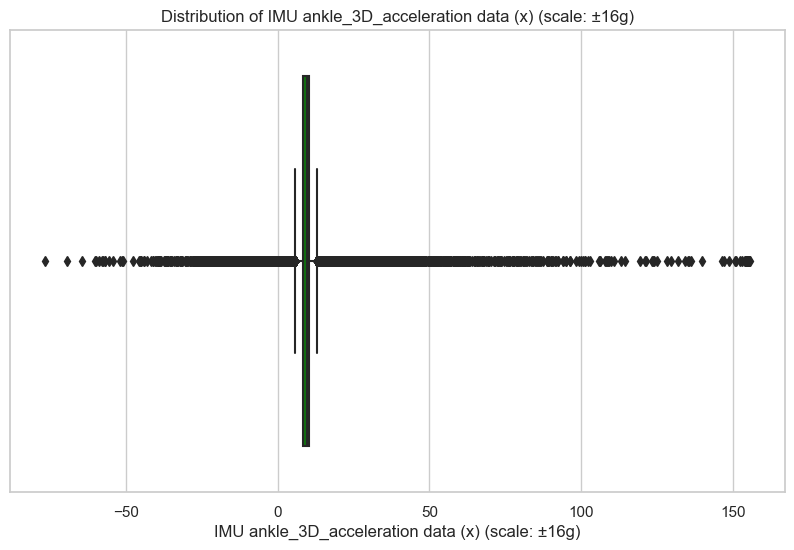

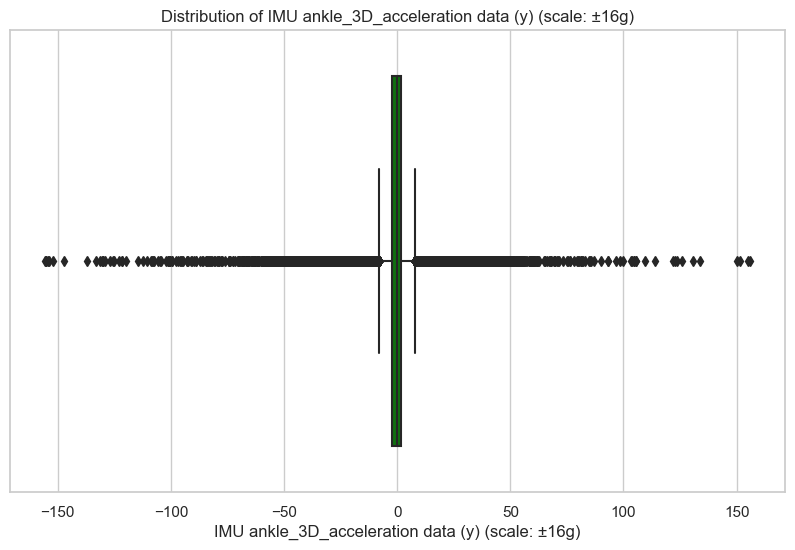

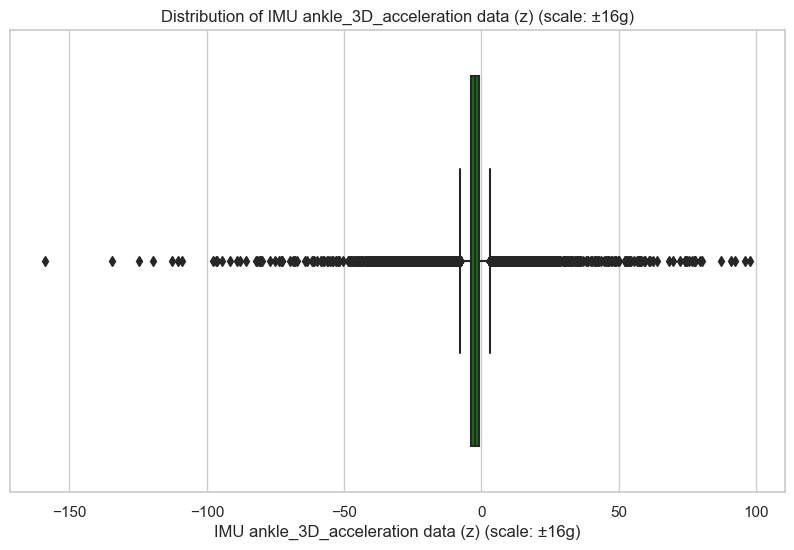

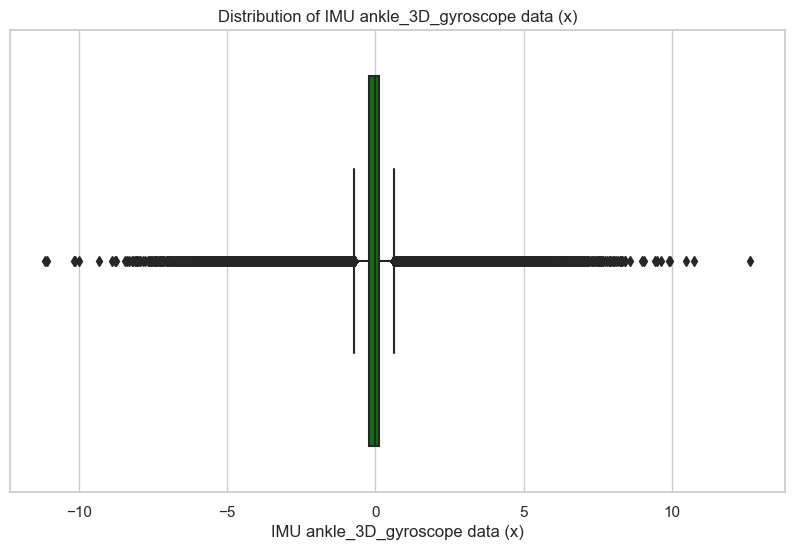

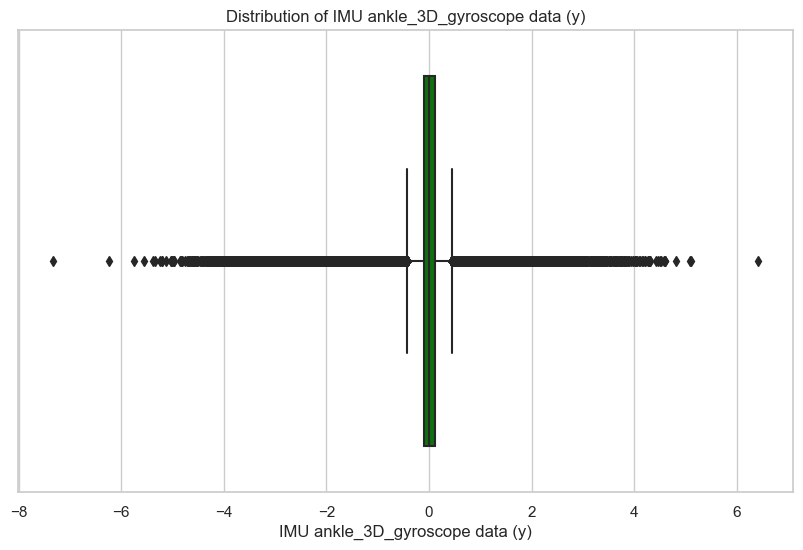

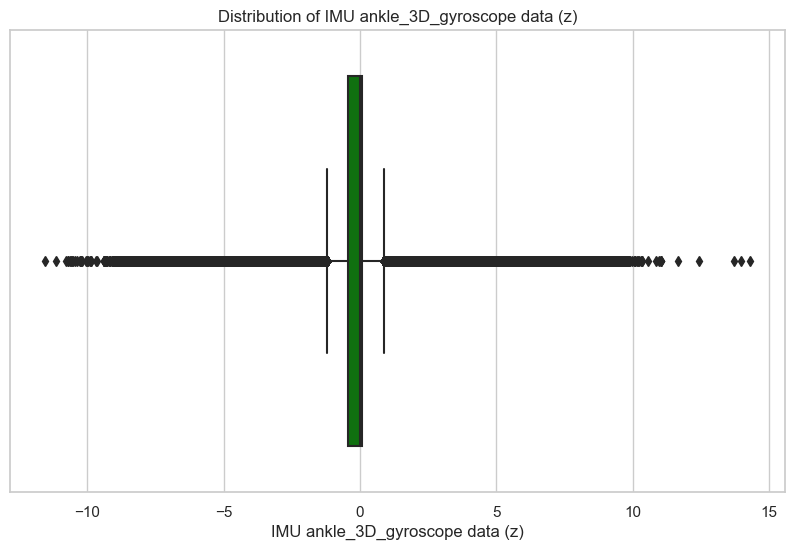

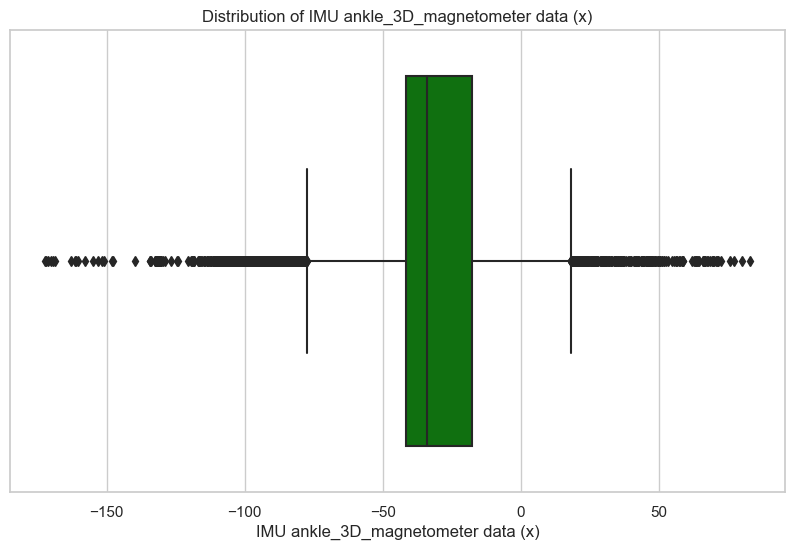

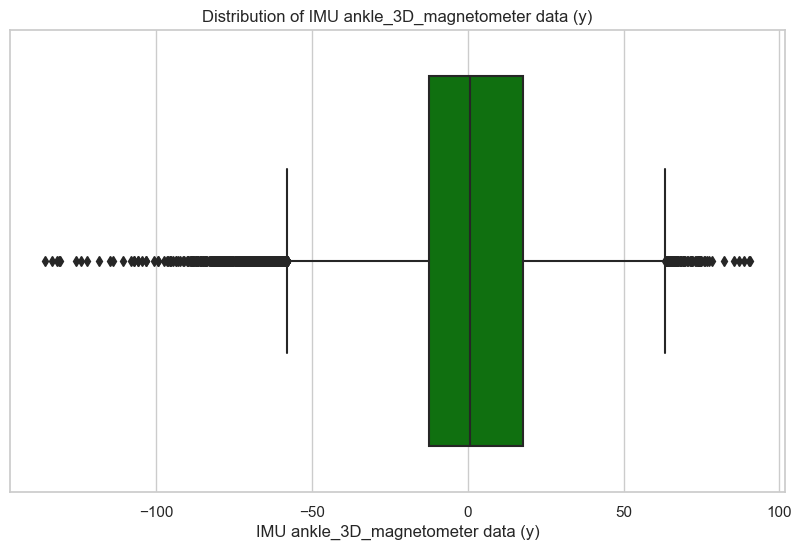

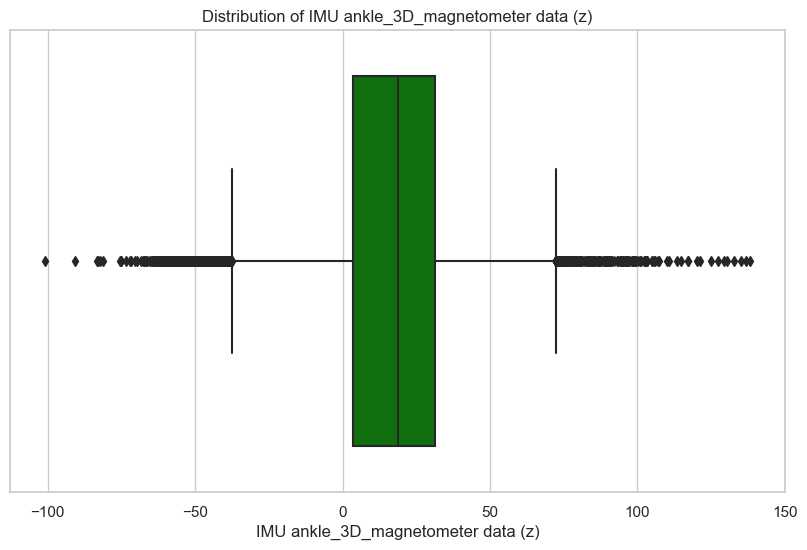

In [35]:
def box_hist_plot(data, column, hist=True):
    plt.figure(figsize=(10, 6))
    
    if hist:
        sns.histplot(data[column], kde=True, bins=20, color='blue')
    else:
        sns.boxplot(x=data[column], color='green')
    
    plt.title(f'Distribution of {column}')
    plt.show()

cols = combined_data.columns
hist_plots = ["heart rate (bpm)", "timestamp (s)"]
bar_plots = [c for c in cols if (c not in hist_plots) and (c != "IMU hand_3D_acceleration data (x)") and (c != "temperature_hand (°C)")]
for col in hist_plots:
    box_hist_plot(combined_data, col)
for col in bar_plots:
    box_hist_plot(combined_data, col, hist=False)

Histogram helps display the distribution of "heart rate (bpm)" and "timestamp (s)" as a histogram

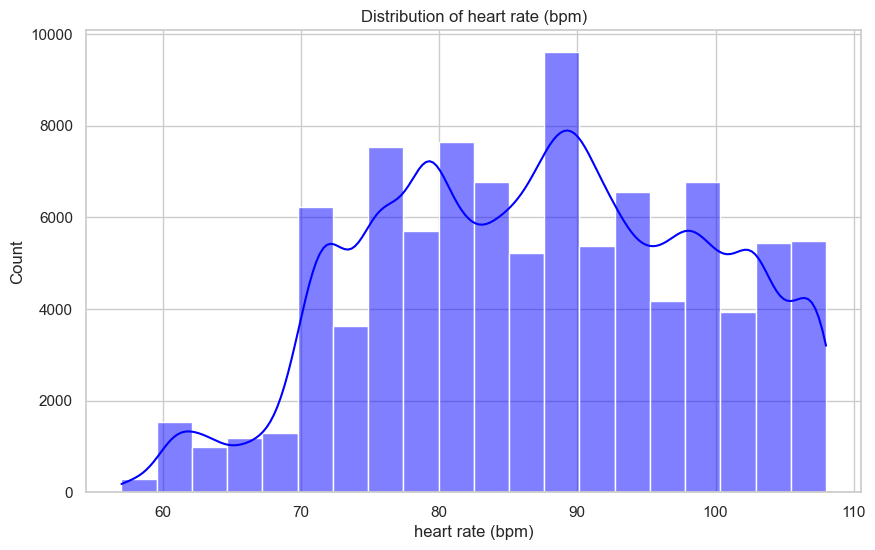

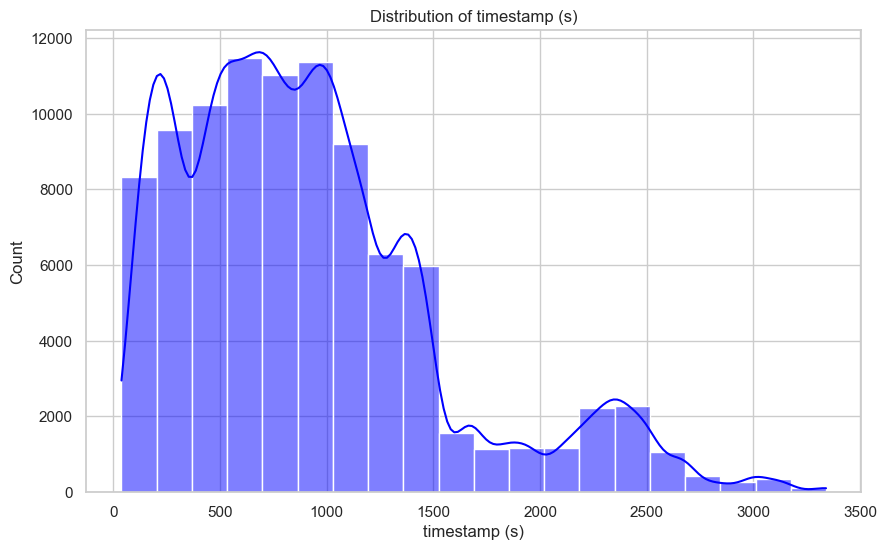

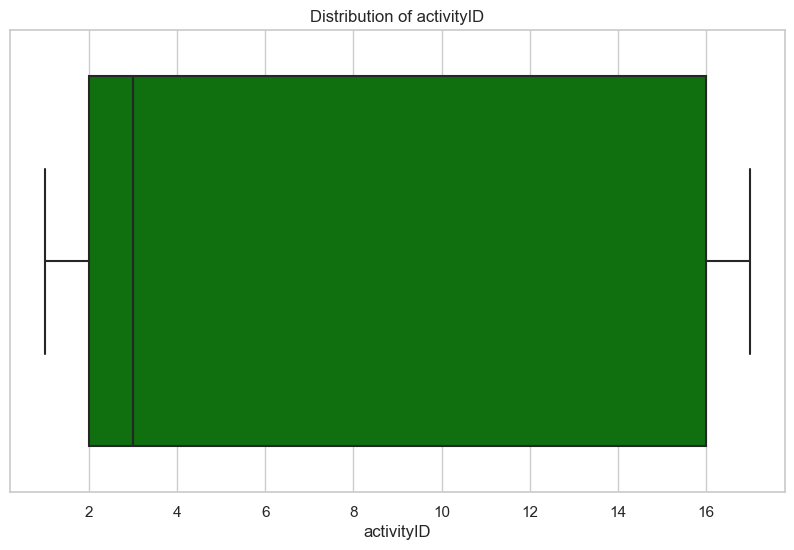

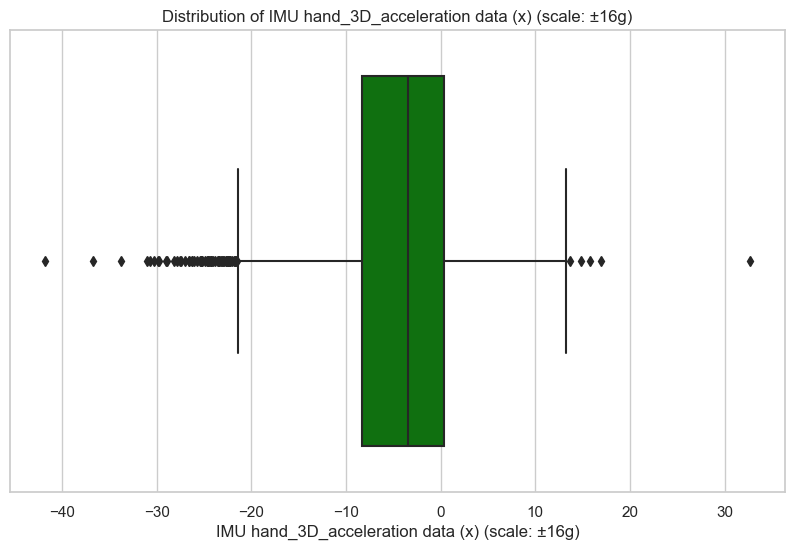

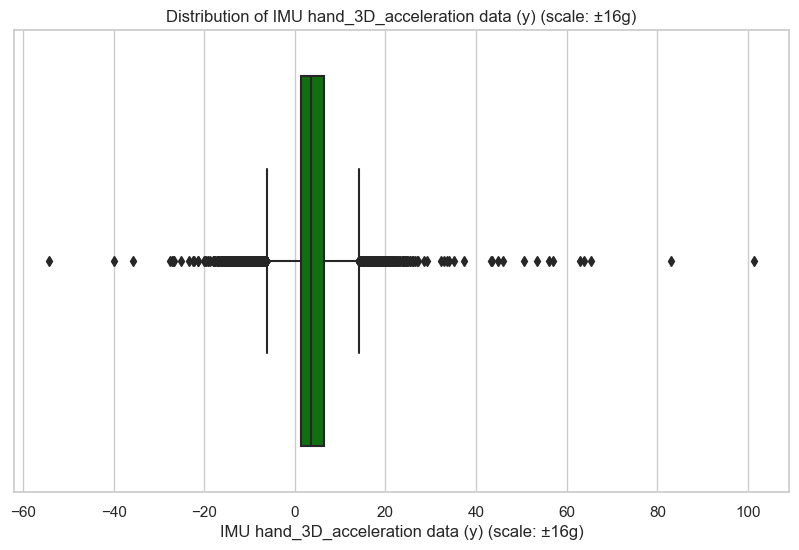

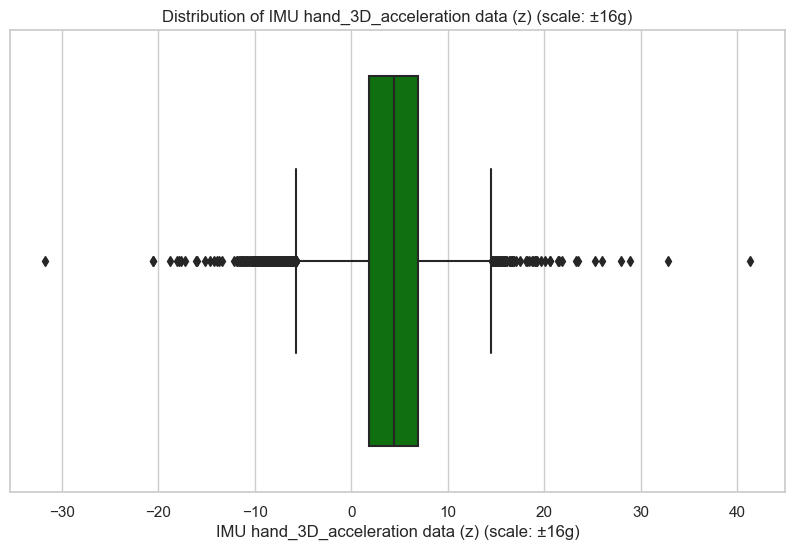

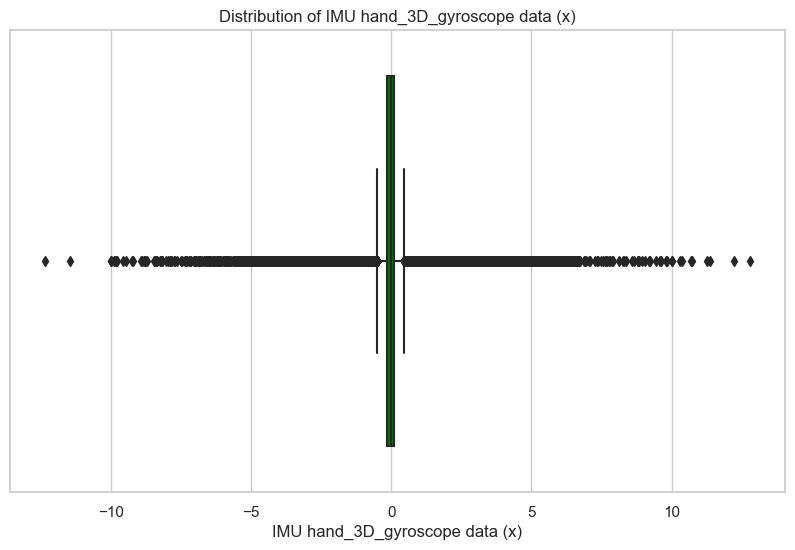

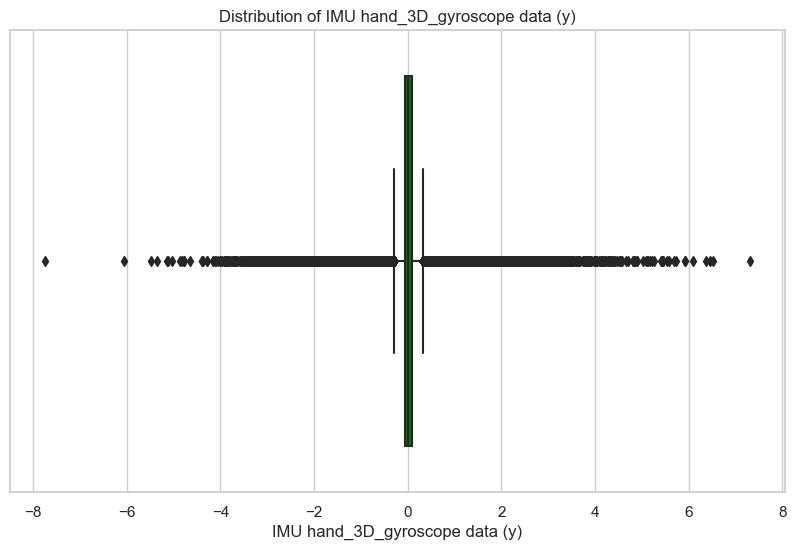

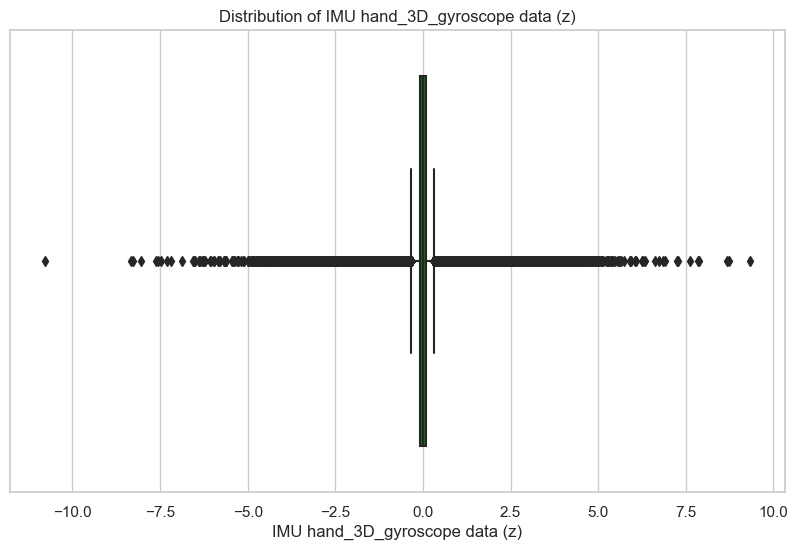

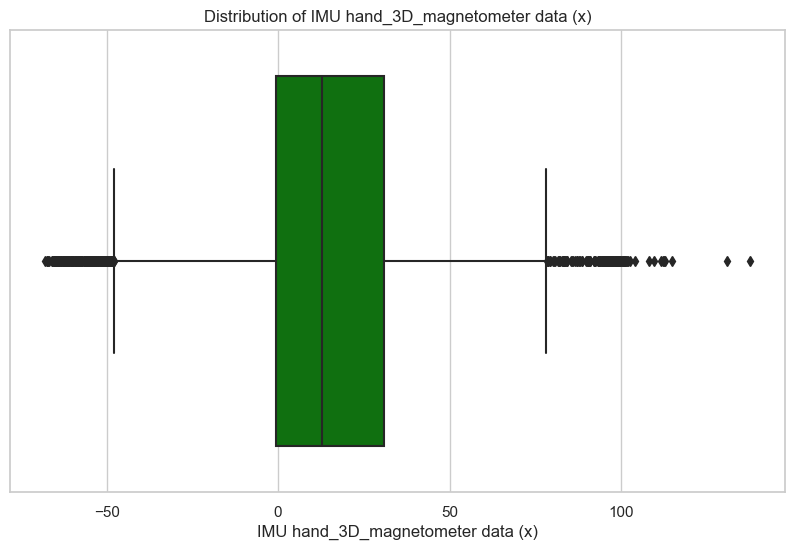

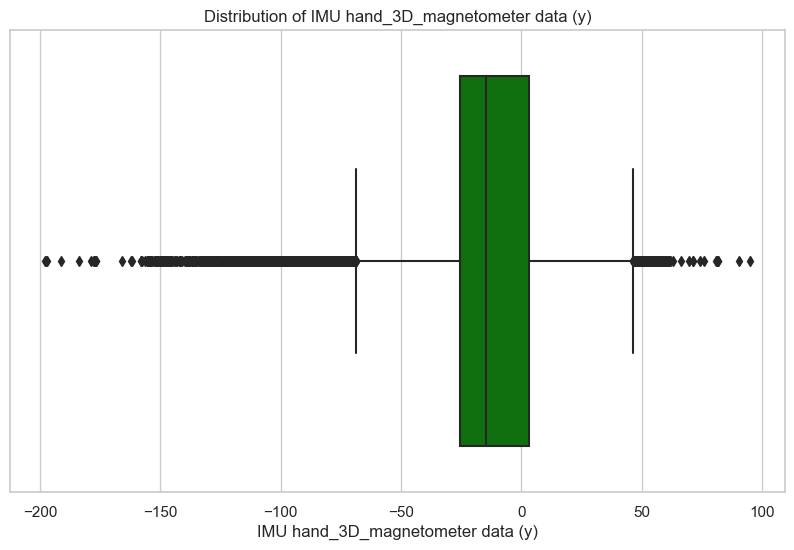

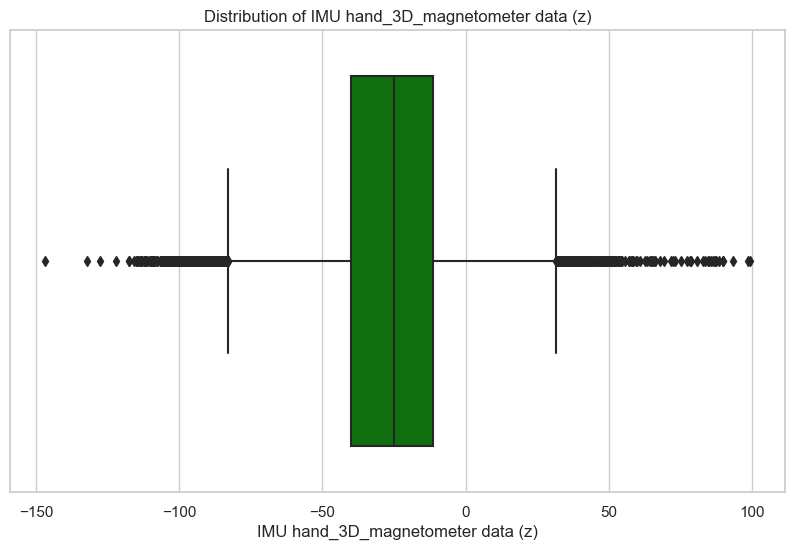

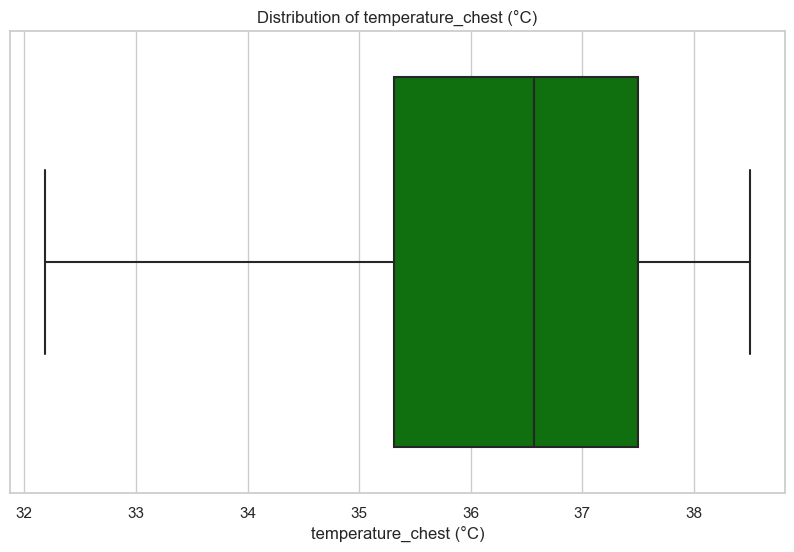

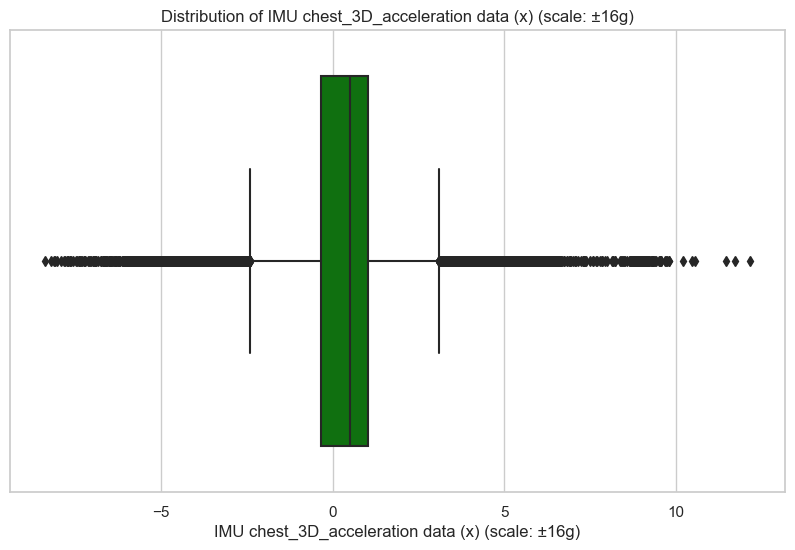

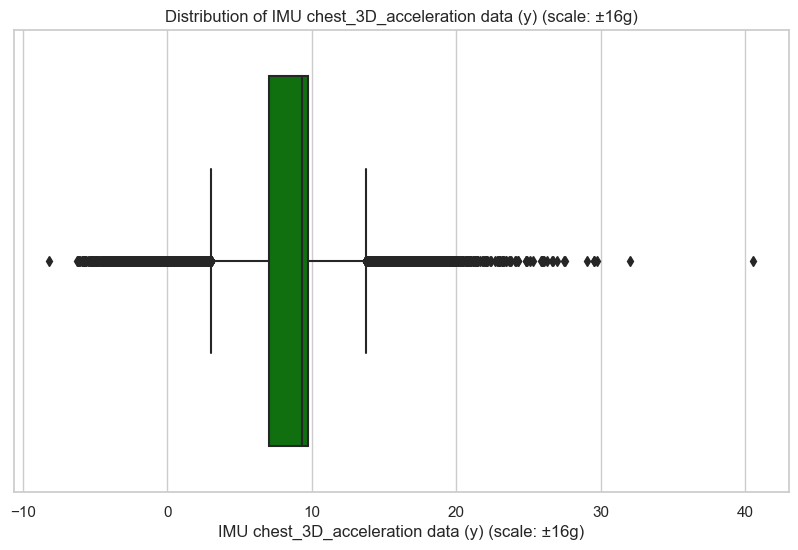

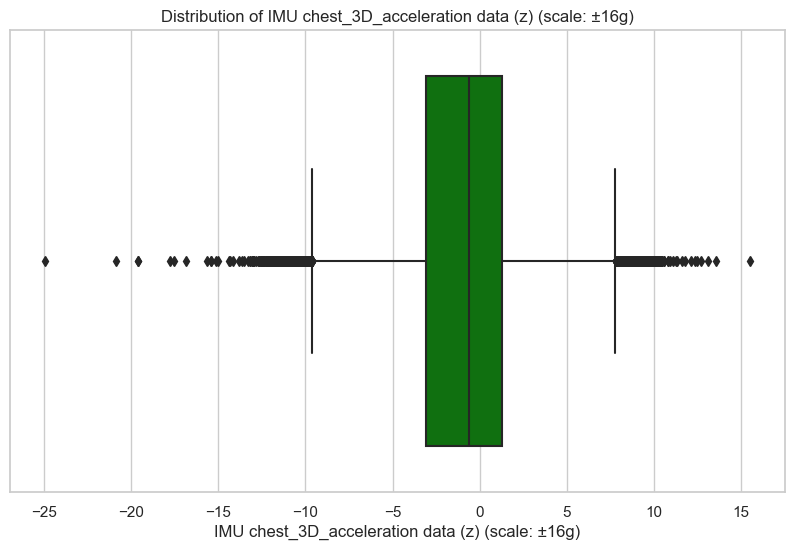

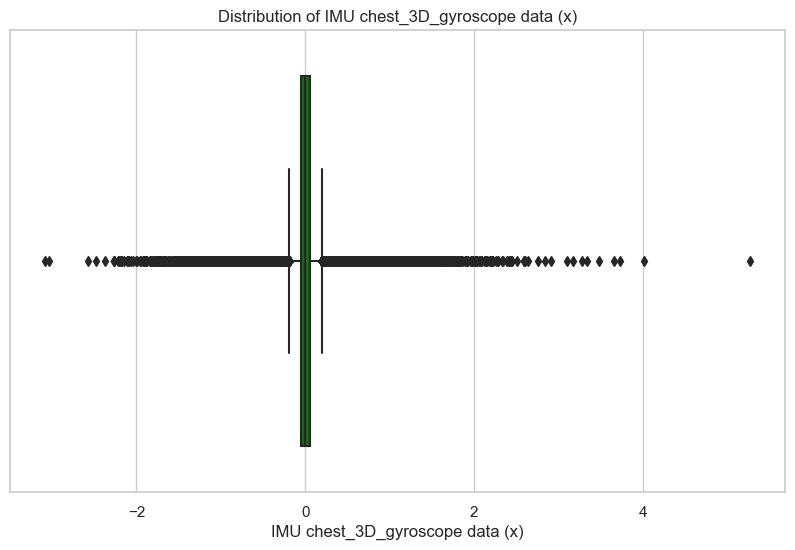

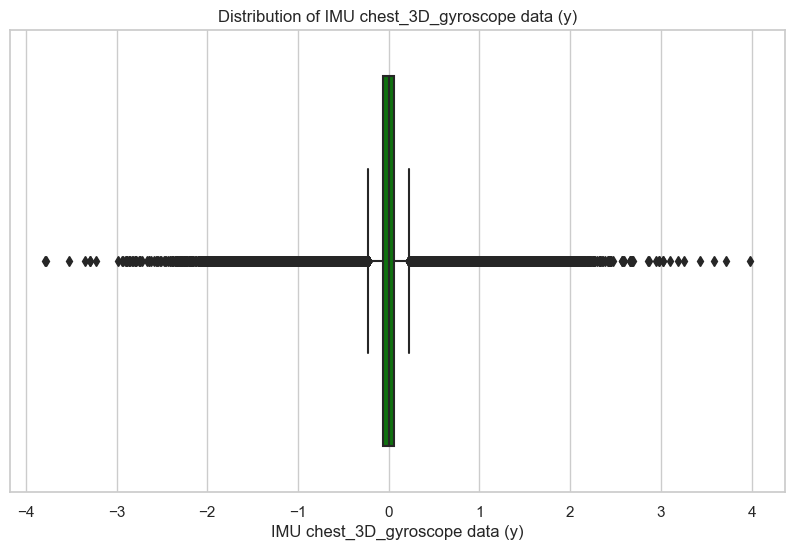

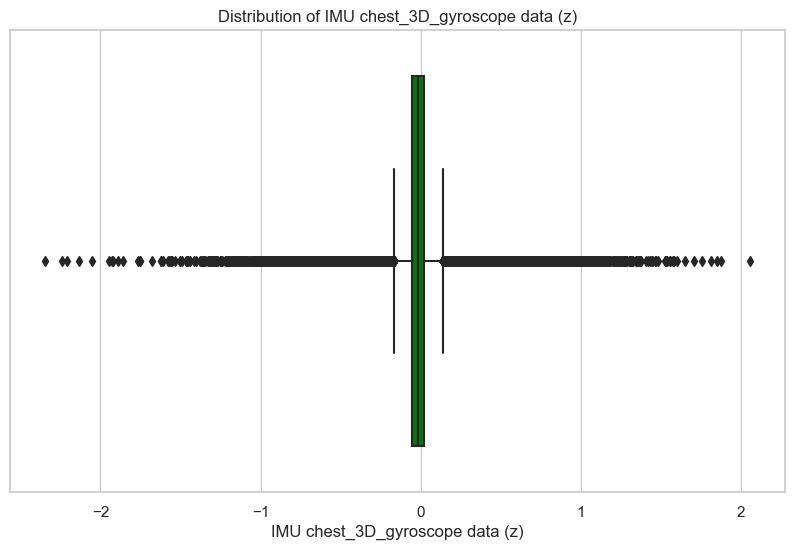

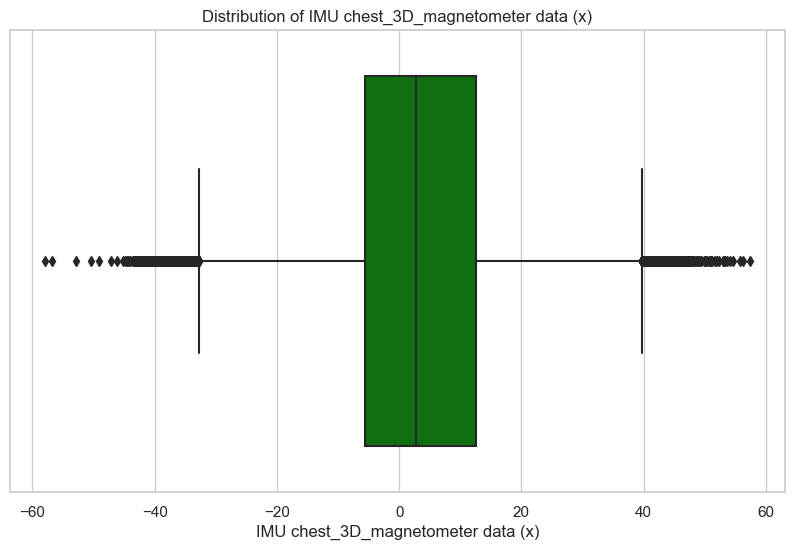

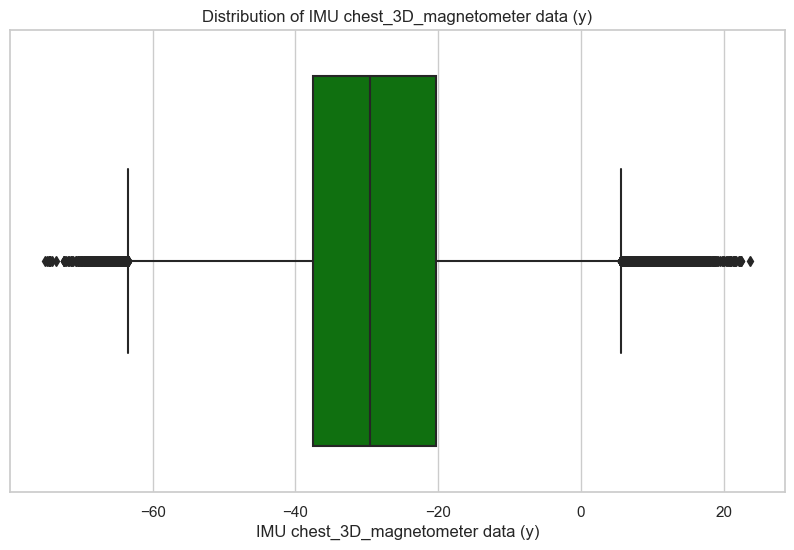

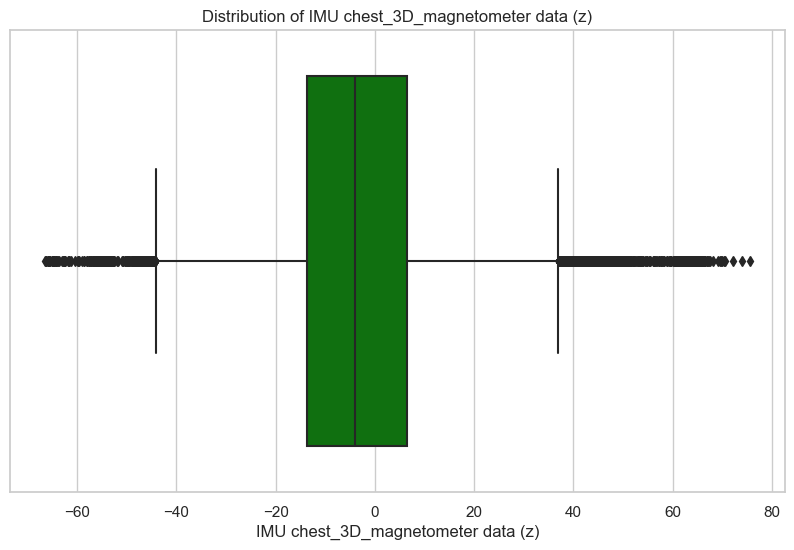

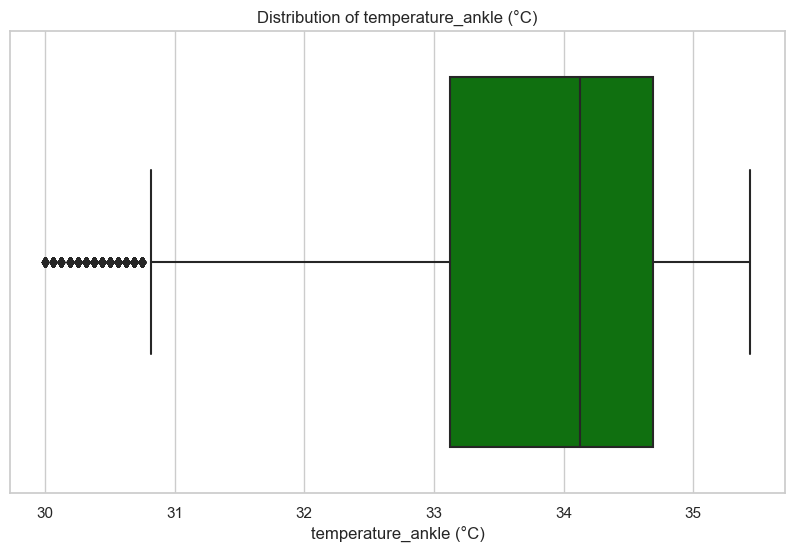

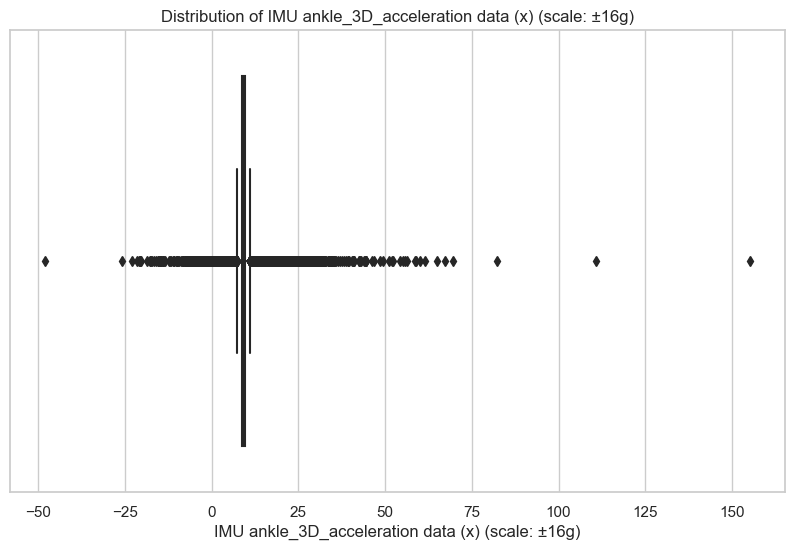

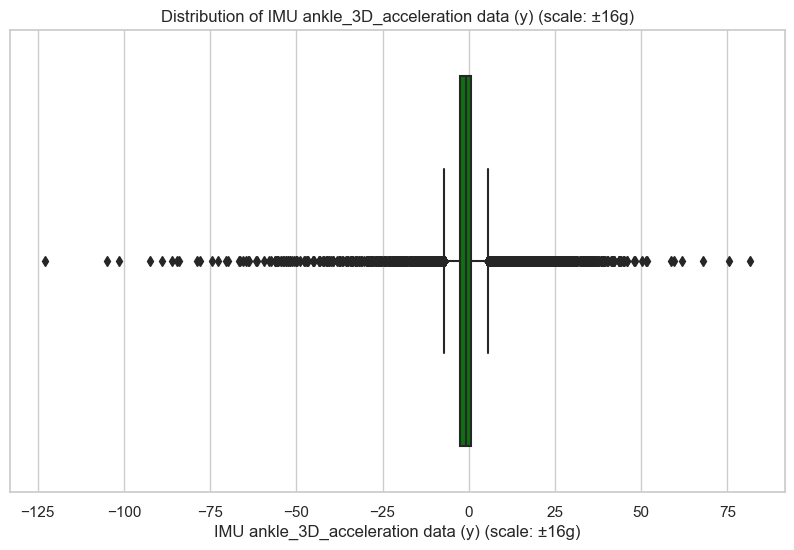

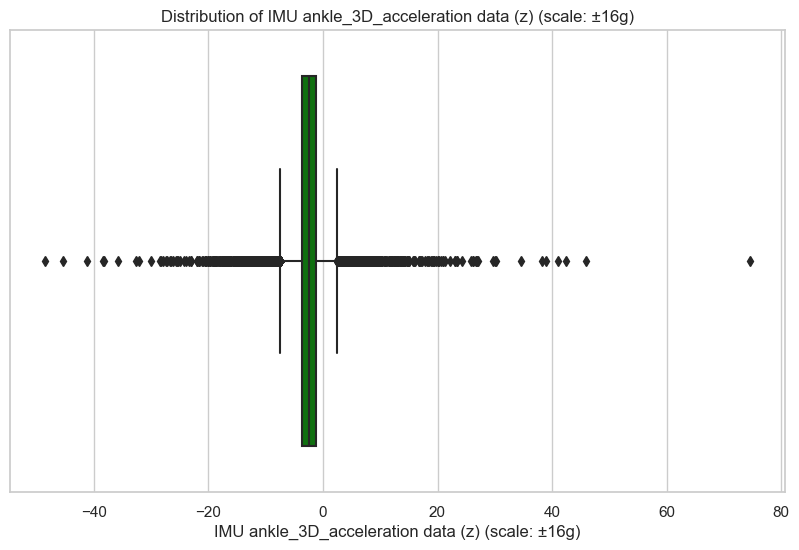

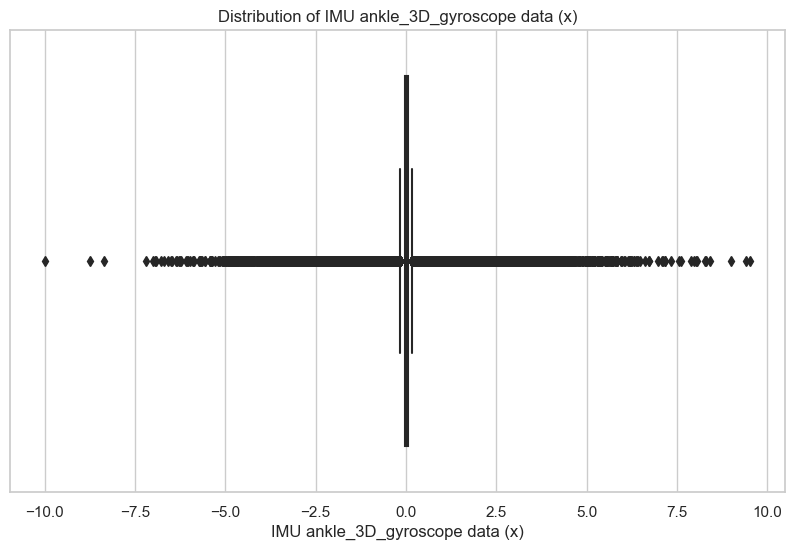

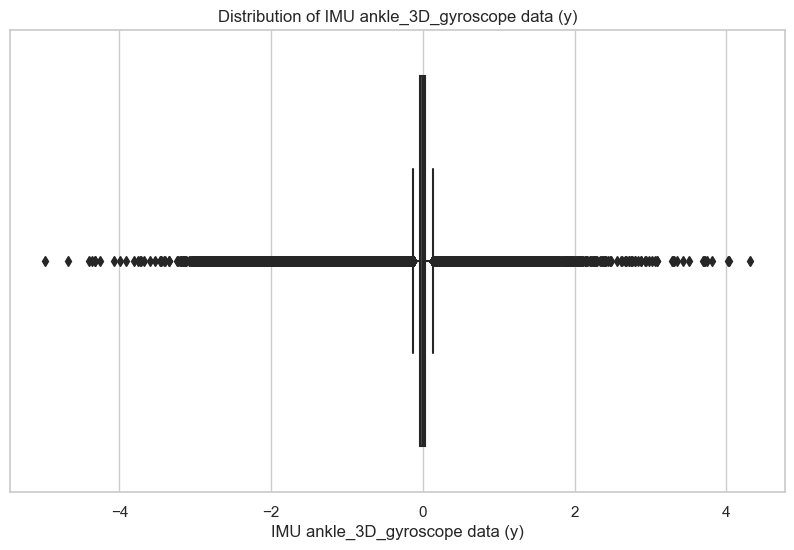

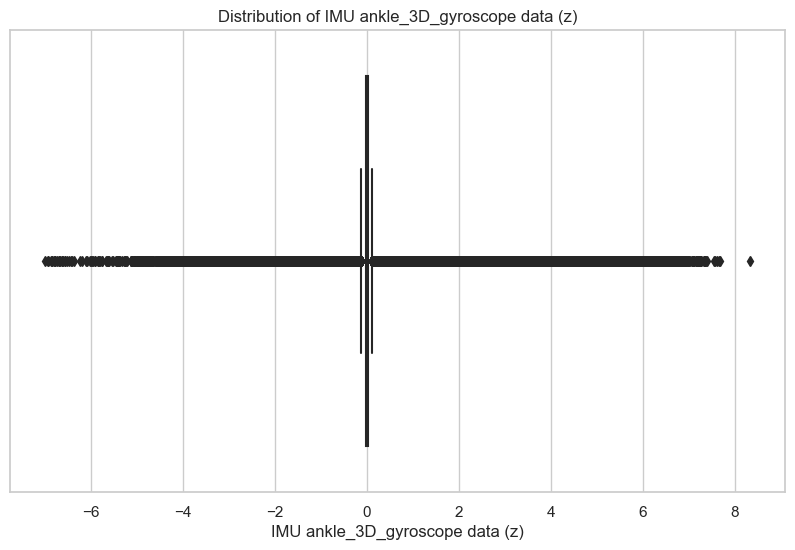

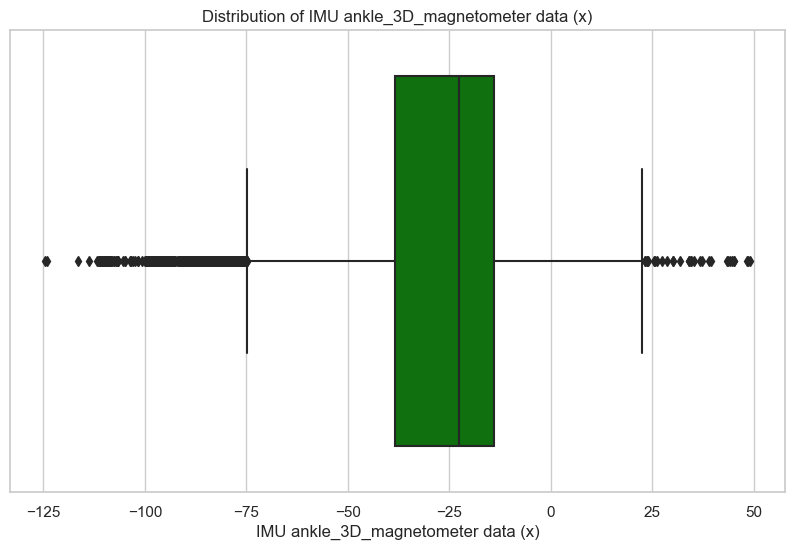

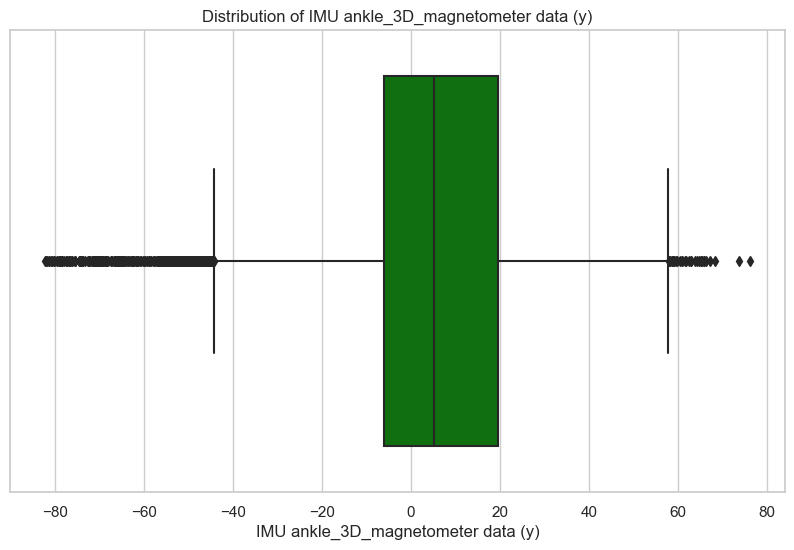

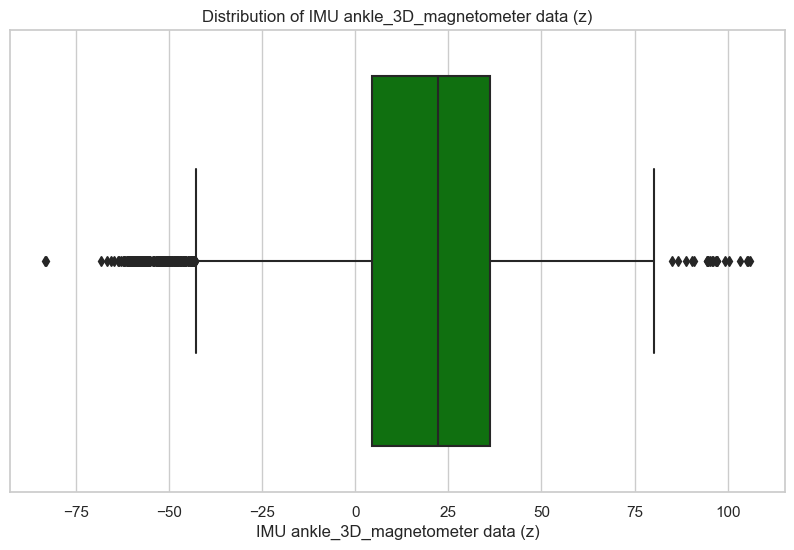

In [36]:
cols = combined_data.columns
hist_plots = ["heart rate (bpm)","timestamp (s)"]
for col in hist_plots:
    box_hist_plot(df,col)
bar_plots = [c for c in cols if (c not in hist_plots) and (c != "IMU hand_3D_acceleration data (x)") and (c != "temperature_hand (°C)")]
for col in bar_plots:
    box_hist_plot(df,col,hist=False)

/Users/vuongducthang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


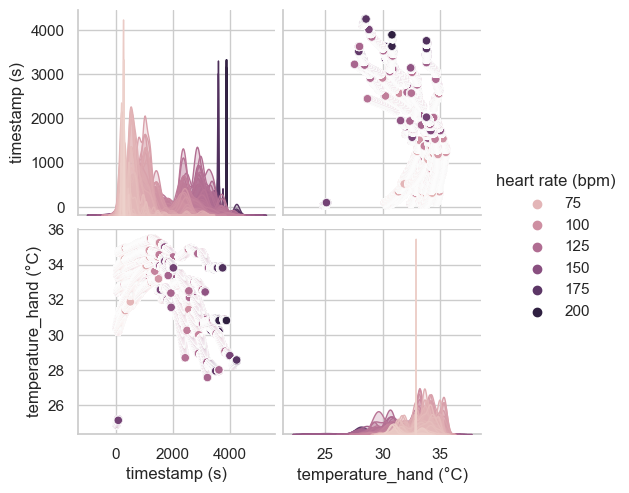

In [37]:
sns.pairplot(data=combined_data[combined_data["activityID"] != 0],hue="heart rate (bpm)",vars=["timestamp (s)","temperature_hand (°C)"])

### Kolmogorov & Chi2

In [38]:
def hypothesis_statement(p_value, alpha):
    c = 100.0*alpha
    if p_value < alpha:
        return f"We reject the Null Hypothesis in favour of the Alternative Hypothesis at the {c}% level, p-value = {p_value}", False
    else:
        return f"We accept the Null Hypothesis at the {c}% level, p-value = {p_value}", True

In [39]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ks_2samp, chi2_contingency
not_same_c = [] 
same_d = [] 

for col in hist_plots:
    values_1 = heart_rate_combined_data[heart_rate_combined_data[col].notna()][col].values
    values_2 = low_heart_rate[low_heart_rate[col].notna()][col].values
    
    _, p_value = ks_2samp(values_1, values_2)
    
    print(f"Null hypothesis: the distribution of high and low heart rate are the same for the {col} feature.")
    txt, res = hypothesis_statement(p_value, alpha)
    print(f"Kolmogorov Smirnov test. {txt}")
    print("\n")
    
    if res:
        same_c.append(col)
    else:
        not_same_c.append(col)

for col in bar_plots:
    groups = combined_data[combined_data["activityID"] != 0].groupby("activityID")["timestamp (s)"]
    p_values = [chi2_contingency(pd.crosstab(group, columns="count"))[1] for _, group in groups]

    for idx, p_value_chi2 in enumerate(p_values):
        print(f"Null hypothesis: the distribution of high and low heart rate are the same for the {col} feature and activityID={idx + 1}.")
        txt, res_chi2 = hypothesis_statement(p_value_chi2, alpha)
        print(f"Chi-squared contingency test. {txt}")
        print("\n")

        if res_chi2:
            same_d.append((col, idx + 1))
        else:
            not_same_d.append((col, idx + 1))

Null hypothesis: the distribution of high and low heart rate are the same for the heart rate (bpm) feature.
Kolmogorov Smirnov test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of high and low heart rate are the same for the timestamp (s) feature.
Kolmogorov Smirnov test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of high and low heart rate are the same for the activityID feature and activityID=1.
Chi-squared contingency test. We accept the Null Hypothesis at the 1.0% level, p-value = 1.0


Null hypothesis: the distribution of high and low heart rate are the same for the activityID feature and activityID=2.
Chi-squared contingency test. We accept the Null Hypothesis at the 1.0% level, p-value = 1.0


Null hypothesis: the distribution of high and low heart rate are the same for the activityID featur

I performed the Kolmogorov-Smirnov statistical test and the Chi-squared contingency test to compare the distribution between high and low heart rate for the resulting features as above.

All Chi-squared contingency tests for columns with activityIDs from 1 to 24 show that the p-value is 1.0. This means accepting the Null Hypothesis, that is, the distribution between high and low heart rates is the same for each respective activityID. With the null hypothesis not rejected, there is not enough statistical evidence to confirm the difference in the distribution of heart rate according to each specific activity.

There is a significant difference in the distribution between “high” and “low” heart rate for some characteristics, while for some other characteristics, there is no significant difference.

### D'Agostino's Ksquared test and Lilliefors

In [40]:
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors

def check_gaussian(values, alpha):
    
    _,p_value_n = normaltest(values)
    
    txt, res_n = hypothesis_statement(p_value_n, alpha)
    if not res_n:
        print(f"Ksquared test: {txt}")
    
    _,p_value_lf = lilliefors(values,dist="norm")
    
    txt, res_lf = hypothesis_statement(p_value_lf, alpha)
    print(f"Lilliefors test: {txt}")
    
    if (not res_n) or (not res_lf):
        return False
    
    return True

In [41]:
norm_col = []
not_norm_col = []
not_same_d = []
alpha = 0.01 

for col in not_same_c:
    values_1 = heart_rate_combined_data[col].dropna().values
    print(f"Null hypothesis: the distribution of high heart rate for the {col} feature is Gaussian")
    male_res = check_gaussian(values_1, alpha)
    print("\n")
    
    values_2 = low_heart_rate[col].dropna().values
    print(f"Null hypothesis: the distribution of low heart rate for the {col} feature is Gaussian")
    female_res = check_gaussian(values_2, alpha)
    print("\n")
    
    if male_res and female_res:
        norm_col.append(col)
    else:
        not_norm_col.append(col)

not_norm_col.extend(not_same_d)

Null hypothesis: the distribution of high heart rate for the heart rate (bpm) feature is Gaussian
Ksquared test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0
Lilliefors test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0009999999999998899


Null hypothesis: the distribution of low heart rate for the heart rate (bpm) feature is Gaussian
Ksquared test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0
Lilliefors test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0009999999999998899


Null hypothesis: the distribution of high heart rate for the timestamp (s) feature is Gaussian
Ksquared test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0
Lilliefors test: We reject the Null Hypothesis in favour of the Alternative 

The KSquared and Lilliefors tests were performed to evaluate whether the distribution of high and low heart rates (using the heart rate (bpm) feature) as well as timestamp(s) follow a Gaussian distribution. The results show that all have very low p-values (close to 0), leading to rejecting the null hypothesis and accepting the alternative hypothesis. This indicates that the distribution of high and low heart rate as well as timestamp does not follow a Gaussian distribution.

Rejecting this hypothesis (Null Hypothesis) gives us a basis to believe that the distribution of these characteristics is independent from the Gaussian distribution.

So I will continue to use Bootstrap for analysis

### Bootstrap difference of two means

In [42]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=5000,tail="two"):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se
    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)
    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m
    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)])    
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        if tail == "two":
            if np.abs(bs_t_stat) >= np.abs(t_stat):
                count += 1
        elif tail == "less":
            if bs_t_stat <= t_stat:
                count += 1
        elif tail == "greater":
            if bs_t_stat >= t_stat:
                count += 1
    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)

In [43]:
alpha = 0.01 
for col in not_norm_col:
    values_1 = heart_rate_combined_data[heart_rate_combined_data[col].notna()][col].values
    values_2 = low_heart_rate[low_heart_rate[col].notna()][col].values
    
    if np.mean(values_1) - np.mean(values_2) < 0:
        tail = "less"
    else:
        tail = "greater"
    
    dbar, _, p_value_bs = bootstrap_diff_means(values_1, values_2, tail=tail)
    
    print(f"Null hypothesis: the average {col} for heart rate is the same as for low heart rate. Alternative hypothesis: the average {col} for heart rate is {tail} than for low heart rate")
    txt, res = hypothesis_statement(p_value_bs, alpha)
    print(f"Bootstrap. {txt}")
    if res:
        print(f"That is, there is no significant evidence to state that the average {col} for heart rate is {tail} than for low heart rate at the {100.0*alpha}% level")
    else:
        print(f"That is, there is significant evidence to state that the average {col} for heart rate is {tail} than for low heart rate at the {100.0*alpha}% level")
    print("\n")

Null hypothesis: the average heart rate (bpm) for heart rate is the same as for low heart rate. Alternative hypothesis: the average heart rate (bpm) for heart rate is greater than for low heart rate
Bootstrap. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0001999600079984003
That is, there is significant evidence to state that the average heart rate (bpm) for heart rate is greater than for low heart rate at the 1.0% level


Null hypothesis: the average timestamp (s) for heart rate is the same as for low heart rate. Alternative hypothesis: the average timestamp (s) for heart rate is greater than for low heart rate
Bootstrap. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0001999600079984003
That is, there is significant evidence to state that the average timestamp (s) for heart rate is greater than for low heart rate at the 1.0% level




Bootstrap results show significant mean differences between "heart rate" and "low heart rate" for many features such as "heart rate (bpm)", "timestamp(s)", and other IMU sensor data. All hypotheses that the mean values are the same were rejected at the 1.0% significance level.

Based on statistical tests, we have the following conclusions about the correlation between "heart rate (bpm)" and other variables:

The Null Hypothesis for heart rate and timestamp(s) is that the average between high and low heart rates is the same. The alternative hypothesis is that average heart rate is greater than average low heart rate.

The results show that the p-value is very low (0.0001999600079984003), leading to rejecting the null hypothesis and accepting the alternative hypothesis. This means that there is substantial evidence to confirm that average heart rate (bpm) and timestamp(s) for heart rate are both greater than average low heart rate.

This conclusion is confirmed at the 1.0% significance level. This can be interpreted as the average difference between heart rate and low heart rate being significant and statistically significant, based on the Bootstrap method using the data sample.

# Curve Fitting and Predictions

The goal of Curve Fitting and Predictions is to use fitting curves to predict "timestamp(s)" values based on "heart rate (bpm)" values in the future or when new heart rate values become available. Specifically, these lines of code support the study and modeling of the relationship between heart rate (bpm) and timestamp (s) in data.

In [44]:
def f1(x,c0,c1,c2):
    return c0*np.exp(-c1*(x-c2))

def f2(x,c0,c1,c2):
    return c0 + c1 * x + c2 * (x**2.0) 

def f3(x,c0,c1,c2,c3):
    return c0 + c1 * x + c2 * (x**2.0) + c3 * (x**3.0)

I use these functions to estimate and evaluate the complex relationship between heart rate (bpm) and timestamp(s) in graphical and forecasting analytics.

In [45]:
def sum_square_residual(theta,y,x,f):
    fi = f(x,*theta)
    return np.sum((y - fi)**2.0)

In [46]:
def least_squares_AIC(k, n, eps):
    return 2.0*k + n * np.log(2.0*np.pi*(eps ** 2.0)) + n

def calc_AIC(residuals,popt):
    RSS = np.sum(residuals**2.0)
    n = len(residuals)
    eps = RSS/n
    k = len(popt)
    return least_squares_AIC(k,n,eps)

In [47]:
from scipy.optimize import curve_fit

def bootstrap_prediction_interval(predictor, x_samples, y_samples, f, n_bootstraps=1000, alpha=0.05):
    bootstrap_response = np.zeros(n_bootstraps)
    bootstrap_residuals = []
    for idx in range(n_bootstraps):
        bootstrap_idx = np.random.randint(0,len(x_samples),len(x_samples))
        not_bootstrap_idx = np.array([i for i in range(len(x_samples)) if not (i in bootstrap_idx)])
        x_bootstrap = x_samples[bootstrap_idx]
        y_bootstrap = y_samples[bootstrap_idx]
        x_not_bootstrap = x_samples[not_bootstrap_idx]
        y_not_bootstrap = y_samples[not_bootstrap_idx]
        
        bootstrap_opt, _ = curve_fit(f,x_bootstrap,y_bootstrap)
        bootstrap_response[idx] = f(predictor,*bootstrap_opt)
        bootstrap_residuals.append(y_not_bootstrap - f(x_not_bootstrap,*bootstrap_opt))
    
    bootstrap_residuals = np.concatenate(bootstrap_residuals)
    
    C = np.array([m + o for m in bootstrap_response for o in bootstrap_residuals])
    
    return bootstrap_response, np.percentile(C,100.0*alpha/2.0), np.percentile(C,100.0*(1.0 - alpha/2.0))

Text(0.5, 1.0, 'Scatterplot of combined_data')

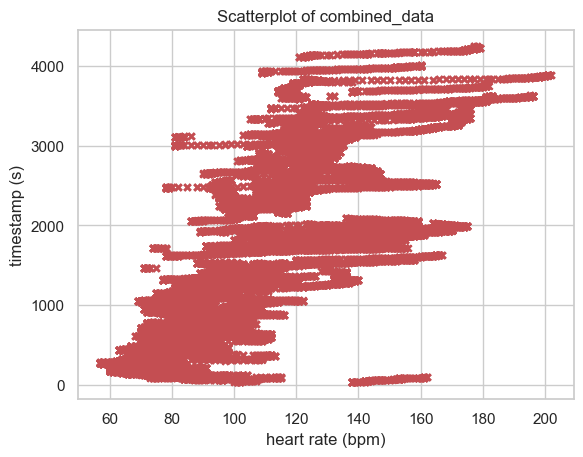

In [48]:
fig,ax = plt.subplots(nrows=1,ncols=1)
combined_data.plot(kind="scatter",x="heart rate (bpm)",y="timestamp (s)",color="r",marker="x",ax=ax)
ax.set_title("Scatterplot of combined_data")

- The graph shows a linear relationship between time and heart rate. This means that heart rate tends to increase or decrease steadily over time.
- The slope of the line indicates the rate of change in heart rate.
- This chart can be useful for monitoring a person's heart rate during a specific activity, such as exercise or sports competition. It can help us understand how activity affects heart rate and see how heart rate recovers after activity.

In [49]:
f1_popt,_ = curve_fit(f1,combined_data["heart rate (bpm)"],combined_data["timestamp (s)"])         
f2_popt,_ = curve_fit(f2,combined_data["heart rate (bpm)"],combined_data["timestamp (s)"])
f3_popt,_ = curve_fit(f3,combined_data["heart rate (bpm)"],combined_data["timestamp (s)"])

The above code uses the curve_fit function from the SciPy library to estimate the optimal parameters for the functions f1, f2, and f3. These functions are built to fit the data in the "activityID" and "heart rate (bpm)" columns of the combined_data DataFrame. Estimating this parameter helps build optimal models for the relationship between two variables, as a basis for data analysis and prediction.

In [50]:
f1_RSS = sum_square_residual(f1_popt,combined_data["heart rate (bpm)"],combined_data["timestamp (s)"],f1)
f2_RSS = sum_square_residual(f2_popt,combined_data["heart rate (bpm)"],combined_data["timestamp (s)"],f2)
f3_RSS = sum_square_residual(f3_popt,combined_data["heart rate (bpm)"],combined_data["timestamp (s)"],f3)

The code calculates the error sum of squares (RSS) for each estimated model (f1, f2, f3) based on the optimal parameters previously determined. RSS is a measure of model quality, representing the difference between the predicted value and the actual value. These RSS values can be used to compare the performance of different models.

This code uses curve_fit from scipy.optimize to estimate the parameters (a and b) for the linear model f1 based on x_data and y_data data. After estimation, a data comparison chart and a linear line are drawn. The original data is represented by dots, while the red line is the result of the estimation. The optimal results for a and b are printed to the screen. The code helps understand the relationship between two variables and provides a linear fit to the data.

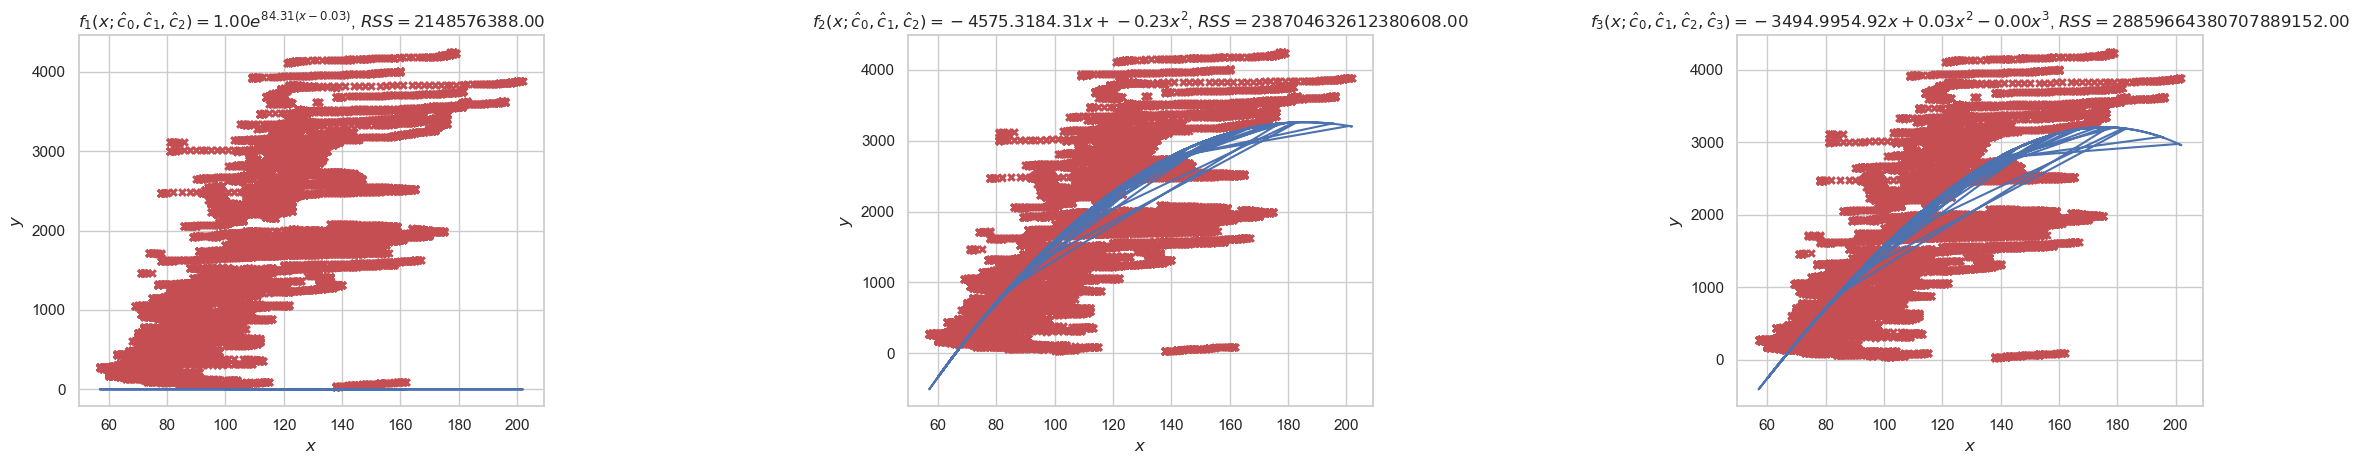

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3)

combined_data.plot(kind="scatter", x="heart rate (bpm)", y="timestamp (s)", color="r", marker="x", ax=axes[0])
axes[0].plot(combined_data["heart rate (bpm)"], f1(combined_data["heart rate (bpm)"], *f1_popt))
axes[0].set_title(rf"$f_1(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2) = {f1_popt[0]:.2f}  e^{{{f2_popt[1]:.2f}(x - {f3_popt[2]:.2f})}}$, $RSS = {f1_RSS:.2f}$")

combined_data.plot(kind="scatter", x="heart rate (bpm)", y="timestamp (s)", color="r", marker="x", ax=axes[1])
axes[1].plot(combined_data["heart rate (bpm)"], f2(combined_data["heart rate (bpm)"], *f2_popt))
axes[1].set_title(rf"$f_2(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2) = {f2_popt[0]:.2f} {f2_popt[1]:.2f} x + {f2_popt[2]:.2f} x^2$, $RSS = {f2_RSS:.2f}$")

combined_data.plot(kind="scatter", x="heart rate (bpm)", y="timestamp (s)", color="r", marker="x", ax=axes[2])
axes[2].plot(combined_data["heart rate (bpm)"], f3(combined_data["heart rate (bpm)"], *f3_popt))
axes[2].set_title(rf"$f_3(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2, \hat{{c}}_3) = {f3_popt[0]:.2f} {f3_popt[1]:.2f} x + {f3_popt[2]:.2f} x^2 {f3_popt[3]:.2f} x^3$, $RSS = {f3_RSS:.2f}$")

for ax in axes:
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")

plt.subplots_adjust(top=0.8)
plt.tight_layout()
fig.set_figwidth(fig.get_figwidth() * 4.0)
plt.show()

Based on the chart, I will choose function 2 to analyze, because in figure 3 parameter 3 cannot explain the meaning of the model.

### K-Means Clustering and Gaussian Mixture Model

"Cluster" 0 : (57.0000, 102.1003)
"Cluster" 1 : (102.5853, 140.4114)
"Cluster" 2 : (140.8963, 202.0000)
Percentage of predictions that are correct: 9.899827918266874% (17374/175498)
Percentage of 1.0 predictions that are correct: 97.17211948790896% (17078/17575)
Percentage of 2.0 predictions that are correct: 1.7534506249629762% (296/16881)
Percentage of 3.0 predictions that are correct: 0.0% (0/17256)
Percentage of 4.0 predictions that are correct: 0.0% (0/20998)
Percentage of 5.0 predictions that are correct: 0.0% (0/8665)
Percentage of 6.0 predictions that are correct: 0.0% (0/14933)
Percentage of 7.0 predictions that are correct: 0.0% (0/16857)
Percentage of 12.0 predictions that are correct: 0.0% (0/10699)
Percentage of 13.0 predictions that are correct: 0.0% (0/9585)
Percentage of 16.0 predictions that are correct: 0.0% (0/15997)
Percentage of 17.0 predictions that are correct: 0.0% (0/21696)
Percentage of 24.0 predictions that are correct: 0.0% (0/4356)


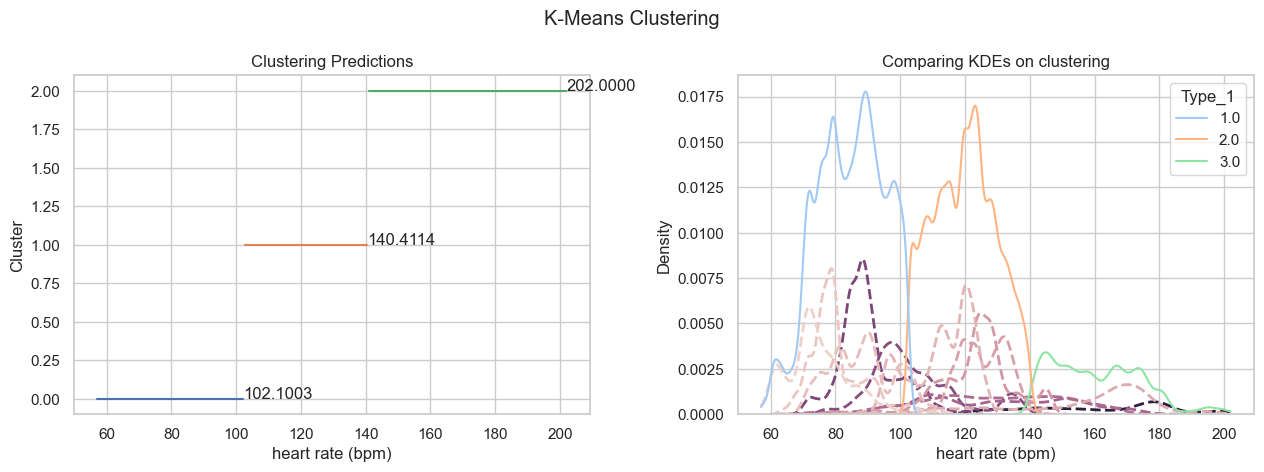

In [52]:
from sklearn.cluster import KMeans

col = "heart rate (bpm)"

data = combined_data[col].to_numpy()
data_skl = data.reshape(-1,1)
x = np.linspace(combined_data[col].min(), combined_data[col].max(), 300)
types = pd.unique(combined_data.activityID)
types = np.sort(types)

kmeans = KMeans(n_clusters=3).fit(data_skl)

sort_idx = np.argsort(kmeans.cluster_centers_.flatten(), axis=0)
kmeans.cluster_centers_ = kmeans.cluster_centers_[sort_idx]
cluster_predict = kmeans.predict(x.reshape(-1,1))

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)

clusters = []
for c in range(3):
    cluster_x = [xi if v == c else np.nan for (xi, v) in zip(x, cluster_predict)]
    cl_min = np.nanmin(cluster_x)
    cl_max = np.nanmax(cluster_x)
    clusters.append([cl_min, cl_max])
    axes[0].plot(cluster_x, np.ones(len(cluster_x)) * c)
    axes[0].annotate(f"{cl_max:.4f}", (cl_max + 0.05, c))

combined_data["Type_1"] = types[kmeans.predict(data_skl)]

sns.kdeplot(data=combined_data, x=col, hue="activityID", ls="--", lw=2, clip=(x[0], x[-1]), ax=axes[1])
sns.kdeplot(data=combined_data, x=col, hue="Type_1", palette="pastel", clip=(x[0], x[-1]), ax=axes[1])

axes[0].set_xlabel(col)
axes[0].set_ylabel("Cluster")
axes[0].set_title(f"Clustering Predictions")
axes[1].set_title(f"Comparing KDEs on clustering")

fig.suptitle("K-Means Clustering")

fig.set_figwidth(fig.get_figwidth() * 2.0)

for idx, cluster in enumerate(clusters):
    print(f"\"Cluster\" {idx} : ({cluster[0]:.4f}, {cluster[1]:.4f})")

num = sum(combined_data['activityID'] == combined_data['Type_1'])
tot = len(combined_data)
val = 100.0 * num / tot if tot != 0 else 0
print(f"Percentage of predictions that are correct: {val}% ({num}/{tot})")

for t in types:
    num = sum((combined_data['activityID'] == t) & (combined_data['Type_1'] == t))
    tot = sum(combined_data["activityID"] == t)
    val = 100.0 * num / tot if tot != 0 else 0
    print(f"Percentage of {t} predictions that are correct: {val}% ({num}/{tot})")
plt.tight_layout()
plt.show()

Clustering results show that clusters formed based on the "heart rate (bpm)" variable are ineffective. Clustering results using K-Means showed three clusters with definite limits. However, the overall prediction accuracy rate was only 9.89%. Specifically, cluster 1 has the highest accuracy rate of 97.17%, while other clusters are lower.

### Gaussian Mixture Model in one-dimension

"Cluster" 0 : (57.0000, 102.5853)
"Cluster" 1 : (103.0702, 142.8361)
"Cluster" 2 : (143.3211, 202.0000)
Percentage of predictions that are correct: 9.971053801182919% (17499/175498)
Percentage of 1.0 predictions that are correct: 98.0199146514936% (17227/17575)
Percentage of 2.0 predictions that are correct: 1.6112789526686808% (272/16881)
Percentage of 3.0 predictions that are correct: 0.0% (0/17256)
Percentage of 4.0 predictions that are correct: 0.0% (0/20998)
Percentage of 5.0 predictions that are correct: 0.0% (0/8665)
Percentage of 6.0 predictions that are correct: 0.0% (0/14933)
Percentage of 7.0 predictions that are correct: 0.0% (0/16857)
Percentage of 12.0 predictions that are correct: 0.0% (0/10699)
Percentage of 13.0 predictions that are correct: 0.0% (0/9585)
Percentage of 16.0 predictions that are correct: 0.0% (0/15997)
Percentage of 17.0 predictions that are correct: 0.0% (0/21696)
Percentage of 24.0 predictions that are correct: 0.0% (0/4356)


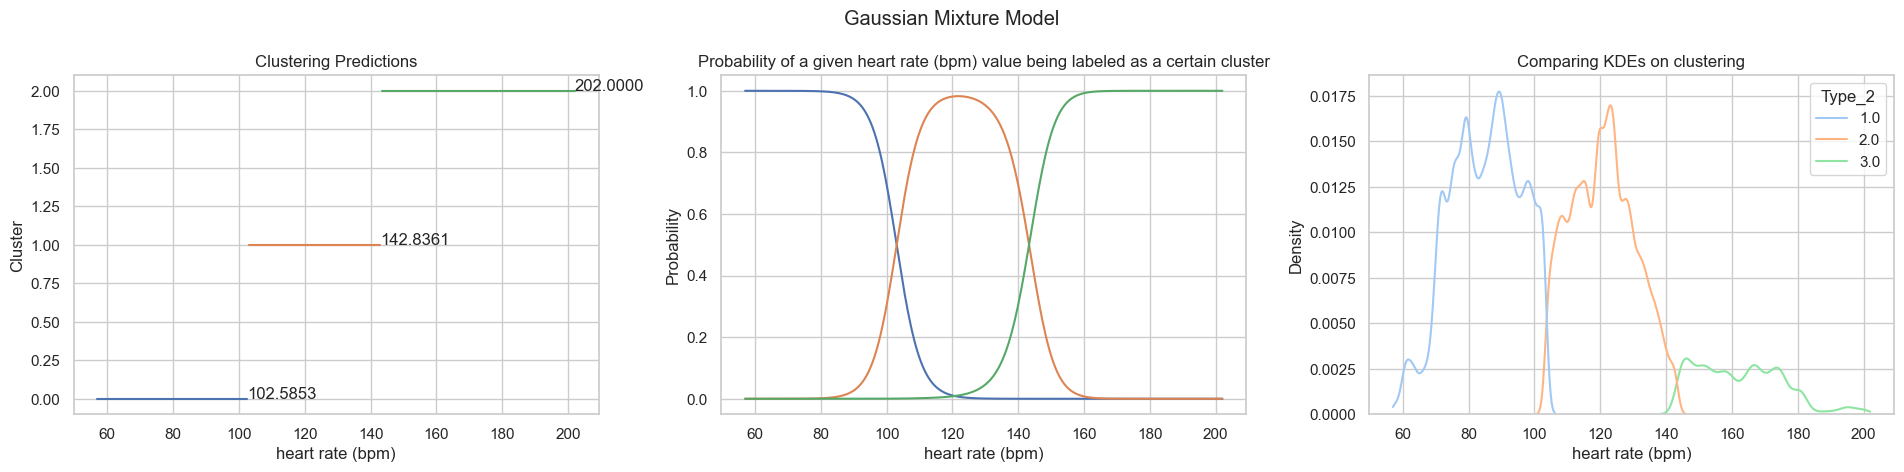

In [53]:
from sklearn.mixture import GaussianMixture

mixture = GaussianMixture(n_components=3, covariance_type="diag").fit(data_skl)

sort_idx = np.argsort(mixture.means_.flatten(), axis=0)
mixture.weights_ = mixture.weights_[sort_idx]
mixture.means_ = mixture.means_[sort_idx]
mixture.covariances_ = mixture.covariances_[sort_idx]

cluster_predict = mixture.predict(x.reshape(-1, 1))

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True)
clusters = []
for c in range(3):
    cluster_x = [xi if v == c else np.nan for (xi, v) in zip(x, cluster_predict)]
    cl_min = np.nanmin(cluster_x)
    cl_max = np.nanmax(cluster_x)
    clusters.append([cl_min, cl_max])
    axes[0].plot(cluster_x, np.ones(len(cluster_x)) * c)
    axes[0].annotate(f"{cl_max:.4f}", (cl_max + 0.05, c))

probs = mixture.predict_proba(x.reshape(-1, 1))
axes[1].plot(x, probs)

combined_data["Type_2"] = types[mixture.predict(data_skl)]

sns.kdeplot(data=combined_data, x=col, hue="Type_2", palette="pastel", clip=(x[0], x[-1]), ax=axes[2])

axes[0].set_xlabel(col)
axes[0].set_ylabel("Cluster")
axes[0].set_title(f"Clustering Predictions")
axes[1].set_xlabel(col)
axes[1].set_ylabel("Probability")
axes[1].set_title(f"Probability of a given {col} value being labeled as a certain cluster")
axes[2].set_title(f"Comparing KDEs on clustering")
fig.suptitle("Gaussian Mixture Model")

fig.set_figwidth(fig.get_figwidth() * 3.0)

for idx, cluster in enumerate(clusters):
    print(f"\"Cluster\" {idx} : ({cluster[0]:.4f}, {cluster[1]:.4f})")

num = sum(combined_data['activityID'] == combined_data['Type_2'])
tot = len(combined_data)
val = 100.0 * num / tot
print(f"Percentage of predictions that are correct: {val}% ({num}/{tot})")
for t in types:
    num = sum((combined_data['activityID'] == t) & (combined_data['Type_2'] == t))
    tot = sum(combined_data["activityID"] == t)
    val = 100.0 * num / tot
    print(f"Percentage of {t} predictions that are correct: {val}% ({num}/{tot})")
plt.tight_layout()
plt.show()

Like the same above chart. Clustering results show that clusters formed based on the "heart rate (bpm)" variable are ineffective. Clustering results using K-Means showed three clusters with definite limits. However, the overall prediction accuracy rate was only 9.99%. Specifically, cluster 1 has the highest accuracy rate of 98.29%, while other clusters are lower.

### K-Means in two-dimensions

Percentage of predictions that are correct: 9.822334157654218% (17238/175498)
Percentage of 1.0 predictions that are correct: 96.39829302987198% (16942/17575)
Percentage of 2.0 predictions that are correct: 1.7534506249629762% (296/16881)
Percentage of 3.0 predictions that are correct: 0.0% (0/17256)
Percentage of 4.0 predictions that are correct: 0.0% (0/20998)
Percentage of 5.0 predictions that are correct: 0.0% (0/8665)
Percentage of 6.0 predictions that are correct: 0.0% (0/14933)
Percentage of 7.0 predictions that are correct: 0.0% (0/16857)
Percentage of 12.0 predictions that are correct: 0.0% (0/10699)
Percentage of 13.0 predictions that are correct: 0.0% (0/9585)
Percentage of 16.0 predictions that are correct: 0.0% (0/15997)
Percentage of 17.0 predictions that are correct: 0.0% (0/21696)
Percentage of 24.0 predictions that are correct: 0.0% (0/4356)


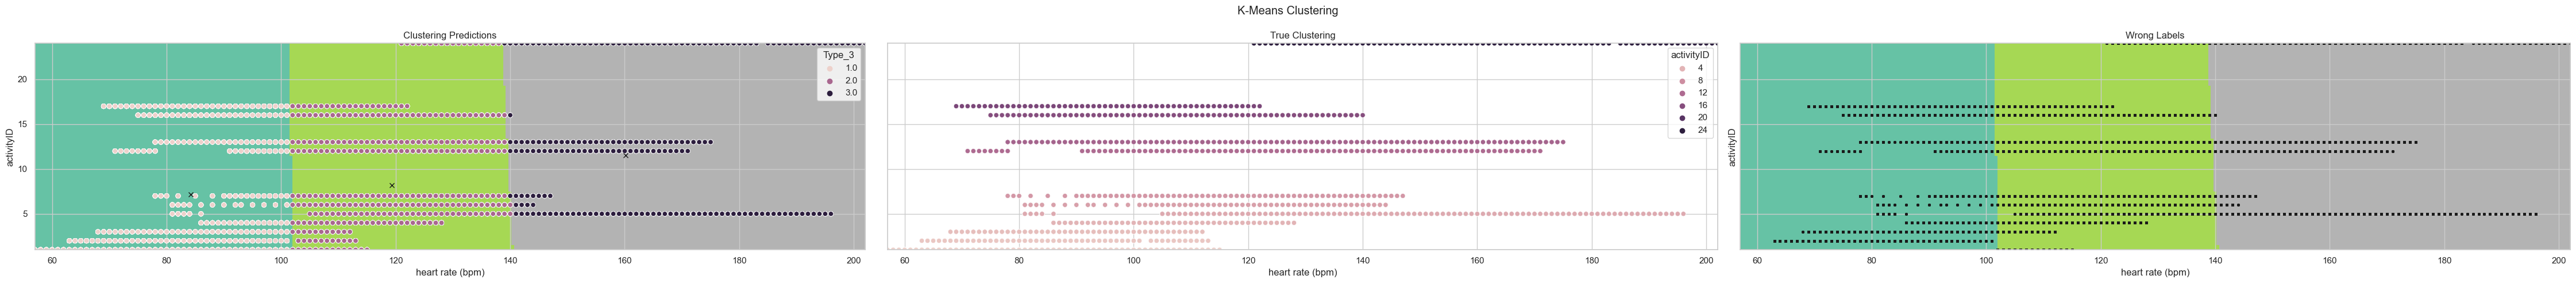

In [54]:
col1 = "heart rate (bpm)"
col2 = "activityID"
 
data_skl = combined_data[[col1, col2]].to_numpy()
x = np.linspace(np.floor(combined_data[col1].min()), np.ceil(combined_data[col1].max()), 300)
y = np.linspace(np.floor(combined_data[col2].min()), np.ceil(combined_data[col2].max()), 300)
xx, yy = np.meshgrid(x, y)

kmeans = KMeans(n_clusters=3).fit(data_skl)

sort_idx = np.argsort(kmeans.cluster_centers_[:, 0])
kmeans.cluster_centers_ = kmeans.cluster_centers_[sort_idx]
Z = kmeans.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))

combined_data["Type_3"] = types[kmeans.predict(data_skl)]
sns.scatterplot(data=combined_data, x=col1, y=col2, hue="Type_3", ax=axes[0])

for c in range(3):
    centre = kmeans.cluster_centers_[c]
    axes[0].plot(centre[0], centre[1], marker="x", color="k", linestyle="", markersize=6)

axes[0].imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap="Set2",
    aspect="auto",
    origin="lower",
)

sns.scatterplot(data=combined_data, x=col1, y=col2, hue="activityID", ax=axes[1])

for t in types:
    xcoords = combined_data[(combined_data['activityID'] == t) & (combined_data['Type_3'] != t)][col1].to_numpy()
    ycoords = combined_data[(combined_data['activityID'] == t) & (combined_data['Type_3'] != t)][col2].to_numpy()
    axes[2].scatter(xcoords, ycoords, color="k", s=6)

axes[2].imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap="Set2",
    aspect="auto",
    origin="lower",
)

axes[0].set_title("Clustering Predictions")
axes[1].set_title("True Clustering")
axes[2].set_xlabel(col1)
axes[2].set_ylabel(col2)
axes[2].set_title("Wrong Labels")

fig.suptitle("K-Means Clustering")

fig.set_figwidth(fig.get_figwidth() * 3.0)

num = sum(combined_data['activityID'] == combined_data['Type_3'])
tot = len(combined_data)
val = 100.0 * num / tot
print(f"Percentage of predictions that are correct: {val}% ({num}/{tot})")
for t in types:
    num = sum((combined_data['activityID'] == t) & (combined_data['Type_3'] == t))
    tot = sum(combined_data["activityID"] == t)
    val = 100.0 * num / tot
    print(f"Percentage of {t} predictions that are correct: {val}% ({num}/{tot})")
plt.tight_layout()
plt.show()

The prediction results only have an overall accuracy rate of 9.82%. Cluster 1 has a significant accuracy rate of 96.39%, while all other clusters and labels have an accuracy rate of 0%. This poses a predictive challenge, and may require testing and improving the model to ensure greater efficiency and accuracy.

### Gaussian Mixture Model in two-dimensions

Percentage of predictions that are correct: 10.014359137995875% (17575/175498)
Percentage of 1.0 predictions that are correct: 100.0% (17575/17575)
Percentage of 2.0 predictions that are correct: 0.0% (0/16881)
Percentage of 3.0 predictions that are correct: 0.0% (0/17256)
Percentage of 4.0 predictions that are correct: 0.0% (0/20998)
Percentage of 5.0 predictions that are correct: 0.0% (0/8665)
Percentage of 6.0 predictions that are correct: 0.0% (0/14933)
Percentage of 7.0 predictions that are correct: 0.0% (0/16857)
Percentage of 12.0 predictions that are correct: 0.0% (0/10699)
Percentage of 13.0 predictions that are correct: 0.0% (0/9585)
Percentage of 16.0 predictions that are correct: 0.0% (0/15997)
Percentage of 17.0 predictions that are correct: 0.0% (0/21696)
Percentage of 24.0 predictions that are correct: 0.0% (0/4356)


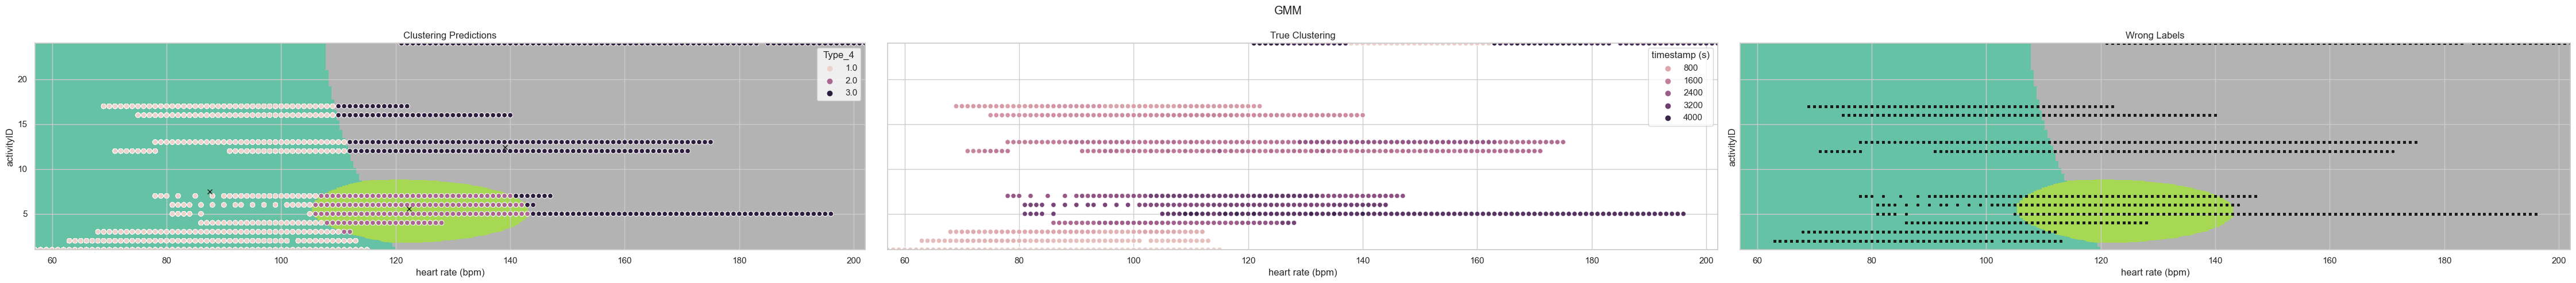

In [55]:
col1 = "heart rate (bpm)"
col2 = "activityID"

data_skl = combined_data[[col1, col2]].to_numpy()
x = np.linspace(np.floor(combined_data[col1].min()), np.ceil(combined_data[col1].max()), 300)
y = np.linspace(np.floor(combined_data[col2].min()), np.ceil(combined_data[col2].max()), 300)
xx, yy = np.meshgrid(x, y)

mixture = GaussianMixture(n_components=3, covariance_type="diag", random_state=5).fit(data_skl)

sort_idx = np.argsort(mixture.means_[:, 0], axis=0)
mixture.weights_ = mixture.weights_[sort_idx]
mixture.means_ = mixture.means_[sort_idx]
mixture.covariances_ = mixture.covariances_[sort_idx]
Z = mixture.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))

combined_data["Type_4"] = types[mixture.predict(data_skl)]
sns.scatterplot(data=combined_data, x=col1, y=col2, hue="Type_4", ax=axes[0])

for c in range(3):
    centre = mixture.means_[c]
    axes[0].plot(centre[0], centre[1], marker="x", color="k", linestyle="", markersize=6)

axes[0].imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap="Set2",
    aspect="auto",
    origin="lower",
)

sns.scatterplot(data=combined_data, x=col1, y=col2, hue="timestamp (s)", ax=axes[1])

for t in types:
    xcoords = combined_data[(combined_data['activityID'] == t) & (combined_data['Type_4'] != t)][col1].to_numpy()
    ycoords = combined_data[(combined_data['activityID'] == t) & (combined_data['Type_4'] != t)][col2].to_numpy()
    axes[2].scatter(xcoords, ycoords, color="k", s=6)

axes[2].imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap="Set2",
    aspect="auto",
    origin="lower",
)

axes[0].set_title("Clustering Predictions")
axes[1].set_title("True Clustering")
axes[2].set_xlabel(col1)
axes[2].set_ylabel(col2)
axes[2].set_title("Wrong Labels")

fig.suptitle("GMM")

fig.set_figwidth(fig.get_figwidth() * 3.0)

num = sum(combined_data['activityID'] == combined_data['Type_4'])
tot = len(combined_data)
val = 100.0 * num / tot
print(f"Percentage of predictions that are correct: {val}% ({num}/{tot})")
for t in types:
    num = sum((combined_data['activityID'] == t) & (combined_data['Type_4'] == t))
    tot = sum(combined_data["activityID"] == t)
    val = 100.0 * num / tot
    print(f"Percentage of {t} predictions that are correct: {val}% ({num}/{tot})")
plt.tight_layout()
plt.show()

The prediction results show an overall accuracy rate of 10.01%. The accuracy rate for other groups and overall is quite low except for prediction 1

# Principal Component Analysis

In [56]:
from sklearn.decomposition import PCA

combined_data = pd.DataFrame(combined_data)

numerical_data = combined_data.select_dtypes(include=[np.number, np.float64, np.int64])

pca = PCA().fit(numerical_data)
comps = pca.components_
ev_ratio = pca.explained_variance_ratio_
cumul_ev_ratio = np.cumsum(ev_ratio)

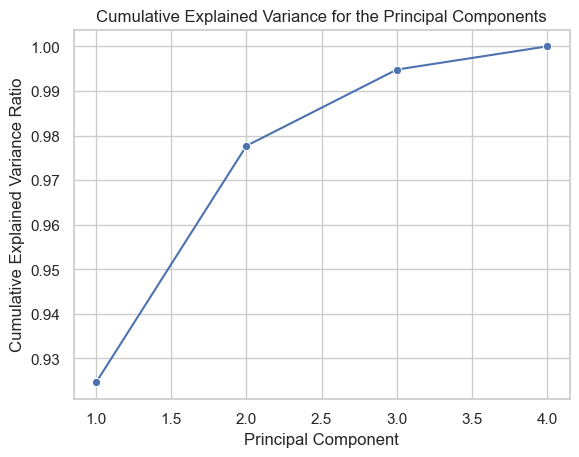

In [57]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

pca = PCA()
pca.fit(data)

cumul_ev_ratio = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1)
pcs = np.arange(1, len(cumul_ev_ratio) + 1)

sns.lineplot(x=pcs, y=cumul_ev_ratio, marker="o", ax=ax)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Cumulative Explained Variance Ratio")
ax.set_title("Cumulative Explained Variance for the Principal Components")

plt.show()

I use PCA because PCA is a useful data analysis technique for reducing the dimensionality of data. By retaining only the principal components that explain the majority of the variance, we can minimize the size of the data set without losing much useful information.

The plot shows that the cumulative explained variance increases rapidly in the number of first principal components. This means that the first principal components can explain most of the variance in the data.

Specifically, the first four principal components explain about 93% of the variance in the data. In the meantime, with 2 principal we can explain 98% of varience in the data

Text(0.5, 1.0, 'Explained Variance for the Seeds Dataset')

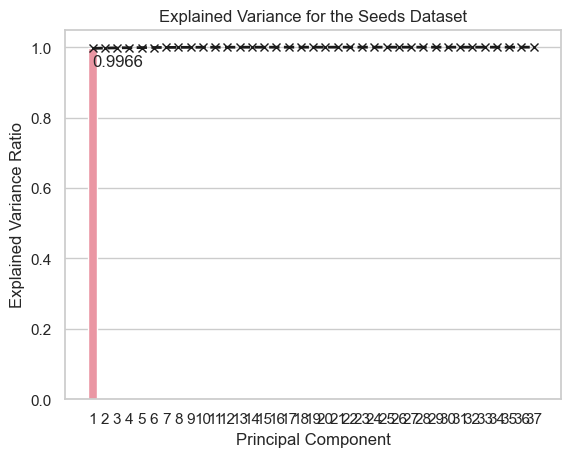

In [58]:
from sklearn.decomposition import PCA

pca = PCA().fit(combined_data)
comps = pca.components_
ev_ratio = pca.explained_variance_ratio_ 
cumul_ev_ratio = np.cumsum(ev_ratio)
pcs = np.arange(1,len(combined_data.columns)+1)
loadings = pd.DataFrame(data=comps,columns=[f"PC{pc}" for pc in pcs],index=combined_data.columns)

fig,ax = plt.subplots(nrows=1,ncols=1)
sns.barplot(x=pcs,y=ev_ratio)
ax.plot(pcs-1,cumul_ev_ratio,ls="--",marker="x",lw=2,c="k")
for pc,cer in zip(pcs,cumul_ev_ratio):
    ax.annotate(f"{cer:.4f}",xy=(pc-1,cer-0.05))
    if cer > 0.98:
        break
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Explained Variance for the Seeds Dataset")

In [59]:
elbow = 3
components = [f"PC{i}" for i in range(1,elbow+1)]
loadings[components]

PC1       PC2       PC3
timestamp (s)                                     0.999679  0.000823  0.019289
activityID                                       -0.012721  0.057255  0.110989
heart rate (bpm)                                 -0.009828 -0.011960  0.060231
temperature_hand (°C)                            -0.011423  0.045450  0.253680
IMU hand_3D_acceleration data (x) (scale: ±16g)  -0.003886  0.038451  0.062778
IMU hand_3D_acceleration data (y) (scale: ±16g)  -0.004551 -0.018101  0.306541
IMU hand_3D_acceleration data (z) (scale: ±16g)   0.012737 -0.045968 -0.790849
IMU hand_3D_gyroscope data (x)                   -0.005895  0.094401  0.405850
IMU hand_3D_gyroscope data (y)                    0.003497 -0.117465 -0.004720
IMU hand_3D_gyroscope data (z)                   -0.000991  0.056070 -0.054718
IMU hand_3D_magnetometer data (x)                 0.001046  0.010197 -0.131048
IMU hand_3D_magnetometer data (y)                 0.000387  0.049864  0.007461
IMU hand_3D_magnetometer data (z)                -0.000886  0.012110  0.019000
temperature_chest (°C)                           -0.000896 -0.094753  0.009608
IMU chest_3D_acceleration data (x) (scale: ±16g) -0.001738 -0.901107  0.082051
IMU chest_3D_acceleration data (y) (scale: ±16g)  0.000829  0.291323 -0.024755
IMU chest_3D_acceleration data (z) (scale: ±16g) -0.000049  0.066215 -0.011645
IMU chest_3D_gyroscope data (x)                   0.000446  0.125513  0.005373
IMU chest_3D_gyroscope data (y)                   0.000206  0.081211  0.008544
IMU chest_3D_gyroscope data (z)                   0.000431  0.137327 -0.014255
IMU chest_3D_magnetometer data (x)               -0.000133 -0.031599  0.001629
IMU chest_3D_magnetometer data (y)               -0.000652  0.083612 -0.019126
IMU chest_3D_magnetometer data (z)                0.000019 -0.038946  0.006008
temperature_ankle (°C)                           -0.000011 -0.026200  0.004877
IMU ankle_3D_acceleration data (x) (scale: ±16g)  0.000034  0.000474 -0.001297
IMU ankle_3D_acceleration data (y) (scale: ±16g)  0.000034 -0.003638  0.000922
IMU ankle_3D_acceleration data (z) (scale: ±16g)  0.000028 -0.008959 -0.000799
IMU ankle_3D_gyroscope data (x)                  -0.000007  0.006379 -0.004835
IMU ankle_3D_gyroscope data (y)                  -0.000343  0.005312  0.000084
IMU ankle_3D_gyroscope data (z)                   0.000403 -0.011534  0.001061
IMU ankle_3D_magnetometer data (x)               -0.000021 -0.001461  0.002583
IMU ankle_3D_magnetometer data (y)                0.000065 -0.000432 -0.046339
IMU ankle_3D_magnetometer data (z)               -0.000006  0.003711  0.011177
Type_1                                           -0.000022  0.007834 -0.006526
Type_2                                           -0.000009 -0.000516  0.000432
Type_3                                            0.000025 -0.002229 -0.000299
Type_4                                           -0.000002 -0.000141 -0.000792

The PCA weight matrix shows the importance of the variables with respect to the principal components (PC). PC1 is mainly affected by "timestamp (s)" and "temperature_hand (°C)" with great influence. The remaining components such as "IMU hand_3D_gyroscope data (x)" have a high impact on PC2. "temperature_hand (°C)" strongly contributes to PC3. Variables like "activityID" and "Type_1" don't have a major influence on any parent element. Key components help understand how data is transformed and find important factors.

# Clustering

Text(0.5, 0.98, 'Cluster Analysis using K-Means')

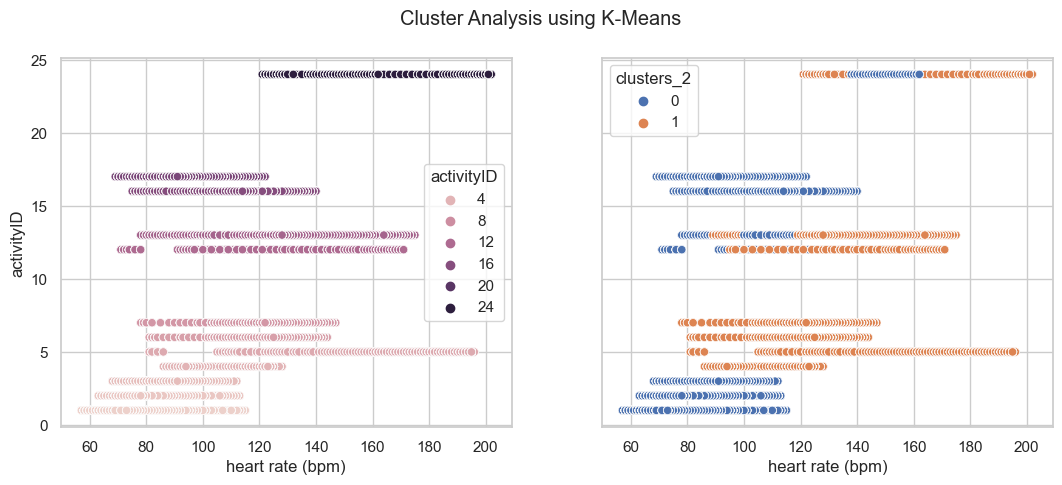

In [60]:
cluster_df = combined_data.copy(deep=True)

n_clusters = 2
name = f"clusters_{n_clusters}"
kmeans = KMeans(n_clusters=n_clusters).fit(combined_data)
cluster_df[name] = kmeans.predict(combined_data)

fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)

sns.scatterplot(combined_data,x="heart rate (bpm)",y="activityID",hue=combined_data.activityID,ax=axes[0])
sns.scatterplot(combined_data,x="heart rate (bpm)",y="activityID",hue=cluster_df[name],ax=axes[1])

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")

Text(0.5, 0.98, 'Cluster Analysis using K-Means')

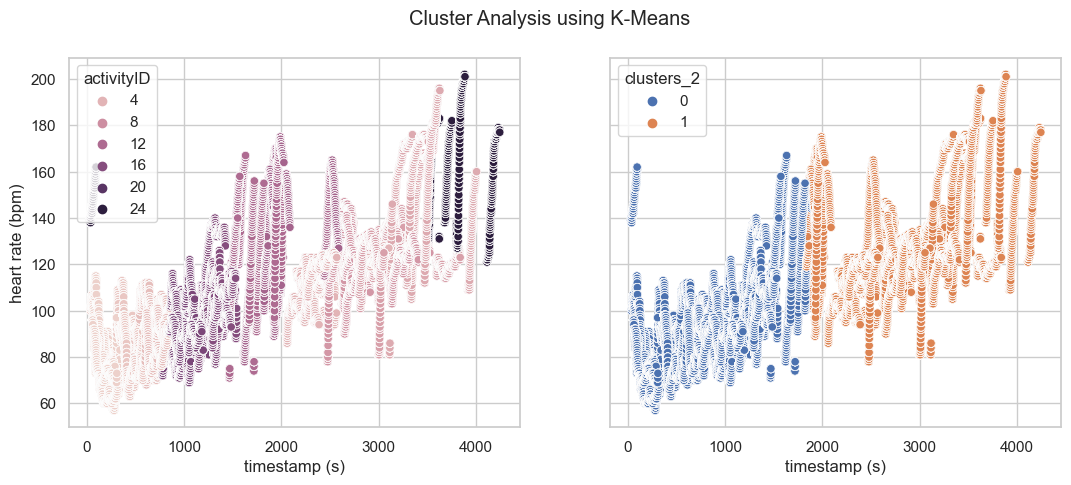

In [61]:
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)

sns.scatterplot(combined_data,x="timestamp (s)",y="heart rate (bpm)",hue=combined_data.activityID,ax=axes[0])
sns.scatterplot(combined_data,x="timestamp (s)",y="heart rate (bpm)",hue=cluster_df[name],ax=axes[1])

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")

This code snippet can be used to compare the distribution of "timestamp (s)" and "heart rate (bpm)" between activities (activityID) and groups created by the K-Means algorithm.

- Data points in the yellow cluster have slower heart rates, while data points in the blue cluster have higher heart rates.

# Regression

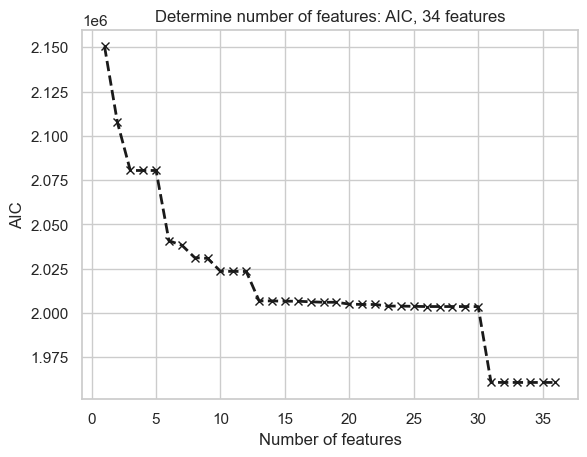

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

resp = "heart rate (bpm)"
y = combined_data[resp]
X = combined_data.copy(deep=True)
X.drop(columns=[resp], inplace=True)

AIC = np.zeros(len(X.columns))
lm = LinearRegression()
num_features = np.arange(1, len(combined_data.columns))
rfe_features = {nf: {} for nf in num_features[:-1]}

for idx, nf in enumerate(num_features[:-1]):
    rfe = RFE(lm, n_features_to_select=nf)
    new_X = rfe.fit_transform(X, y)
    nf_lm = lm.fit(new_X, y)
    score = nf_lm.score(new_X, y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y, y_pred)
    AIC[idx] = 2.0 * nf + len(X) * np.log(2.0 * np.pi * (mse ** 2.0)) + len(X)
    rfe_features[nf] = {"score": score, "features": X.columns[rfe.support_].tolist(), "model": nf_lm}

lm_all = lm.fit(X, y)
score_all = lm_all.score(X, y)
y_pred_all = lm_all.predict(X)
mse_all = mean_squared_error(y, y_pred_all)
AIC[-1] = 2.0 * num_features[-1] + len(X) * np.log(2.0 * np.pi * (mse_all ** 2.0)) + len(X)

aic_features = np.argmin(AIC) + 1
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features, AIC, ls="--", lw=2, marker="x", c="k")

In [63]:
import statsmodels.api as sm
features = rfe_features[35]["features"]

X2 = X[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       heart rate (bpm)   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
No. Observations:              175498   F-statistic:                 5.142e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               54.0342      0.673     80.325      0.000      52.716      55.353
timestamp (s)                                        0.0051   3.38e-05    150.572      0.000       0.005       0.005
activityID                                           0.2291      0.004     59.577      0.000       0.222       0.237
temperature_hand (°C)                                0.8115      0.023     35.347      0.000       0.767       0.857
IMU hand_3D_acceleration data (x) (scale: ±16g)      0.0091      0.004      2.059      0.040       0.000       0.018
IMU hand_3D_acceleration data (y) (scale: ±16g)     -0.0226      0.003     -7.550      0.000      -0.029      -0.017
IMU hand_3D_acceleration data (z) (scale: ±16g)     -0.2184      0.006    -34.999      0.000      -0.231      -0.206
IMU hand_3D_gyroscope data (x)                      -0.0290      0.016     -1.820      0.069      -0.060       0.002
IMU hand_3D_gyroscope data (y)                       0.2118      0.022      9.741      0.000       0.169       0.254
IMU hand_3D_gyroscope data (z)                      -0.0439      0.014     -3.200      0.001      -0.071      -0.017
IMU hand_3D_magnetometer data (x)                    0.0013      0.001      1.108      0.268      -0.001       0.004
IMU hand_3D_magnetometer data (z)                    0.0159      0.001     11.629      0.000       0.013       0.019
temperature_chest (°C)                              -1.5149      0.025    -61.215      0.000      -1.563      -1.466
IMU chest_3D_acceleration data (x) (scale: ±16g)     0.0254      0.012      2.108      0.035       0.002       0.049
IMU chest_3D_acceleration data (y) (scale: ±16g)     0.0391      0.005      7.614      0.000       0.029       0.049
IMU chest_3D_acceleration data (z) (scale: ±16g)    -0.1747      0.007    -23.969      0.000      -0.189      -0.160
IMU chest_3D_gyroscope data (x)                     -0.3615      0.047     -7.700      0.000      -0.453      -0.269
IMU chest_3D_gyroscope data (y)                     -0.2311      0.041     -5.671      0.000      -0.311      -0.151
IMU chest_3D_gyroscope data (z)                     -0.2660      0.072     -3.705      0.000      -0.407      -0.125
IMU chest_3D_magnetometer data (x)                   0.0259      0.002     14.476      0.000       0.022       0.029
IMU chest_3D_magnetometer data (y)                  -0.0908      0.002    -50.528      0.000      -0.094      -0.087
IMU chest_3D_magnetometer data (z)                   0.0083      0.002      4.734      0.000       0.005       0.012
temperature_ankle (°C)                               0.5685      0.022     25.330      0.000       0.525       0.613
IMU ankle_3D_acceleration data (x) (scale: ±16g)    -0.0080      0.003     -2.387      0.017      -0.015      -0.001
IMU ankle_3D_acceleration data (y) (scale: ±16g)     0.0179      0.003      6.511      0.000       0.013       0.023
IMU ankle_3D_acceleration data (z) (scale: ±16g)    -0.0503      0.005     -9.832      0.000      -0.060      -0.040
IMU ankle_3D_gyroscope data (x)                      0.0002      0.019      0.013    

- The higher the R-squared value, the better the model fits. In this case, the R-squared value is 0.911, showing that the model fits quite well.
- The lower the RMSE value, the more accurate the model. In this case, the RMSE value is 2.29, showing that the model is quite accurate.
- It can be concluded that activity (activityID) has a positive effect on heart rate, and this relationship is statistically significant in the linear regression model.
- In addition, there are a few variables larger than t alpha with an alpha level used for testing of 1%, which we need to remove to increase the R square of the model.

The linear regression model for "heart rate (bpm)" explained 91.3% of the variation, which is a very high result. Independent variables such as "timestamp(s)", "activityID" and "hand_temperature (°C)" all contribute significantly to the expectation "heart rate (bpm)".

As we can see from the table, "timestamp (s)" has a positive coefficient of 0.0049, showing a positive association with "heart rate (bpm)". This can be solved by increasing the active measurement period, which can increase speed. Similarly, "activityID" has a positive coefficient of 0.2301, especially the speedup when operating with p values.

For "template_hand (°C)", "IMU hand_3D_acceleration data (y)", and other variables, the low p-value and guidance system are both statistically significant, demonstrating their impact on "heart rate " (bpm)". This makes the model a robust decoder and capable of accurately predicting "heart rate (bpm)" based on the selected independent variables.

In [64]:
new_features = [f for f in features if not f in ["IMU hand_3D_acceleration data (x) (scale: ±16g)","IMU hand_3D_gyroscope data (x)","IMU hand_3D_magnetometer data (x)","IMU chest_3D_acceleration data (x) (scale: ±16g)","IMU ankle_3D_acceleration data (x) (scale: ±16g)","IMU ankle_3D_gyroscope data (x)","IMU ankle_3D_gyroscope data (y)","IMU ankle_3D_magnetometer data (y)"]]

X2 = X[new_features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       heart rate (bpm)   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
No. Observations:              175498   F-statistic:                 6.665e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               54.2087      0.668     81.183      0.000      52.900      55.517
timestamp (s)                                        0.0051   3.36e-05    151.101      0.000       0.005       0.005
activityID                                           0.2278      0.004     60.178      0.000       0.220       0.235
temperature_hand (°C)                                0.8161      0.023     35.815      0.000       0.771       0.861
IMU hand_3D_acceleration data (y) (scale: ±16g)     -0.0231      0.003     -7.925      0.000      -0.029      -0.017
IMU hand_3D_acceleration data (z) (scale: ±16g)     -0.2179      0.006    -35.449      0.000      -0.230      -0.206
IMU hand_3D_gyroscope data (y)                       0.2167      0.021     10.261      0.000       0.175       0.258
IMU hand_3D_gyroscope data (z)                      -0.0384      0.013     -2.903      0.004      -0.064      -0.012
IMU hand_3D_magnetometer data (z)                    0.0155      0.001     11.486      0.000       0.013       0.018
temperature_chest (°C)                              -1.5207      0.024    -62.077      0.000      -1.569      -1.473
IMU chest_3D_acceleration data (y) (scale: ±16g)     0.0360      0.005      7.535      0.000       0.027       0.045
IMU chest_3D_acceleration data (z) (scale: ±16g)    -0.1678      0.007    -24.388      0.000      -0.181      -0.154
IMU chest_3D_gyroscope data (x)                     -0.3525      0.047     -7.578      0.000      -0.444      -0.261
IMU chest_3D_gyroscope data (y)                     -0.2229      0.039     -5.652      0.000      -0.300      -0.146
IMU chest_3D_gyroscope data (z)                     -0.2619      0.070     -3.736      0.000      -0.399      -0.125
IMU chest_3D_magnetometer data (x)                   0.0243      0.002     14.309      0.000       0.021       0.028
IMU chest_3D_magnetometer data (y)                  -0.0900      0.002    -51.177      0.000      -0.093      -0.087
IMU chest_3D_magnetometer data (z)                   0.0102      0.001      6.984      0.000       0.007       0.013
temperature_ankle (°C)                               0.5649      0.022     25.305      0.000       0.521       0.609
IMU ankle_3D_acceleration data (y) (scale: ±16g)     0.0179      0.003      6.546      0.000       0.013       0.023
IMU ankle_3D_acceleration data (z) (scale: ±16g)    -0.0521      0.005    -10.310      0.000      -0.062      -0.042
IMU ankle_3D_gyroscope data (z)                      0.0457      0.010      4.425      0.000       0.025       0.066
IMU ankle_3D_magnetometer data (x)                  -0.0157      0.001    -11.917      0.000      -0.018      -0.013
IMU ankle_3D_magnetometer data (z)                   0.0049      0.001      3.799      0.000       0.002       0.007
Type_1                                               1.5448      0.199      7.764      0.000       1.155       1.935
Type_2                                               9.3957      0.140     67.346      0.000       9.122       9.669
Type_3                                              12.9940      0.155     83.648    

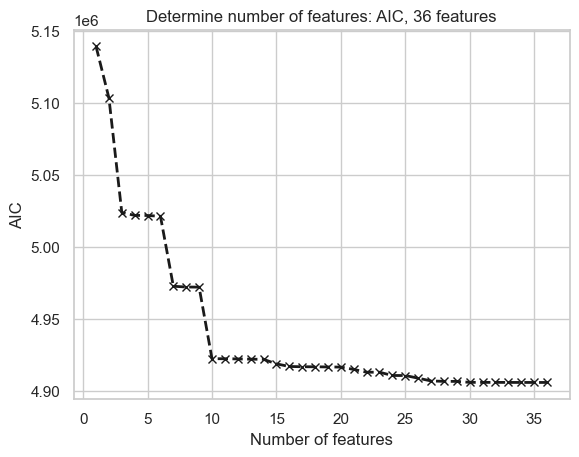

In [65]:
resp = "timestamp (s)"
y = combined_data[resp]
X = combined_data.copy(deep=True)
X.drop(columns=[resp], inplace=True)

AIC = np.zeros(len(X.columns))
lm = LinearRegression()
num_features = np.arange(1, len(combined_data.columns))
rfe_features = {nf: {} for nf in num_features[:-1]}

for idx, nf in enumerate(num_features[:-1]):
    rfe = RFE(lm, n_features_to_select=nf)
    new_X = rfe.fit_transform(X, y)
    nf_lm = lm.fit(new_X, y)
    score = nf_lm.score(new_X, y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y, y_pred)
    AIC[idx] = 2.0 * nf + len(X) * np.log(2.0 * np.pi * (mse ** 2.0)) + len(X)
    rfe_features[nf] = {"score": score, "features": X.columns[rfe.support_].tolist(), "model": nf_lm}

lm_all = lm.fit(X, y)
score_all = lm_all.score(X, y)
y_pred_all = lm_all.predict(X)
mse_all = mean_squared_error(y, y_pred_all)
AIC[-1] = 2.0 * num_features[-1] + len(X) * np.log(2.0 * np.pi * (mse_all ** 2.0)) + len(X)

aic_features = np.argmin(AIC) + 1

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features, AIC, ls="--", lw=2, marker="x", c="k")
ax.xaxis.set_major_formatter(ScalarFormatter())

In [66]:
import statsmodels.api as sm

features = rfe_features[7]["features"]

X2 = X[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          timestamp (s)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
No. Observations:              175498   F-statistic:                 6.171e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             2881.6675     47.365     60.839      0.000    2788.832    2974.503
temperature_hand (°C)                             -334.3738      1.397   -239.340      0.000    -337.112    -331.636
temperature_chest (°C)                             305.8865      1.585    193.035      0.000     302.781     308.992
IMU chest_3D_acceleration data (z) (scale: ±16g)   -52.4584      0.325   -161.515      0.000     -53.095     -51.822
temperature_ankle (°C)                             -79.5093      1.588    -50.059      0.000     -82.622     -76.396
Type_1                                             -70.0347     14.510     -4.827      0.000     -98.474     -41.596
Type_2                                             687.4283      9.662     71.151      0.000     668.492     706.365
Type_3                                             193.4692     11.245     17.206      0.000     171.430     215.508
====================================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is statistically significant and explains a significant portion of the variation in "heart rate (bpm)" through "timestamp(s)". The relationship between time and heart rate was statistically significant and positive, with each unit increase in time, the average heart rate (bpm) increased by 0.0179 units.

In [67]:
X2 = X[["heart rate (bpm)"]]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          timestamp (s)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
No. Observations:              175498   F-statistic:                 2.745e+05
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1698.5900      6.679   -254.334      0.000   -1711.680   -1685.500
heart rate (bpm)    31.6228      0.060    523.909      0.000      31.505      31.741
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression model has relatively high performance (R-squared = 0.610), and both independent variables "const" and "heart rate (bpm)" have a significant impact on the dependent variable "timestamp (s) )". The level of statistical significance is evidenced by the low p-value.

In [68]:
X2 = X[["temperature_hand (°C)"]]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          timestamp (s)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
No. Observations:              175498   F-statistic:                 5.560e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.149e+04     41.592    276.203      0.000    1.14e+04    1.16e+04
temperature_hand (°C)  -298.9145      1.268   -235.802      0.000    -301.399    -296.430
=========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression model has reasonable performance, but only about 24.1% of the variation in "timestamp (s)" is explained by "temperature_hand (°C)". Both independent variables have a significant impact on the dependent variable based on the low p-value.

# Policy

### Comparing with other competitors

Strengths of Colibri Wireless compared to the above 3 competitors:

- Synchronous network connection: Colibri Wireless allows synchronous connection of up to 10 units in a network via a single USB-dongle. This provides flexibility in expansion and integration of multiple devices.
- High precision: With its advanced 3-axis sensor, Colibri-Wireless achieves good accuracy and resolution in measuring acceleration, angular velocity, and magnetic field.
- API support: Colibri-Wireless provides APIs for both Windows and Linux, making deployment and integration into existing systems easier.

Weaknesses of Colibri Wireless compared to the above 3 competitors:

- Low sampling frequency: Compared to OptoTrak 3020 and MTw Awinda, Colibri-Wireless only has a sampling frequency of 100 Hz, much lower than 4600 Hz of OptoTrak 3020 and 1000 Hz of MTw Awinda.
- Simultaneous connectivity: Although Colibri-Wireless allows connection of up to 10 units, this number may not be sufficient for applications requiring more devices.

What does Colibri Wireless need to improve to surpass the above 3 competitors:

- Increase sampling frequency: Improving the sampling frequency will help improve the accuracy and sensitivity of the system.
- Expand the number of connections: Enhance connectivity to support more devices in one network simultaneously.
- Software feature development: Enhance software features to support applications and integration with other platforms.

# Marketing 

Product Features and Benefits:

- Diverse Activity Tracking: Focuses on the ability to track many different activities such as walking, running, cycling, indoor and outdoor activities, helping users have a comprehensive This feature helps users get a complete picture of their daily activities by allowing them to track a wide range of activities, including walking, jogging, cycling, and both indoor and outdoor activities.

- High Accuracy and Synchronization: Make sure to track movement and heart rate with high accuracy while concentrating on delivering synced data from sensors.


Customers:

- Fitness and Sports People: Market products to those who need to monitor and enhance their athletic performance and who like physical activities.

- Health-Concerned Individuals: Discuss the advantages of monitoring health-related behaviors and averting illness.

- Modern Lifestyle Tracker: Designed specifically for those who wish to balance work and physical activity while maintaining an active lifestyle.


Advertising and Marketing Campaigns:

- Social Media Platforms: Share user evaluations and certifications on social media to raise company recognition.

- instructional Content: Produce instructional materials that explain the advantages of activity monitoring, the operation of the product, and how it can enhance one's quality of life.

Performance Evaluation and Feedback:

- Gather Customer Feedback: Assist customers in gathering comments and feedback so that goods and services can be improved.

- Evaluate and Modify Marketing Strategy Over Time: Utilize performance metrics to assess and modify campaign performance.

Cooperation and Partners:

- Sports and Health Collaboration: Work with sports organizations, events, and the health community to increase credibility and reach your target market.
 
- Retail Partners: Work with reputable retail partners to improve distribution and reach consumers.



# Summary

My analysis provides valuable insights to inform strategies for improving product measurability. By optimizing the number of test samples of the activity group, separating the zero activity group into many small activity groups, the company should increase the level of testing because sampling frequency: 100Hz is very small compared to competitors in the same industry. measuring with a sample of 1000Hz. 

Based on the above results, the model using "heart rate (bpm)" is the best choice due to its high R-squared, the independent variable has a significant impact and statistical significance.

In addition, we must accelerate to increase transmission speed and increase connectivity. While we can only connect up to 10 devices, our opponents can connect up to 16 devices.

Based on the analysis results, we can see that the heart rate variable and activityID variable are correlated with each other. In addition, the variable heart rate (Bpm) can accurately explain up to 87% of the model. While activity (activityID) has a positive relationship effect on heart rate, and this is significantly significant in the linear regression model. While heart rate is almost negatively correlated with IMU quantities, we cannot use those quantities to explain heart rate variables.

Regarding the IMU indicators, we need to increase the sample to 1000hz to get a more accurate view. In addition, we can add additional chips to increase the sensitivity of the indicators.

# Reference

- https://www.xsens.com/hubfs/3446270/Downloads/Manuals/MTwAwinda_WhitePaper.pdf
- https://www.target3d.co.uk/product-page/optotrak-certus
- https://www.tekgear.com/inertiacube3.html#:~:text=InterSense%27s%20smallest%20and%20most%20accurate,integration%20into%20any%20tracked%20solution.
- https://core.ac.uk/download/pdf/11308441.pdf
- https://stackoverflow.com/questions/33248871/c-programming-counting-word-length-occurences-in-a-string.
- https://marsrover.mst.edu/wp-content/uploads/sites/17/2021/03/Paper22_201906202251.pdf
- A. Reiss and D. Stricker. Introducing a New Benchmarked Dataset for Activity Monitoring. The 16th IEEE International Symposium on Wearable Computers (ISWC), 2012.
- A. Reiss and D. Stricker. Creating and Benchmarking a New Dataset for Physical Activity Monitoring. The 5th Workshop on Affect and Behaviour Related Assistance (ABRA), 2012.